In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Load Data

In [2]:
# Load train dataset
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
# Display shape and data types
print(train_df.shape)
print(train_df.dtypes)

# Display first few rows of the dataset
print(train_df.head(5))

# Display summary statistics
#print(train_df.describe())



(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   


# **Data Exploration**

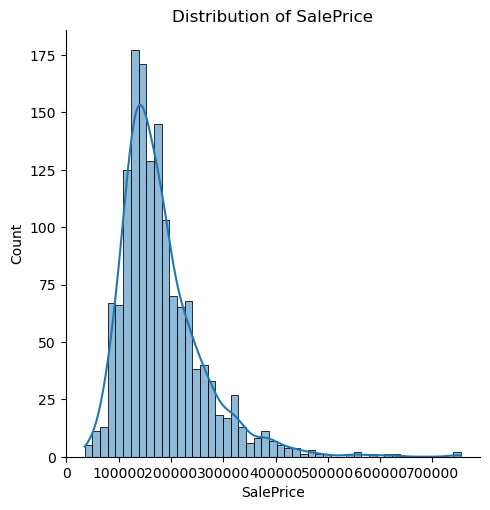

In [3]:

# Identify the target variable
target_variable = 'SalePrice'

# Visualize the distribution of the target variable using a histogram
sns.displot(data=train_df, x=target_variable, kde=True)
plt.title('Distribution of SalePrice')
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Numerical Features: 38
Categorical Features: 43


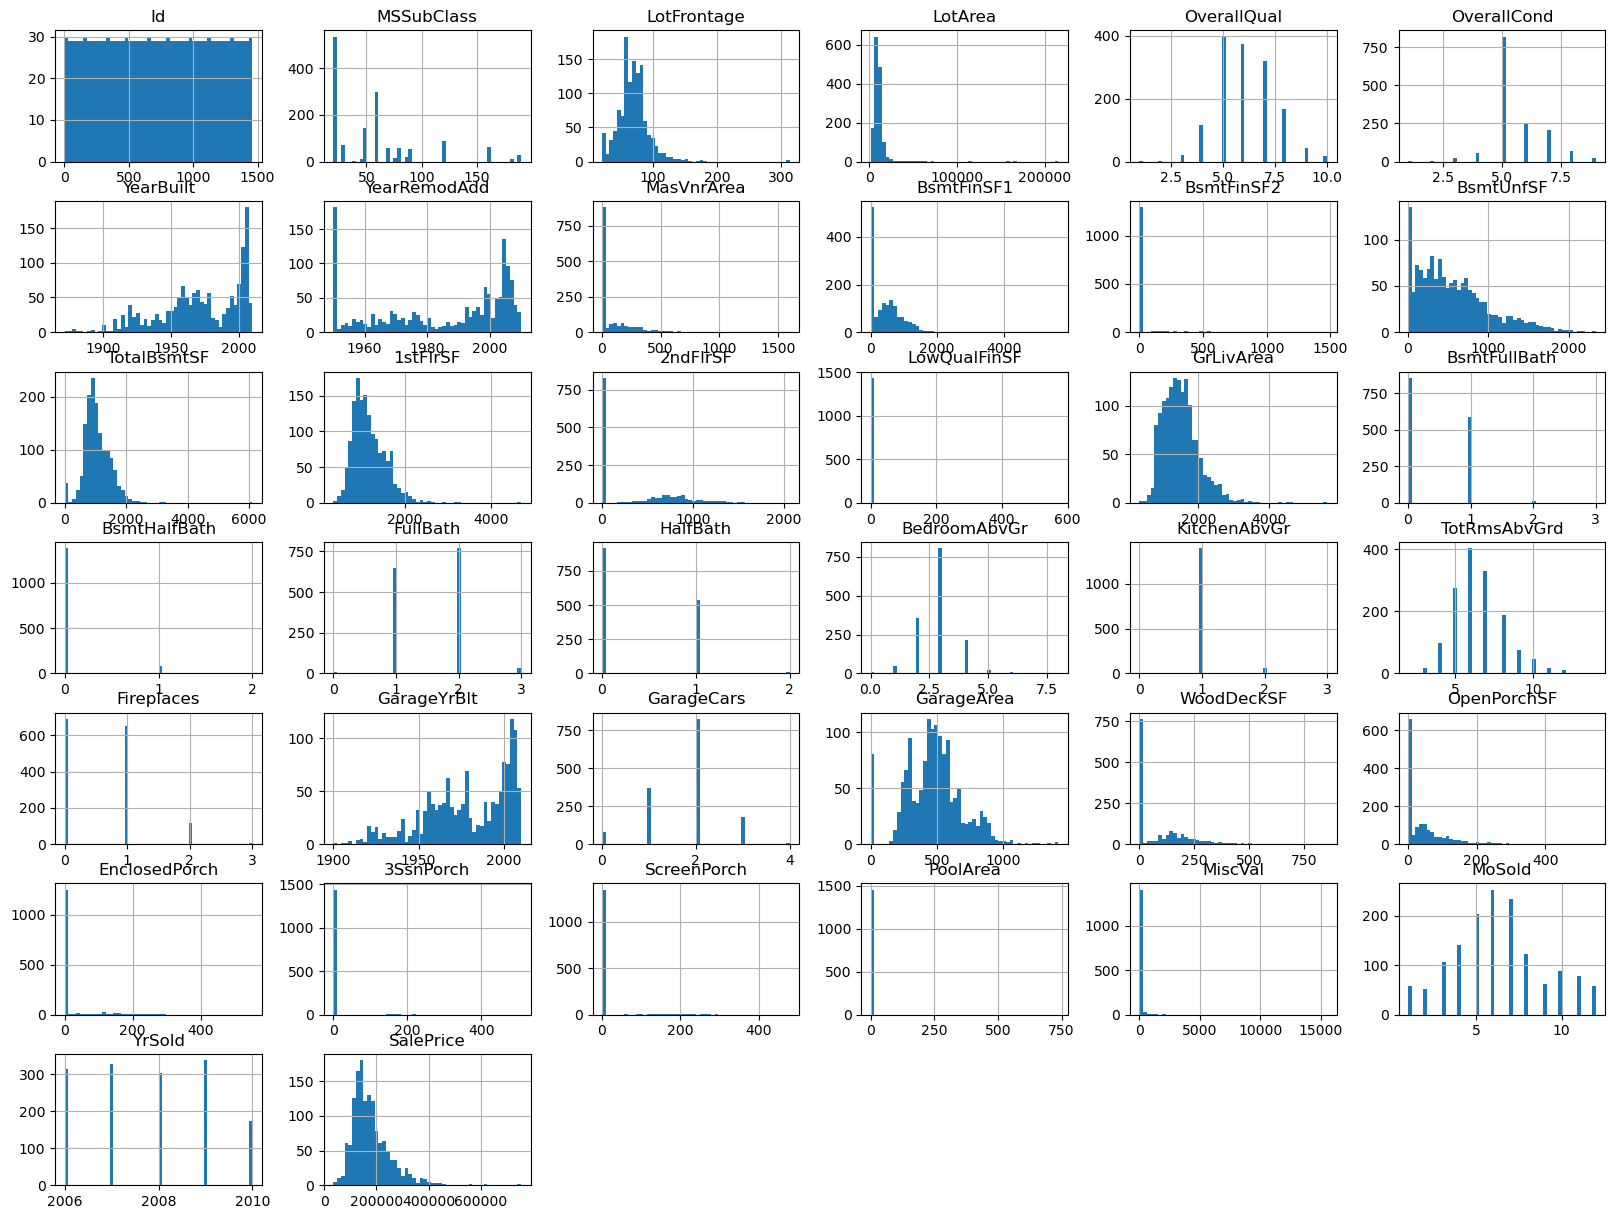

In [4]:
# Identify numerical and categorical features in the train dataset
numerical_features = train_df.select_dtypes(include=[np.number])
categorical_features = train_df.select_dtypes(include=[np.object])
print('Numerical Features:', len(numerical_features.columns))
print('Categorical Features:', len(categorical_features.columns))

# Visualize numerical features in the train dataset using histograms
train_df.hist(bins=50, figsize=(20,15))
plt.show()




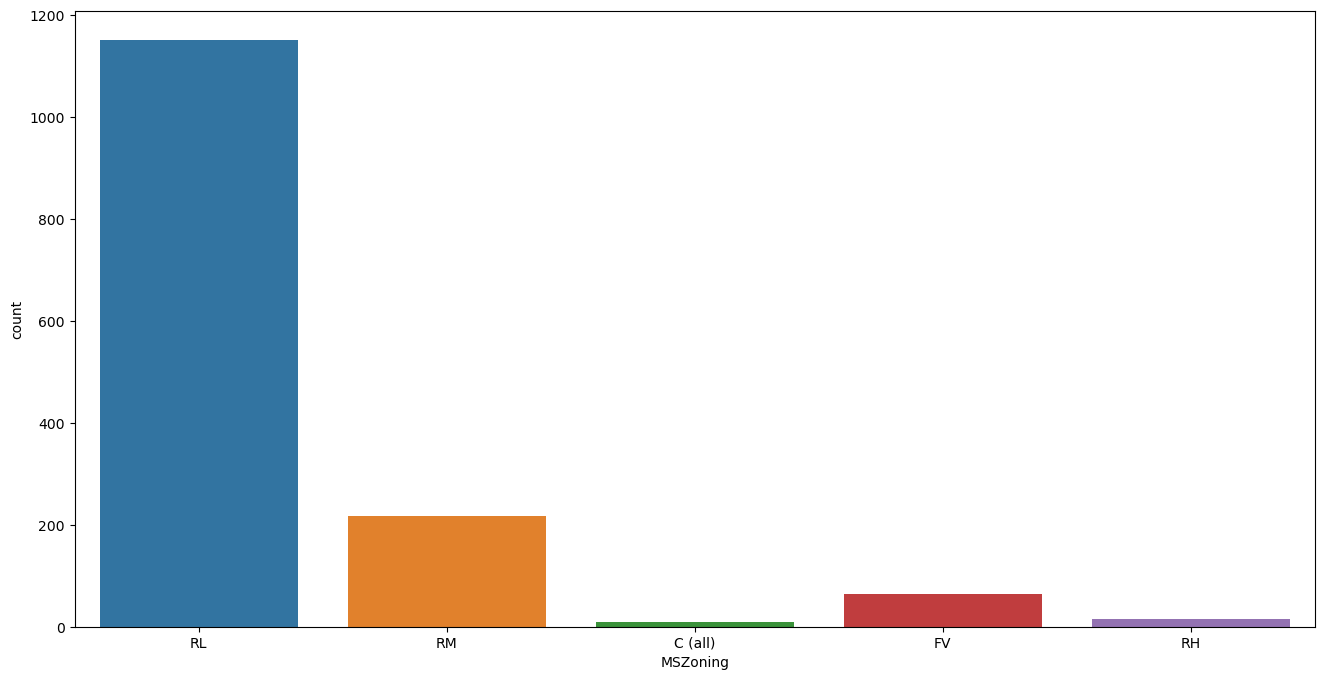

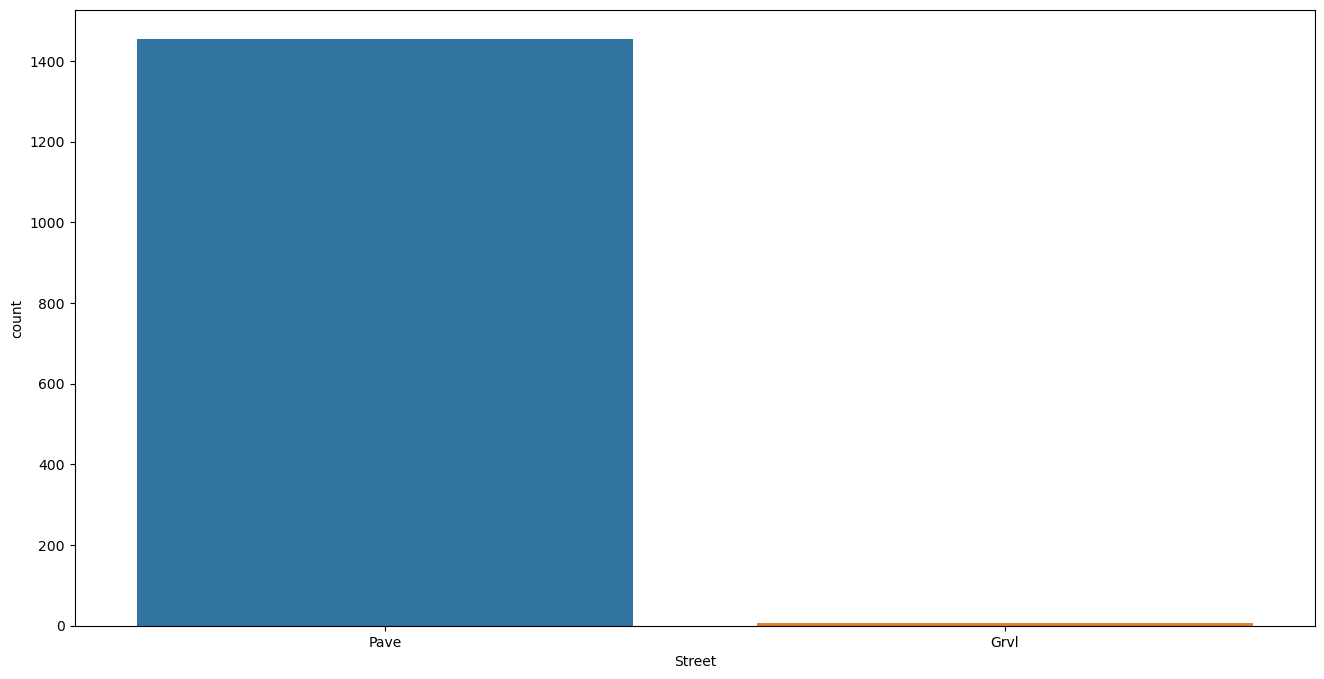

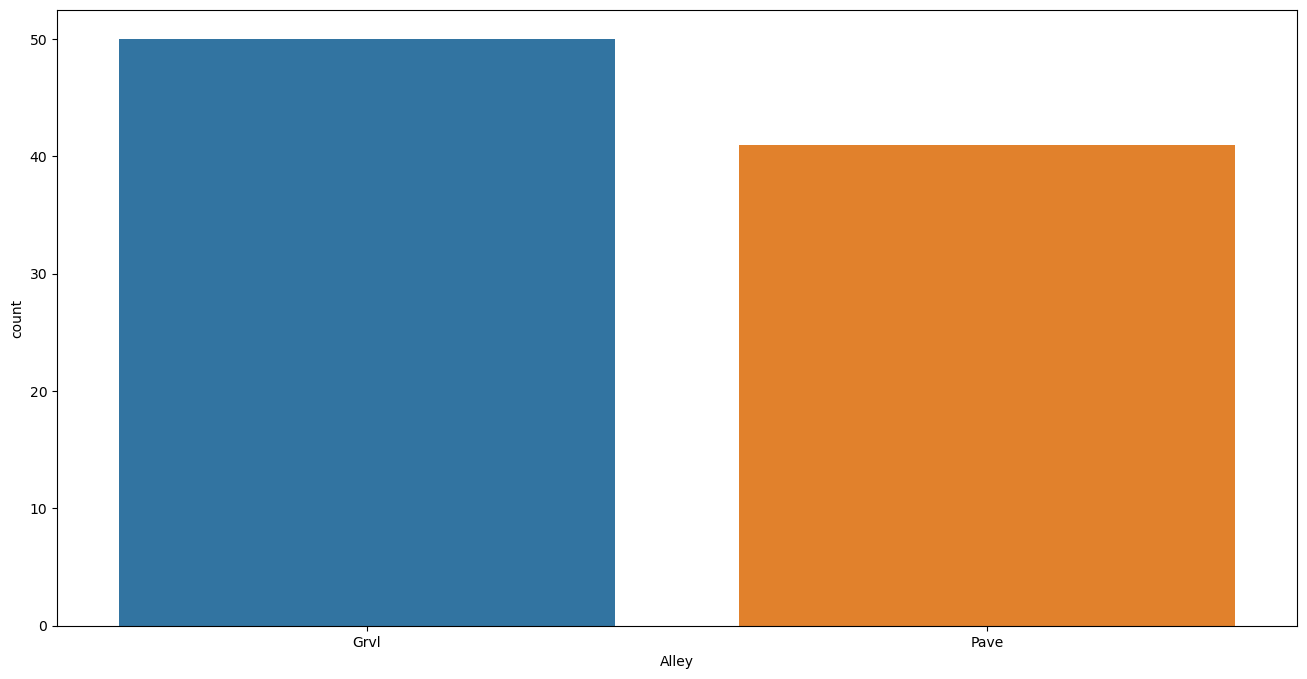

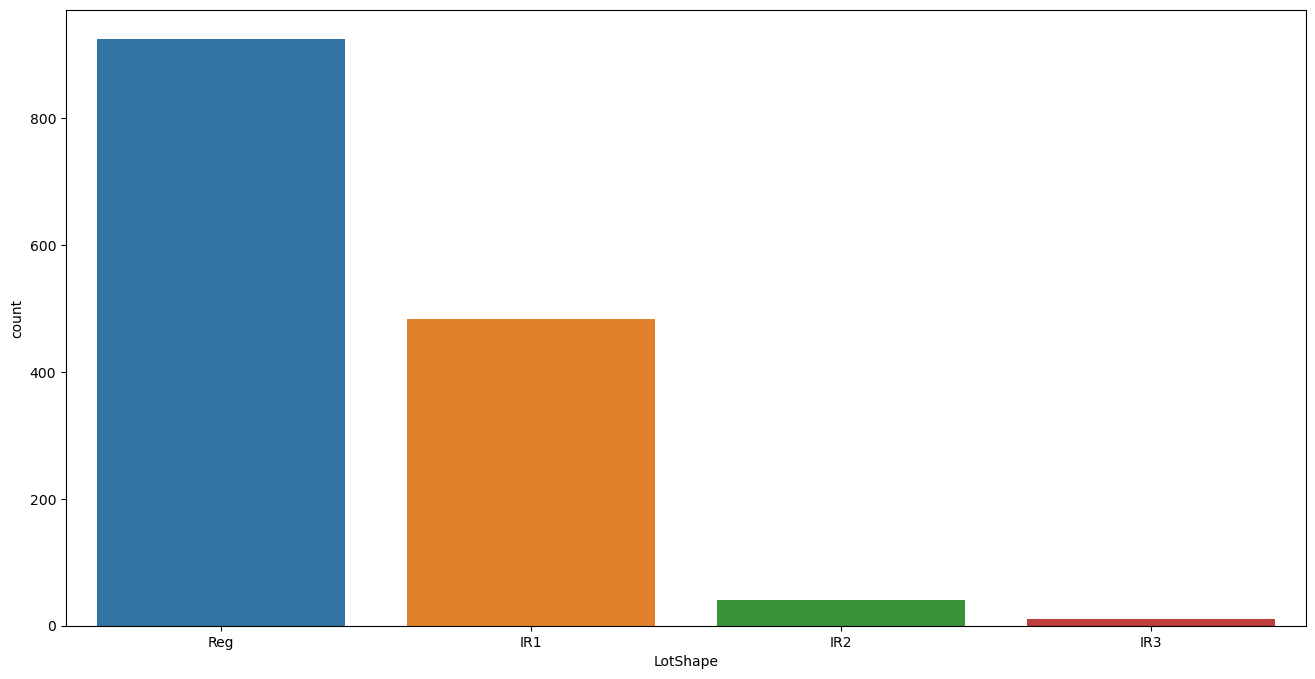

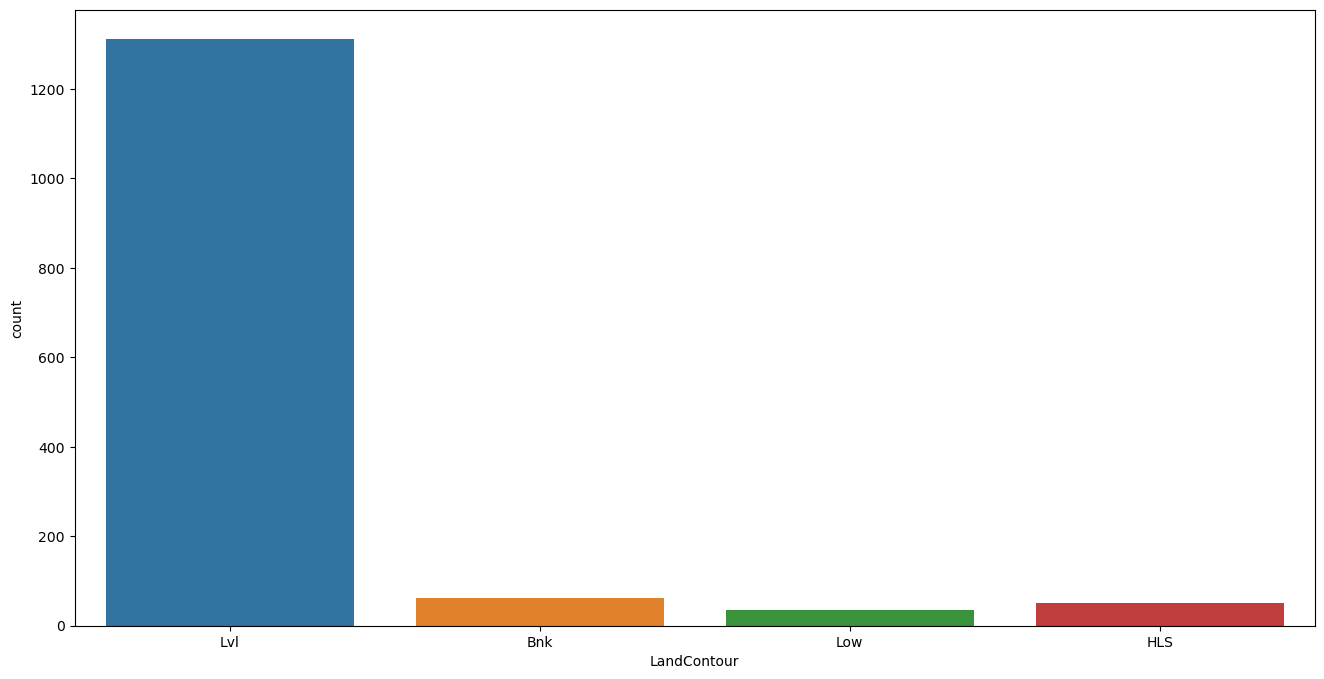

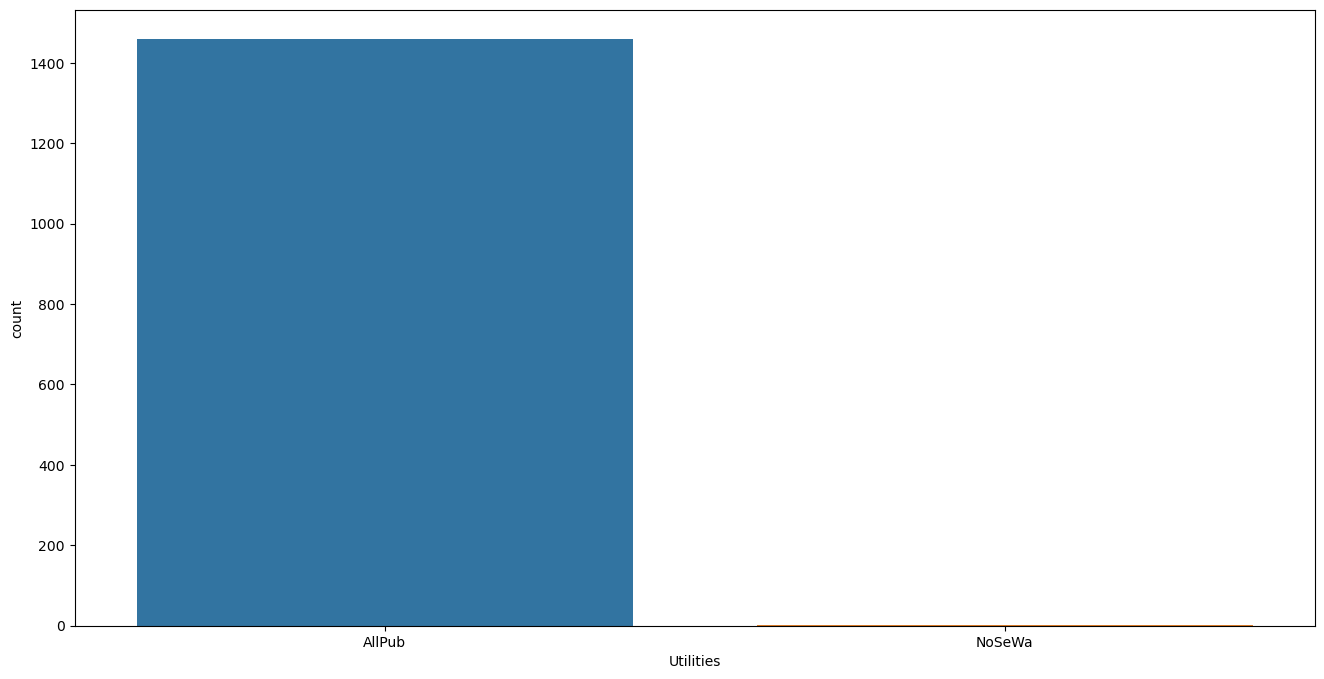

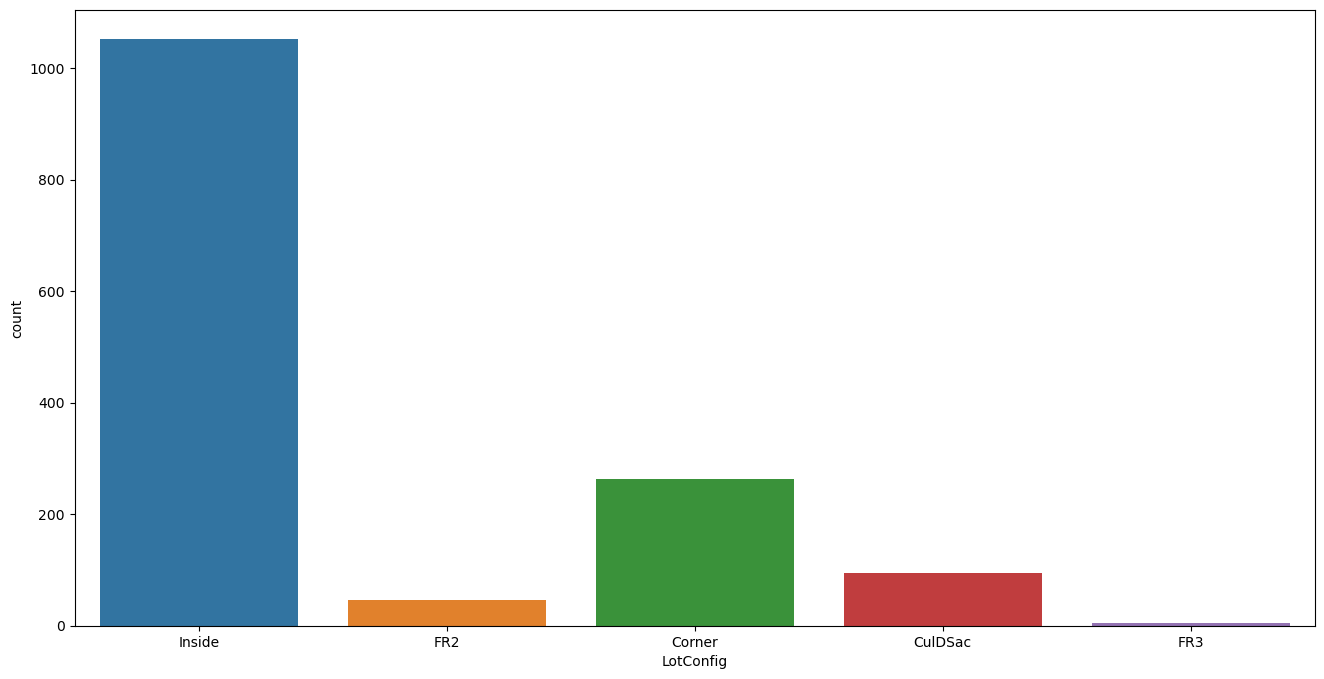

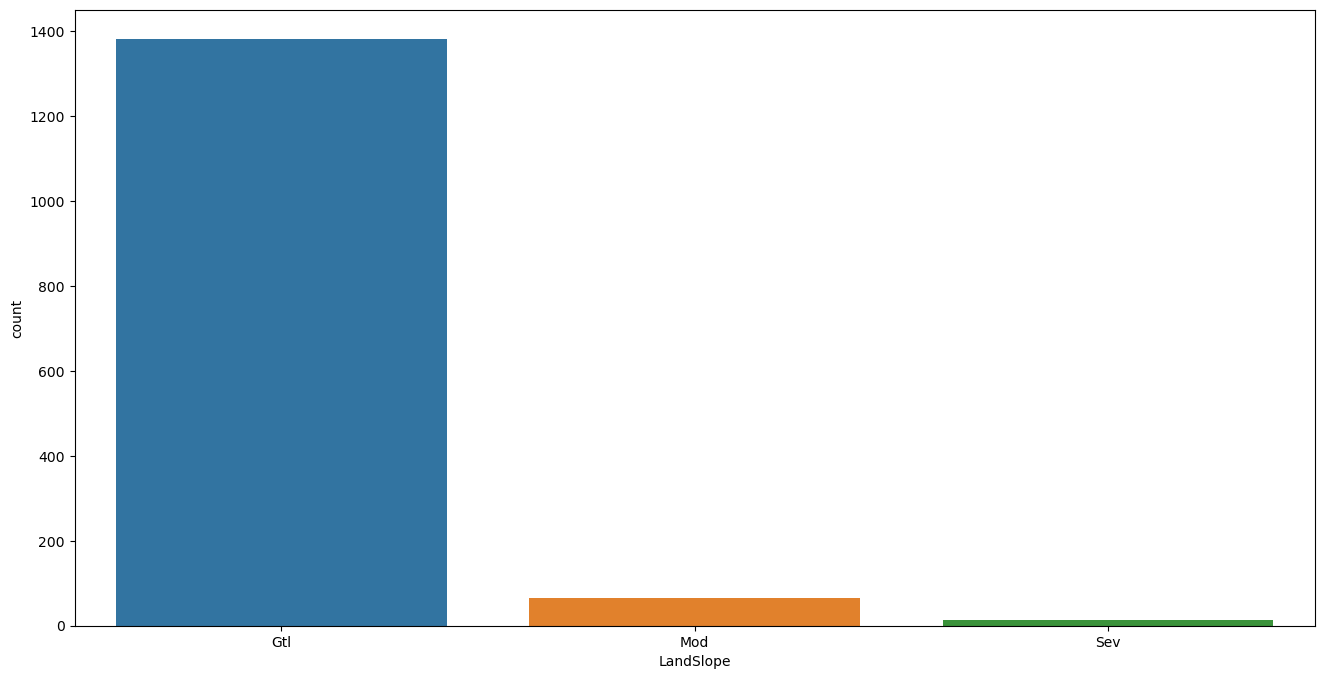

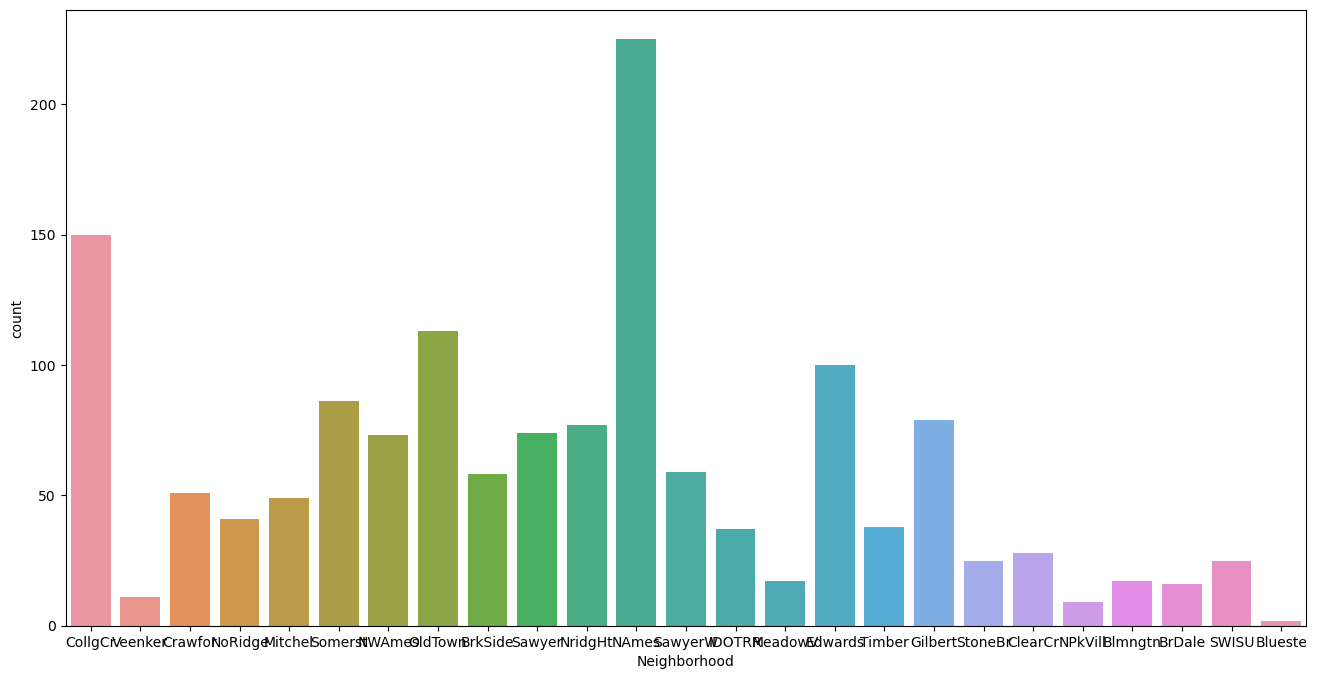

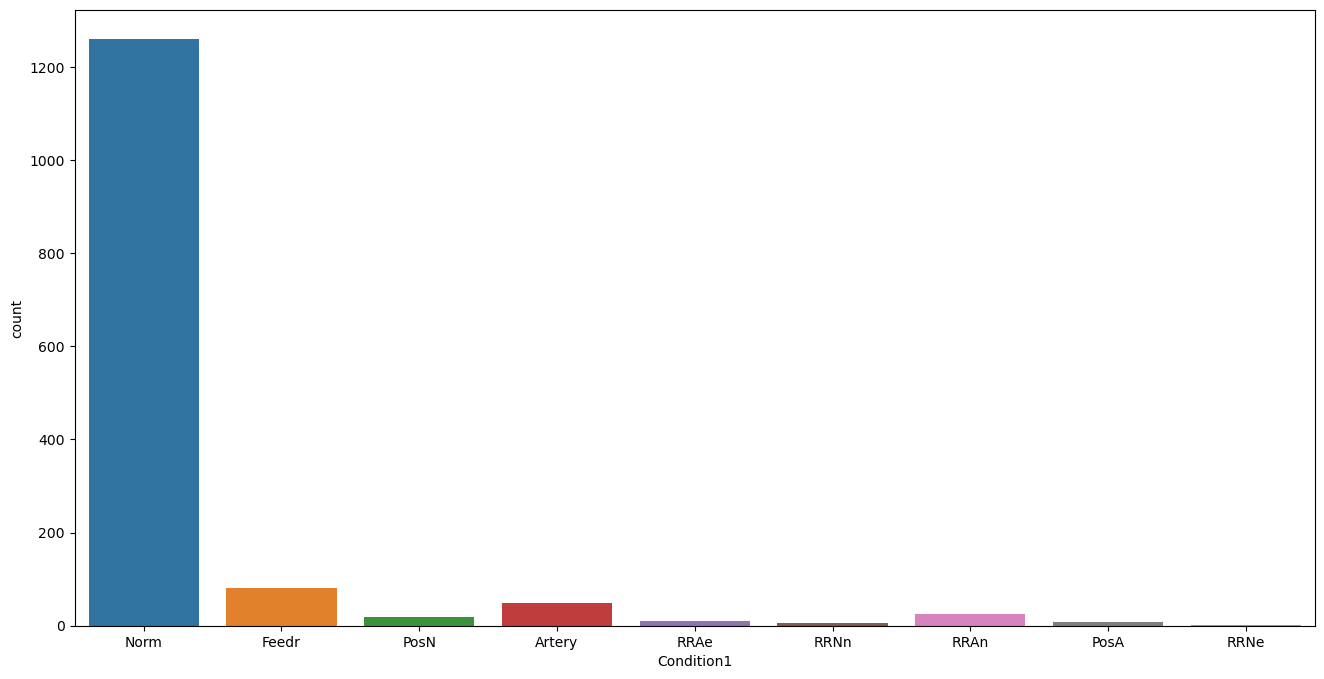

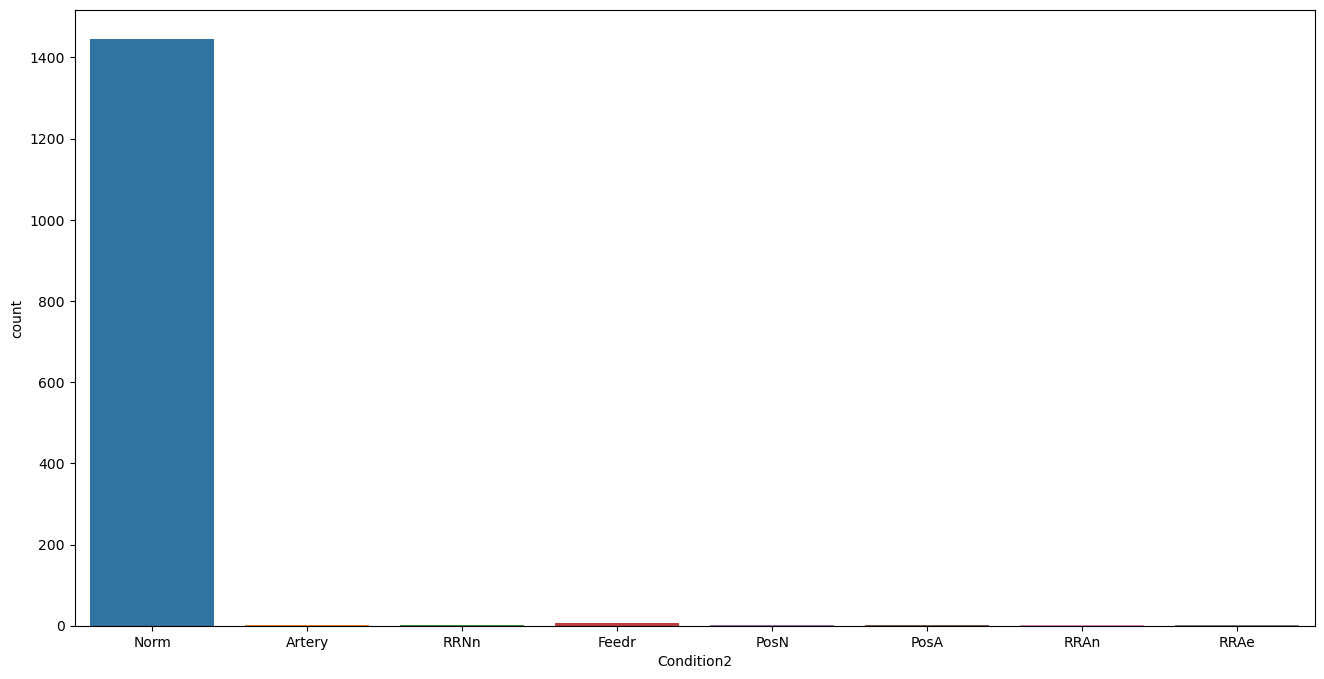

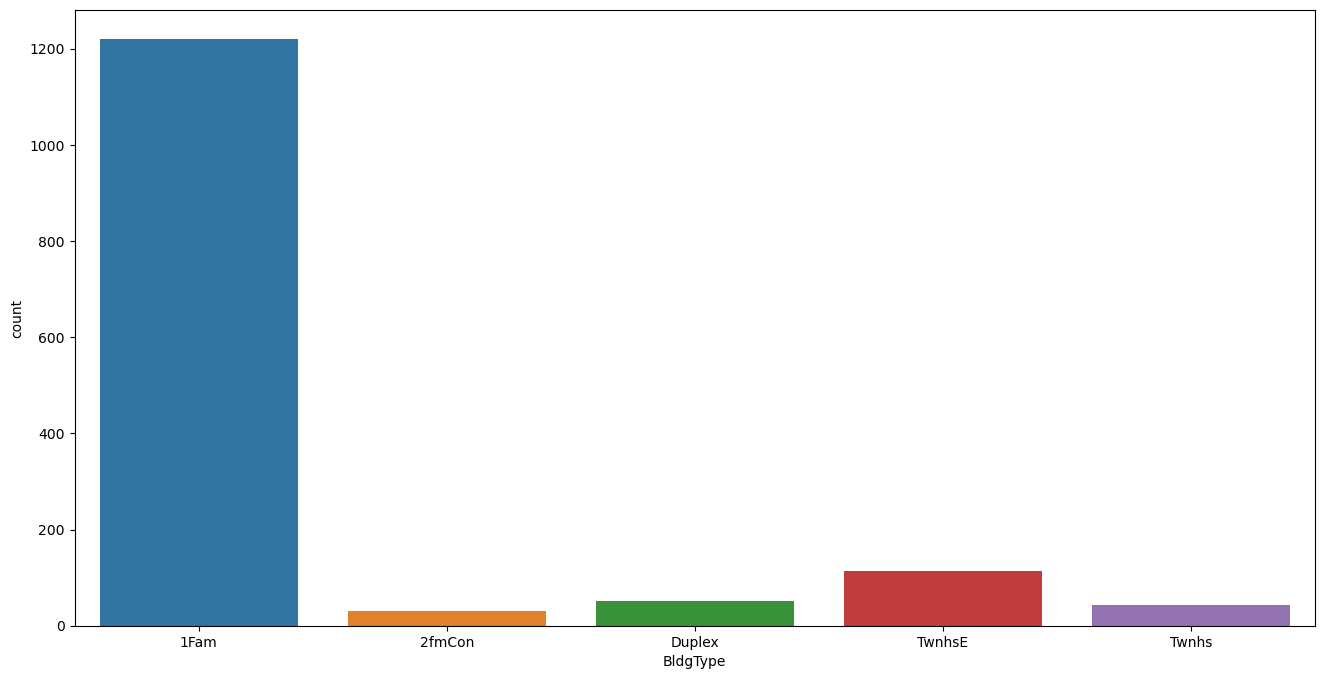

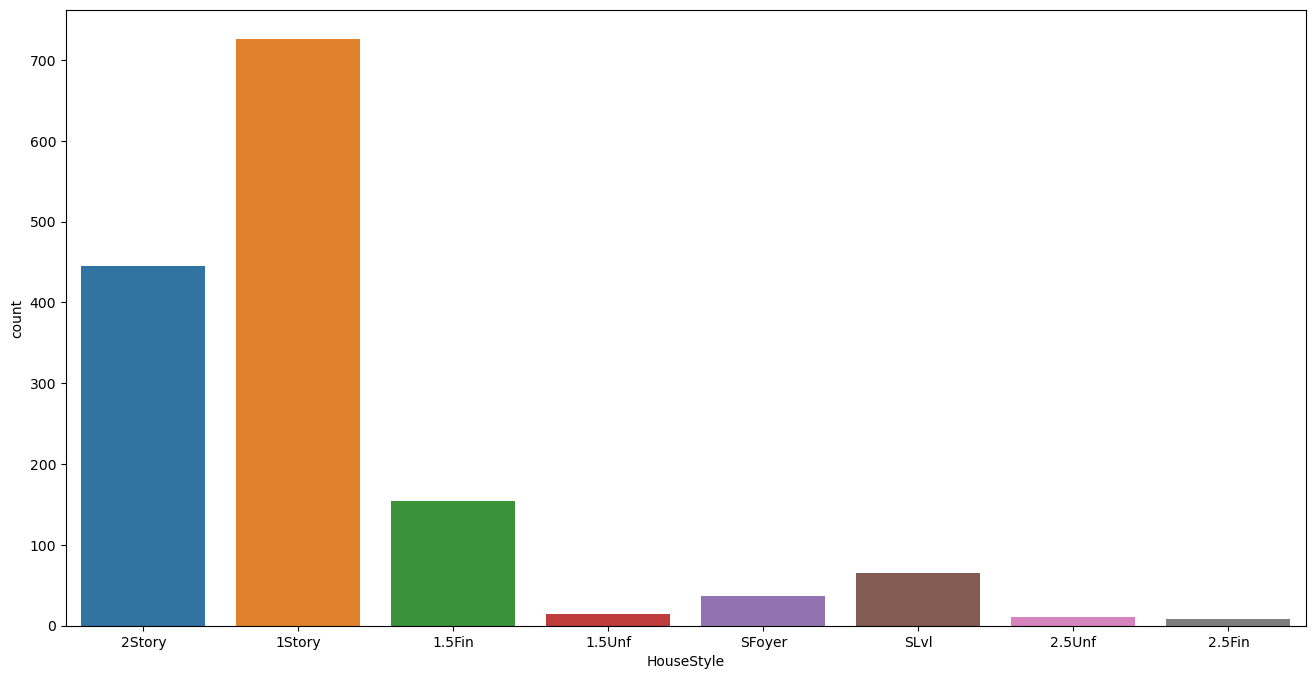

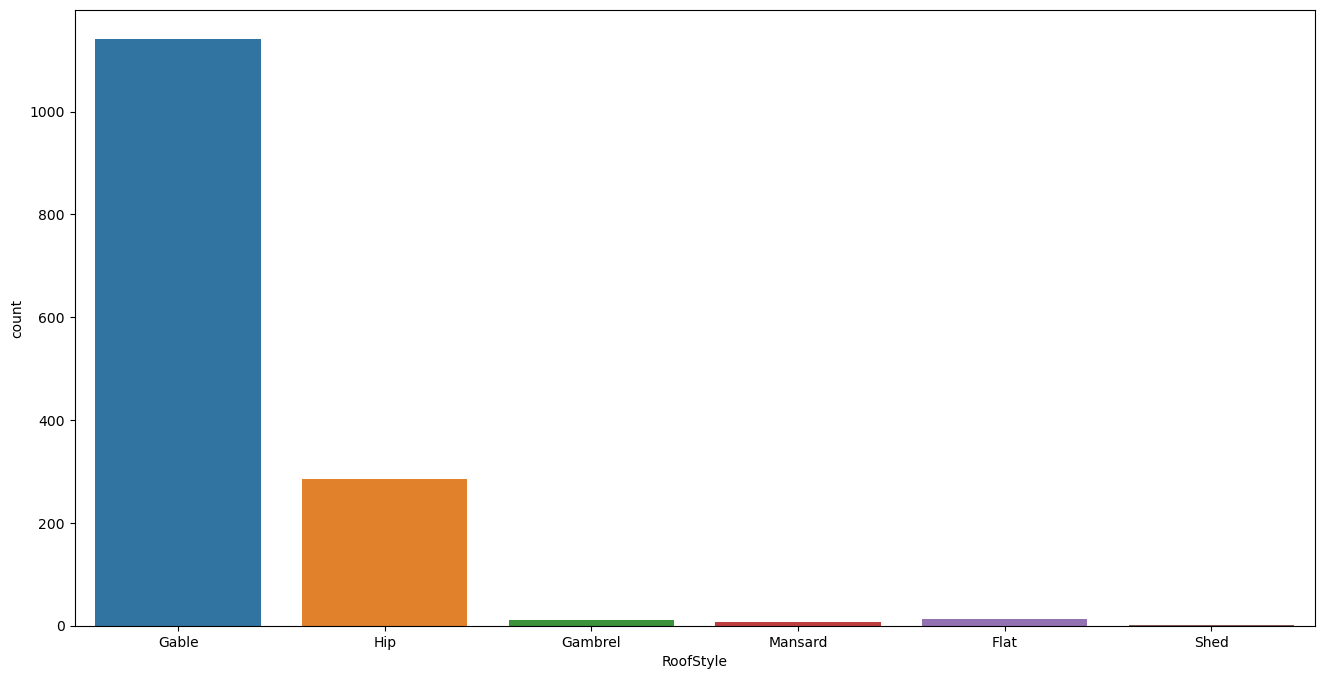

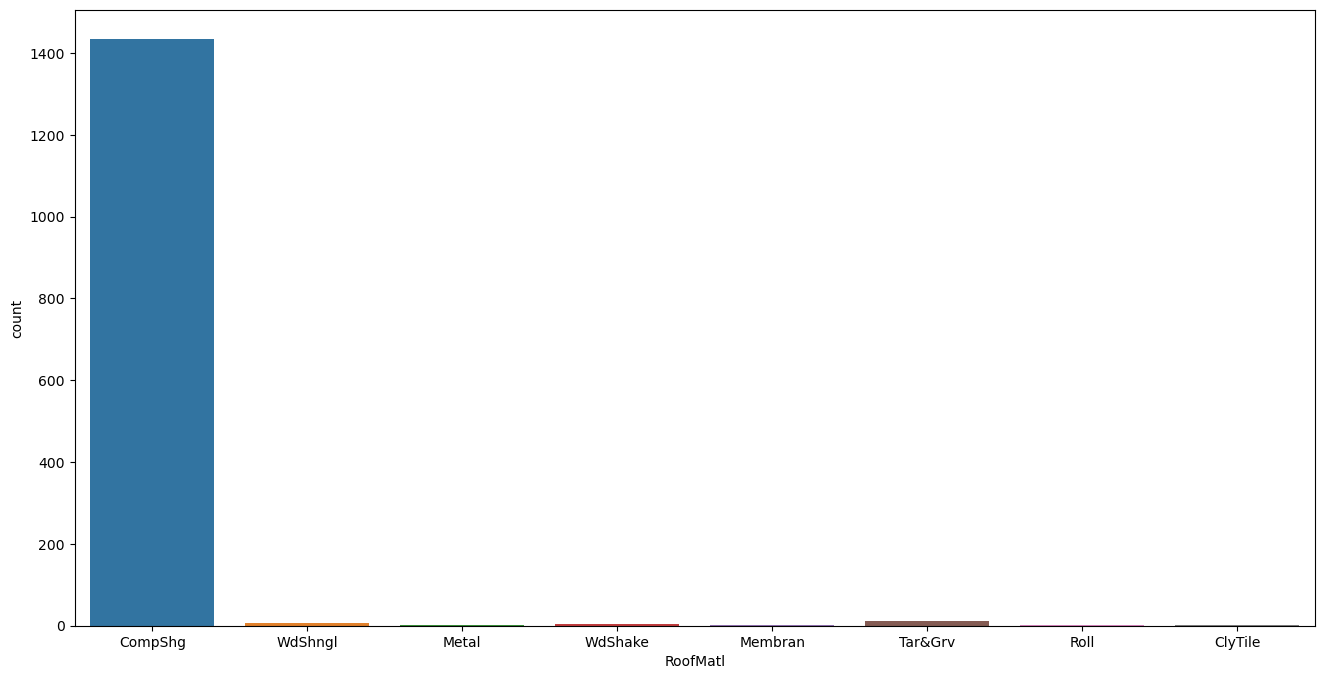

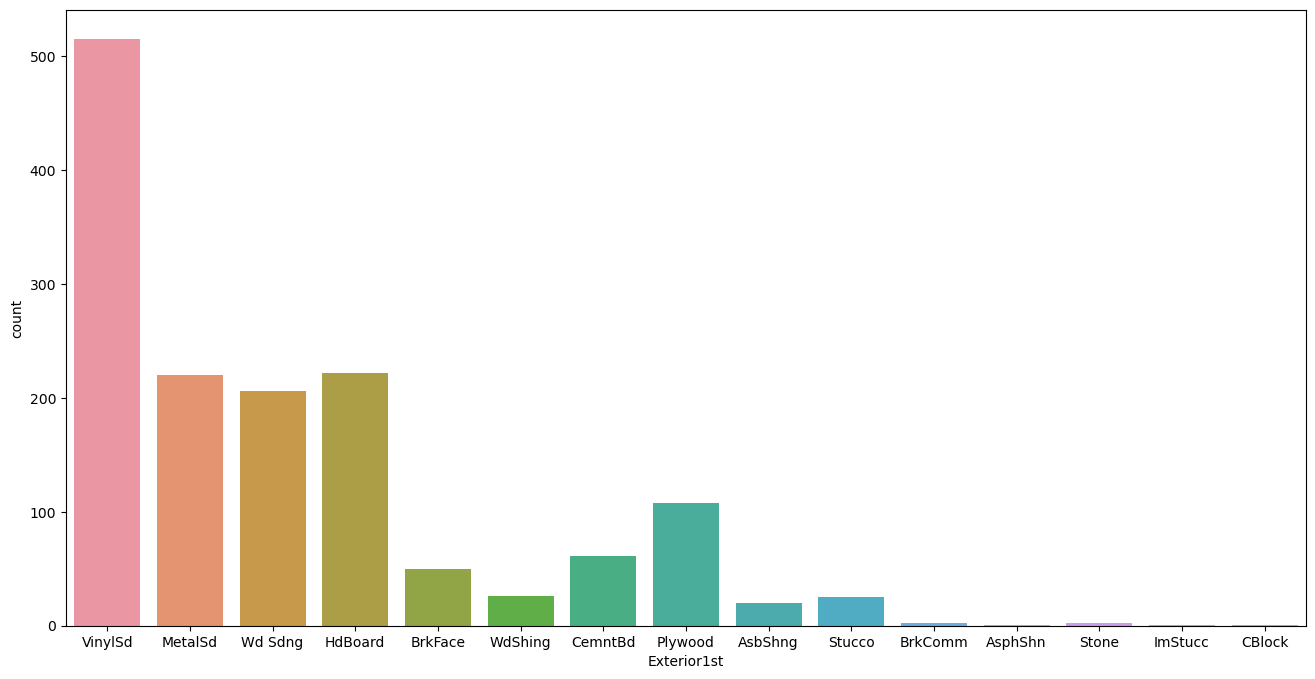

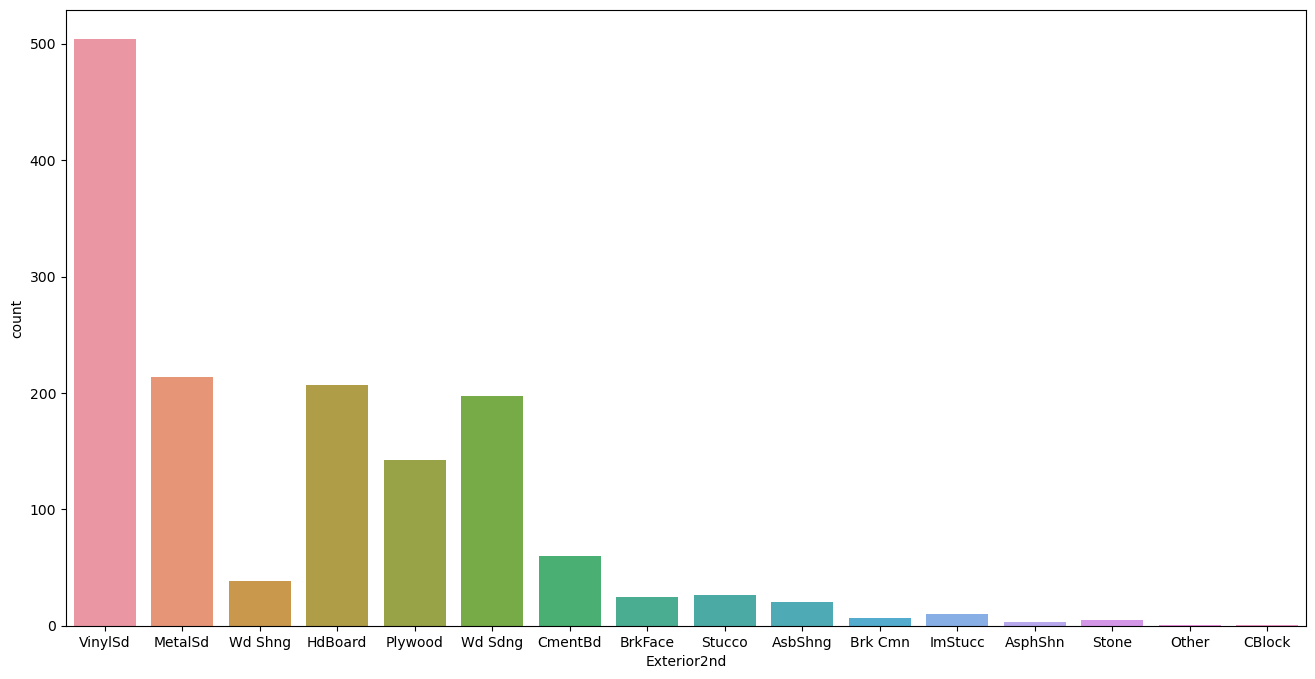

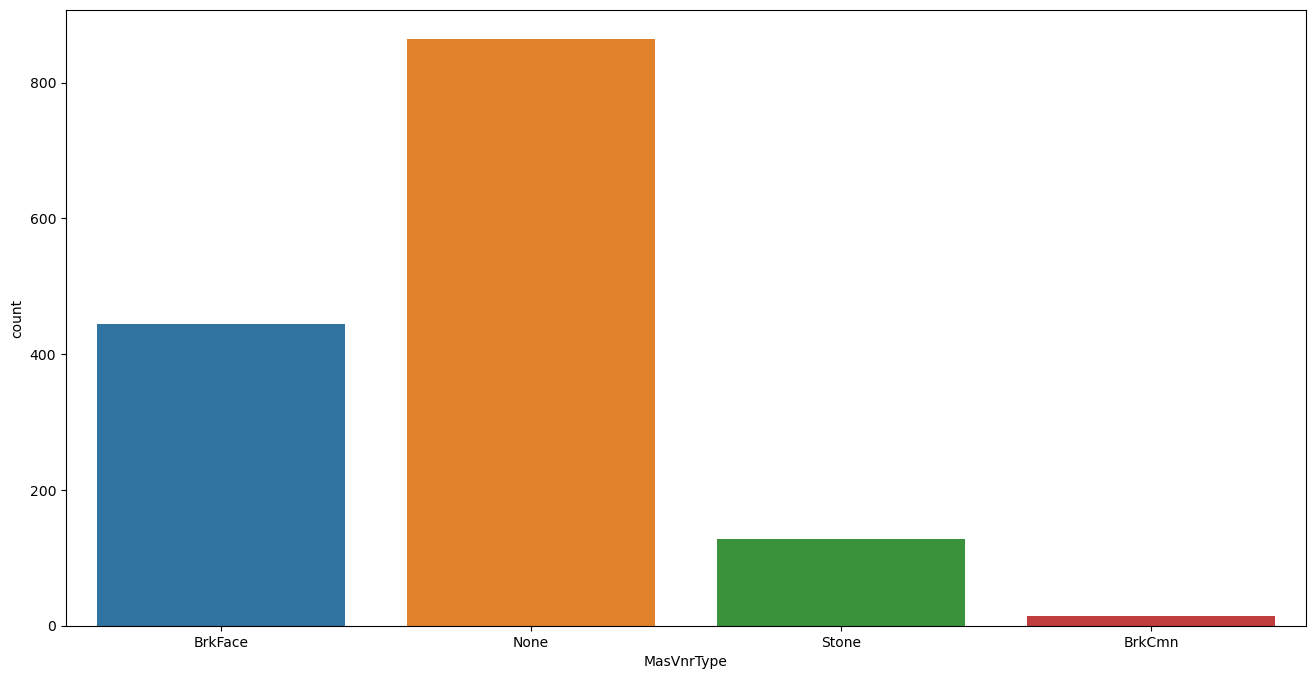

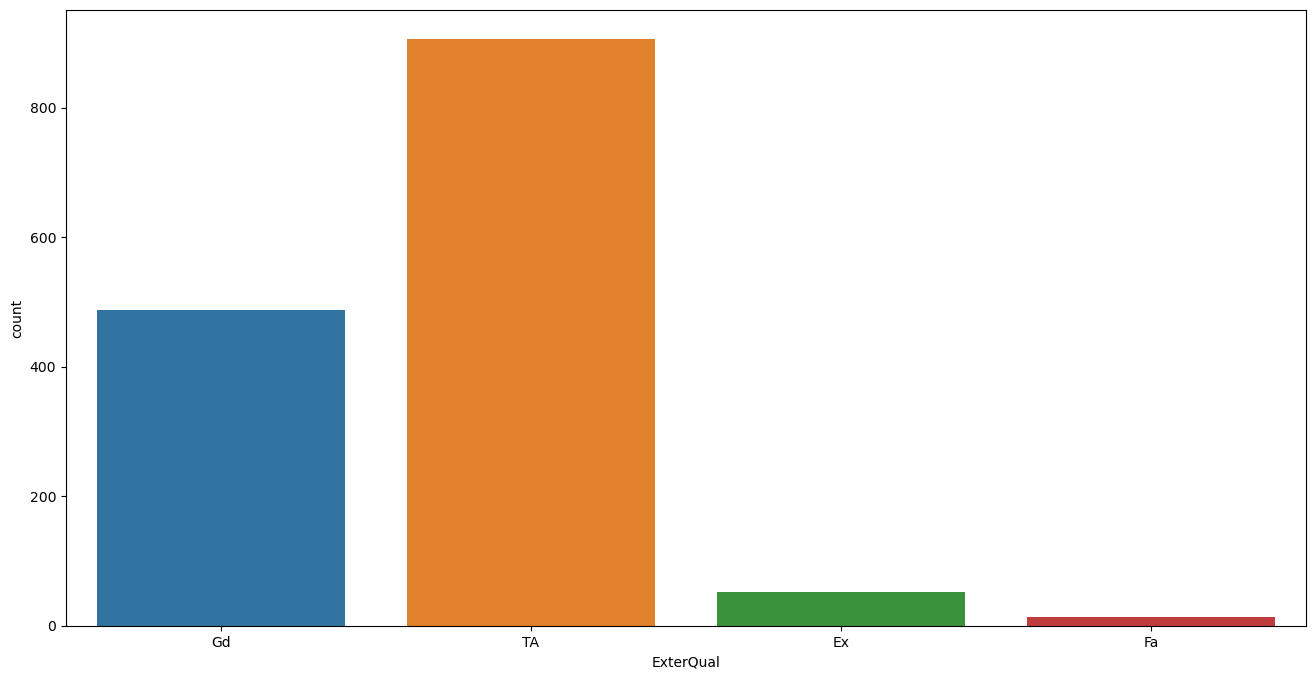

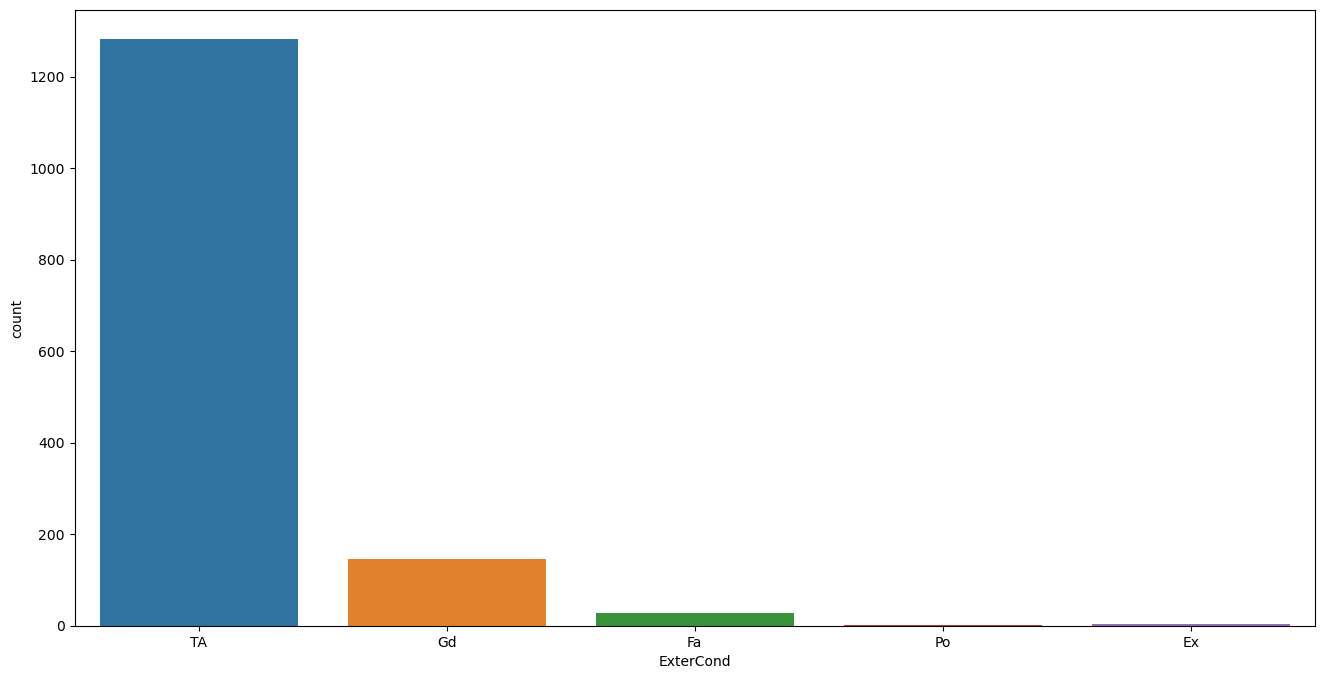

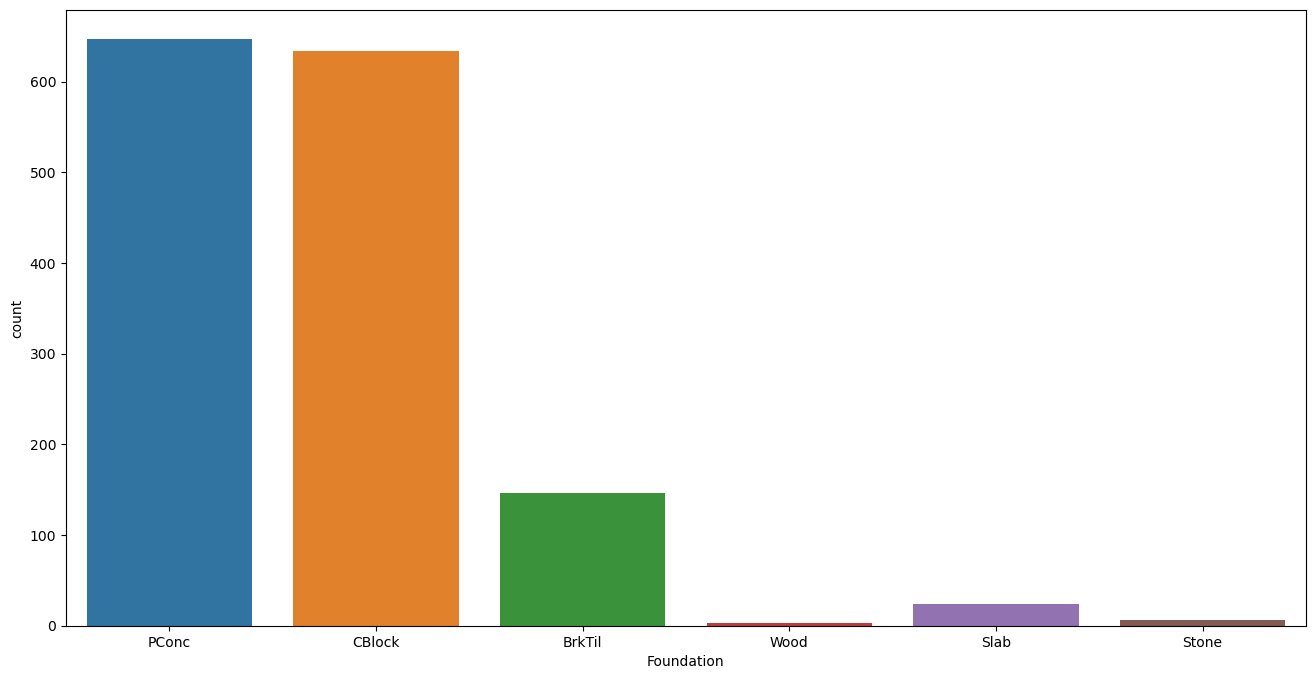

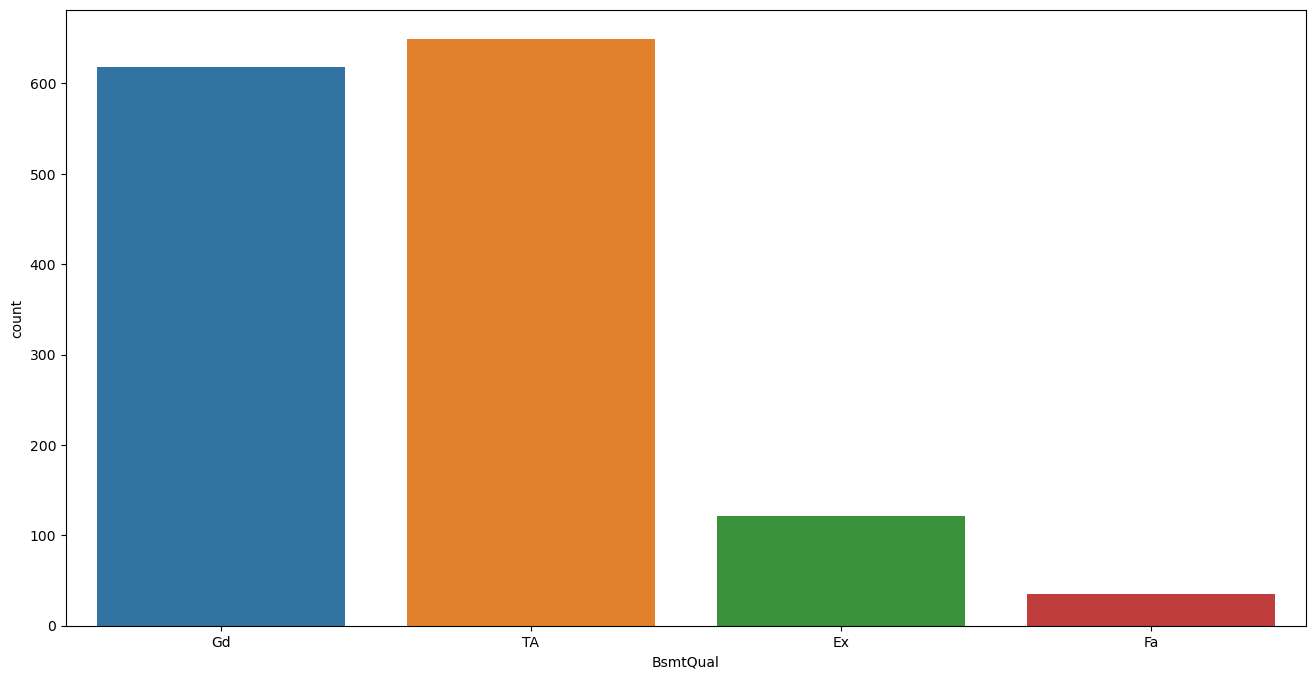

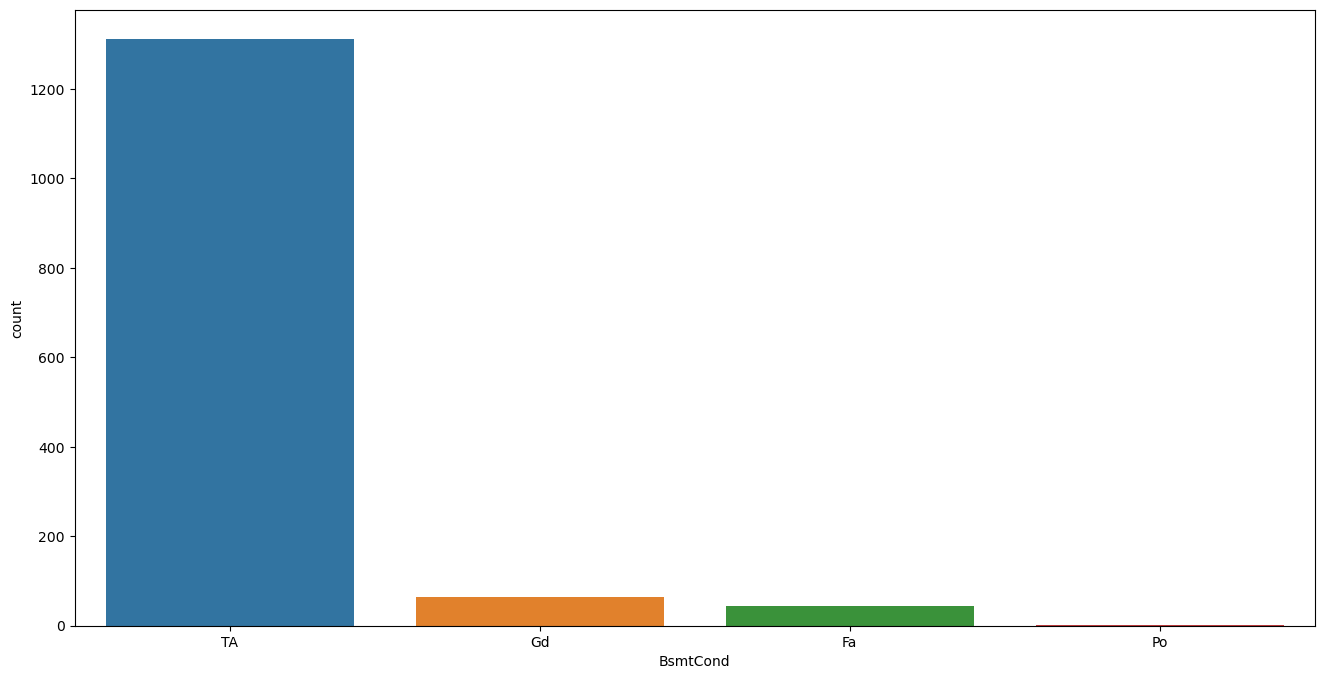

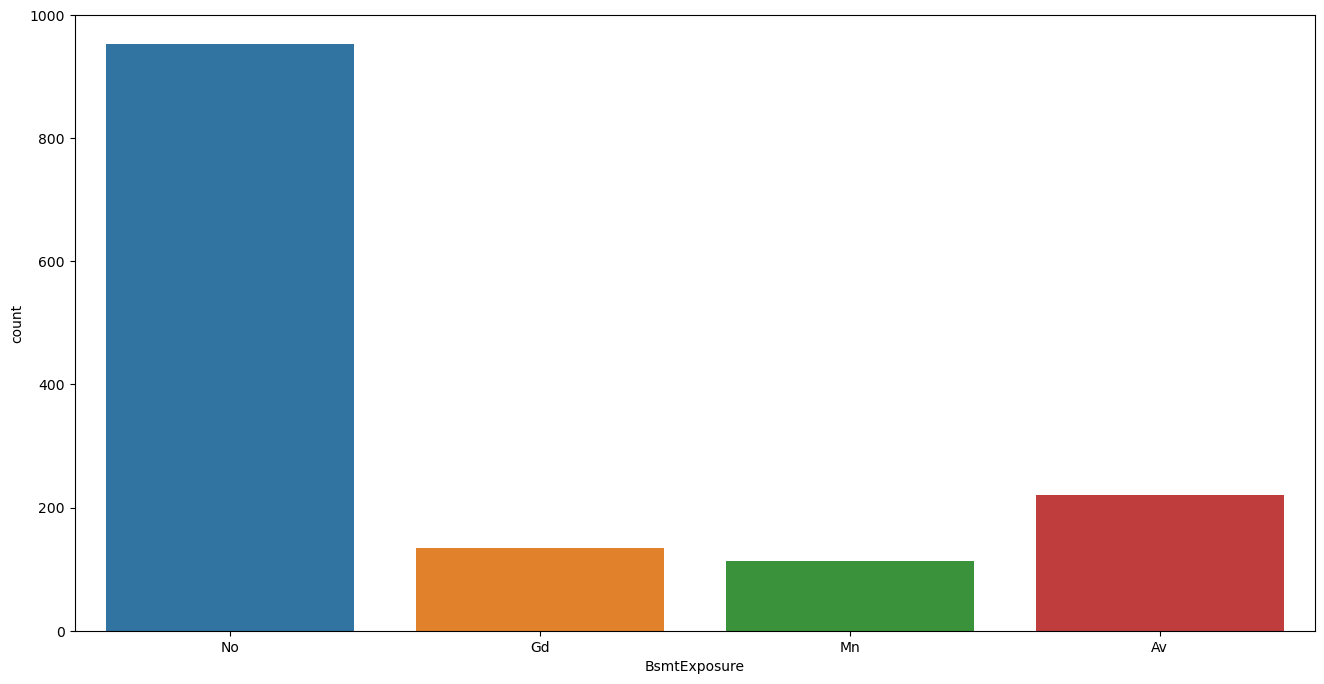

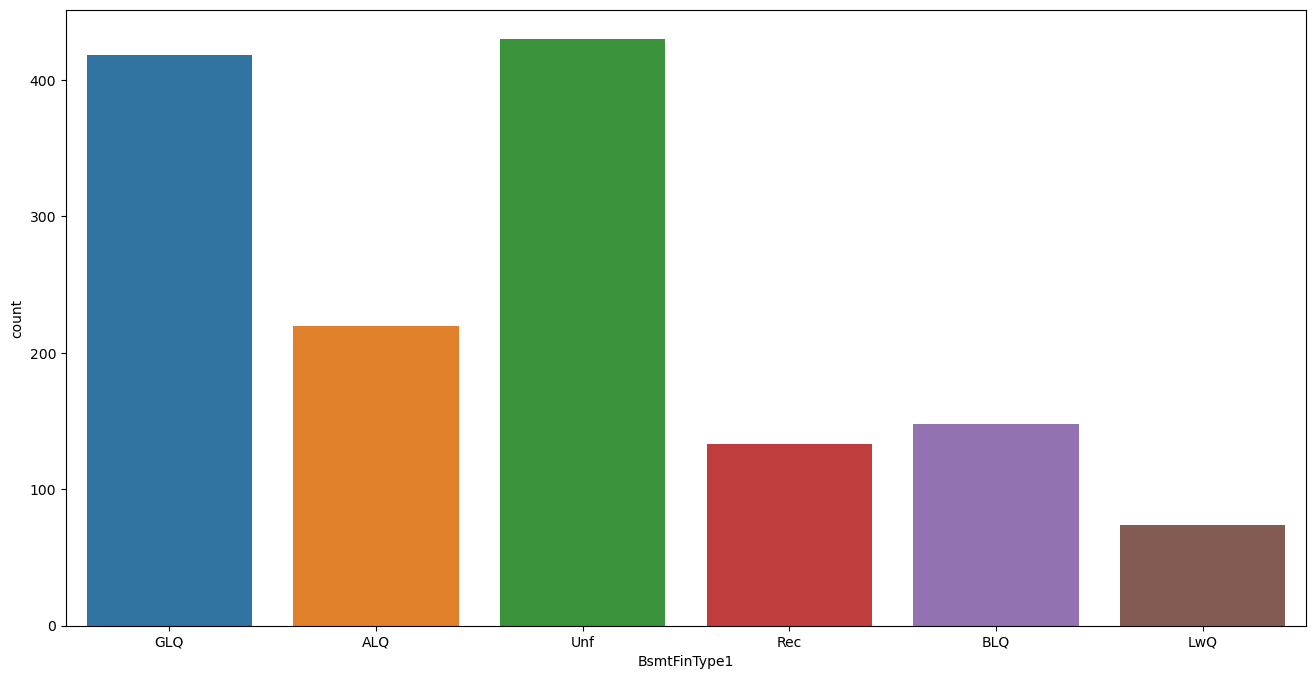

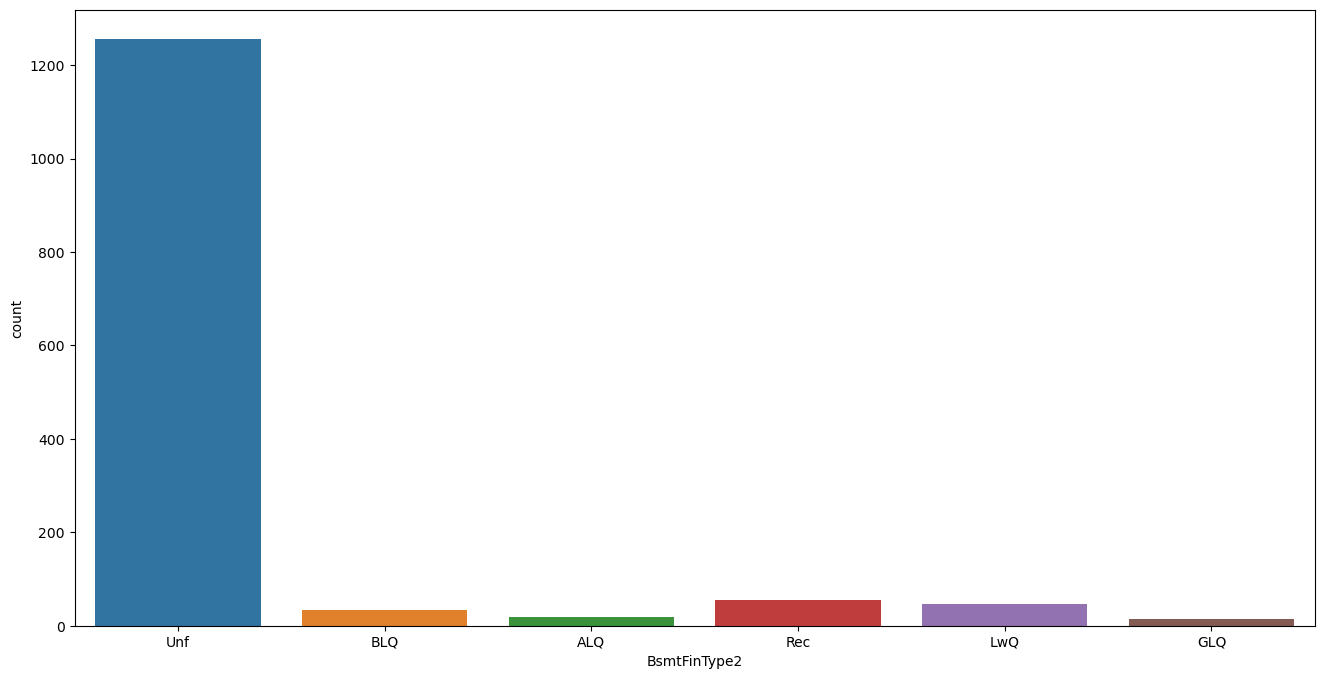

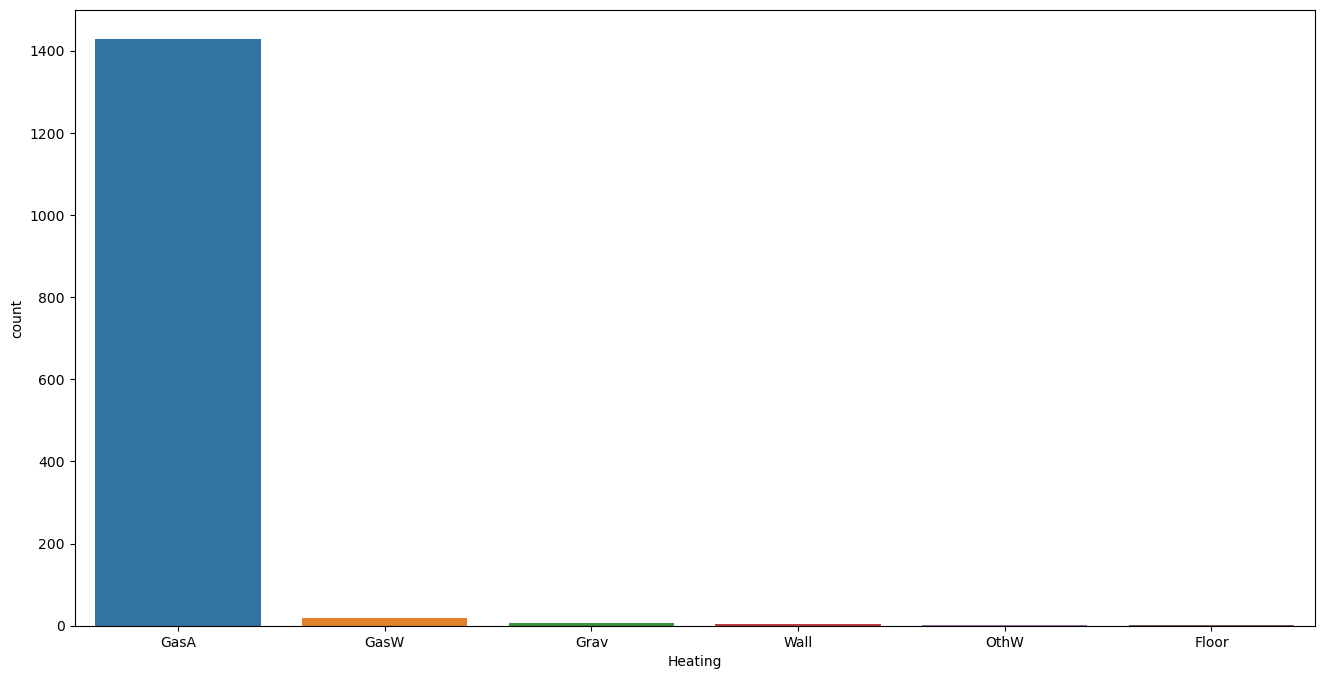

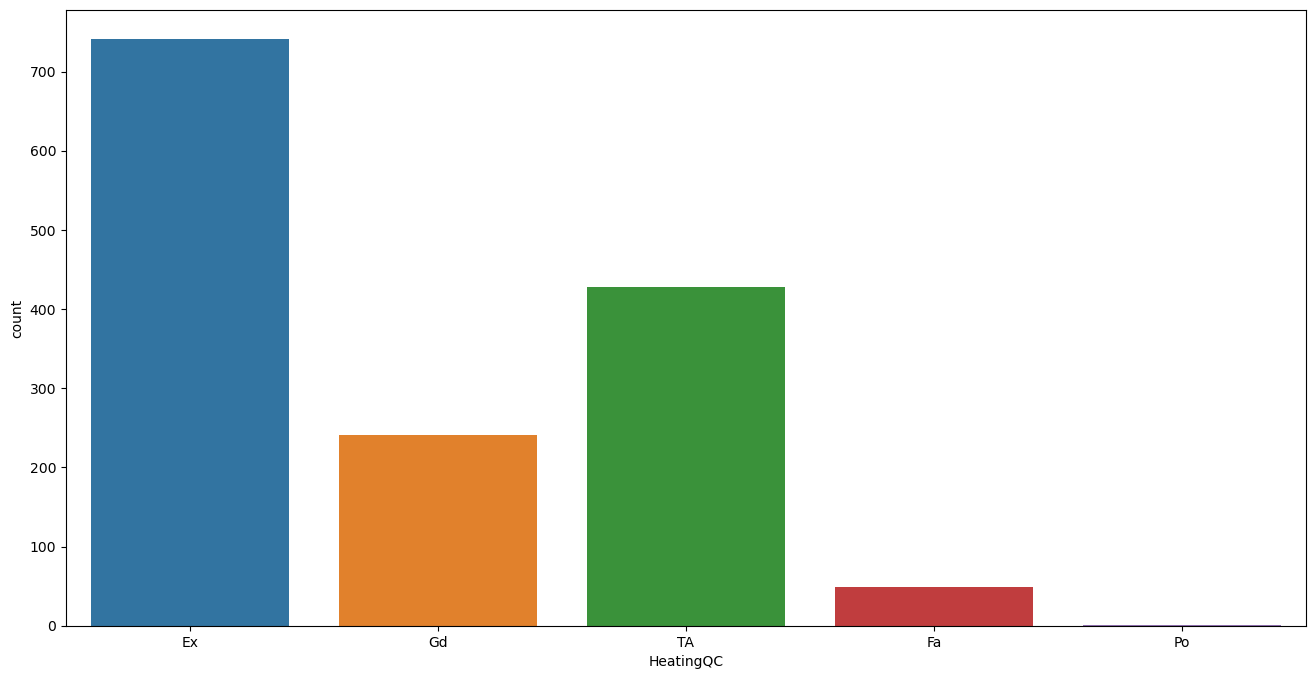

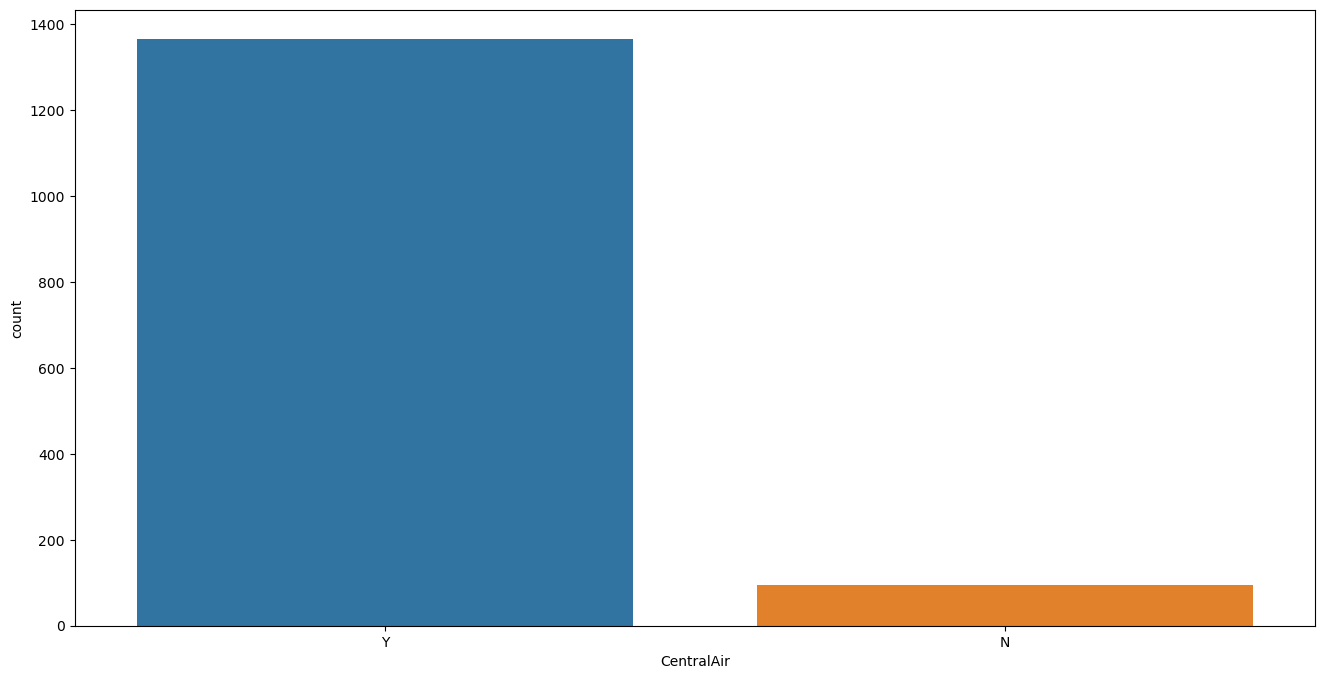

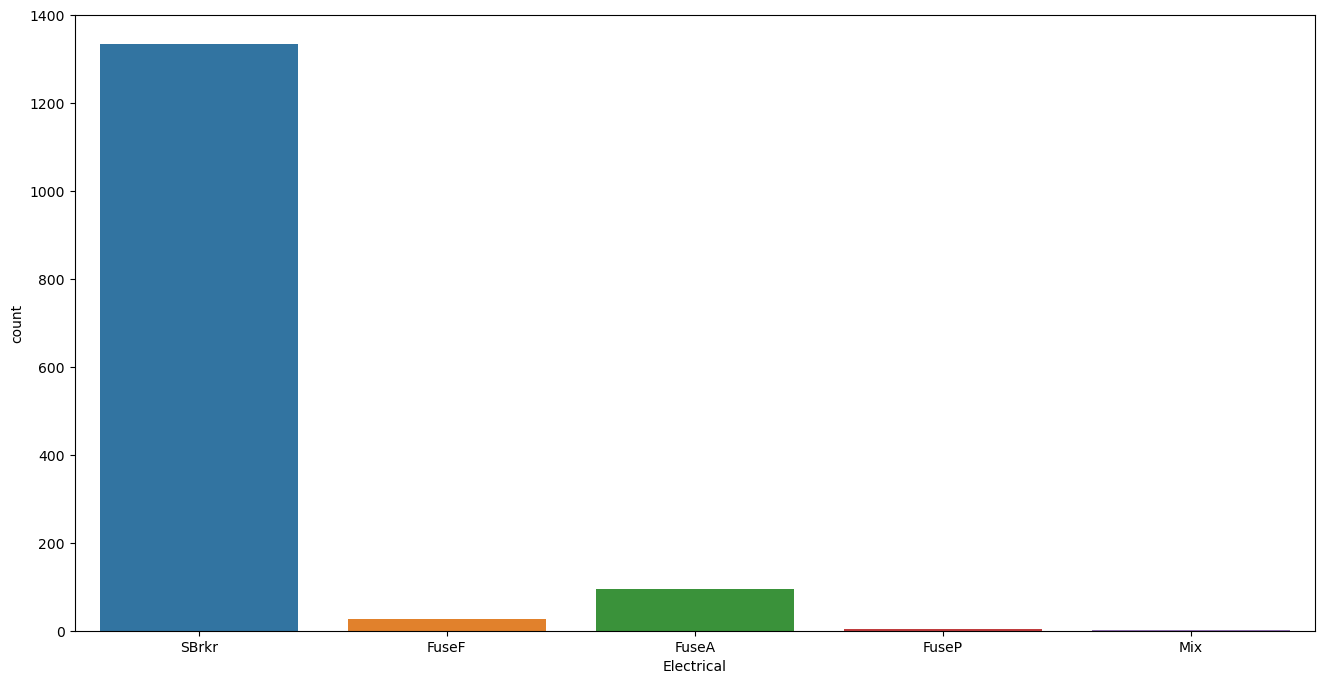

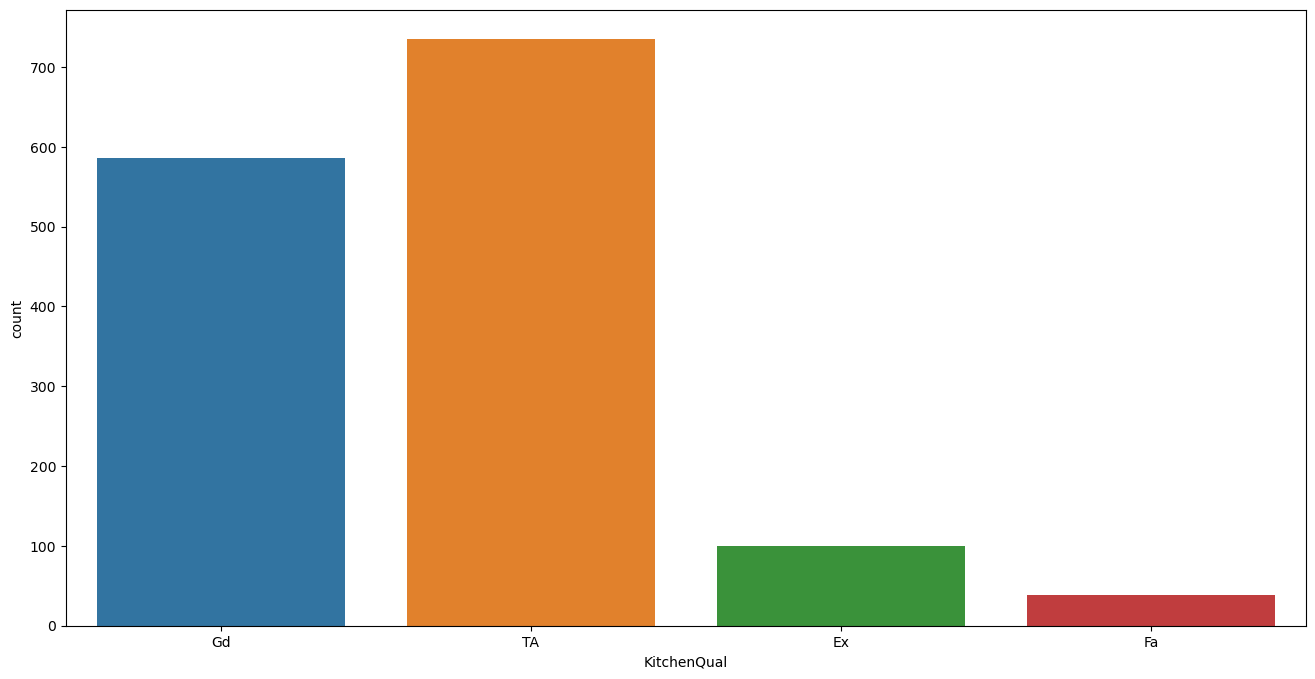

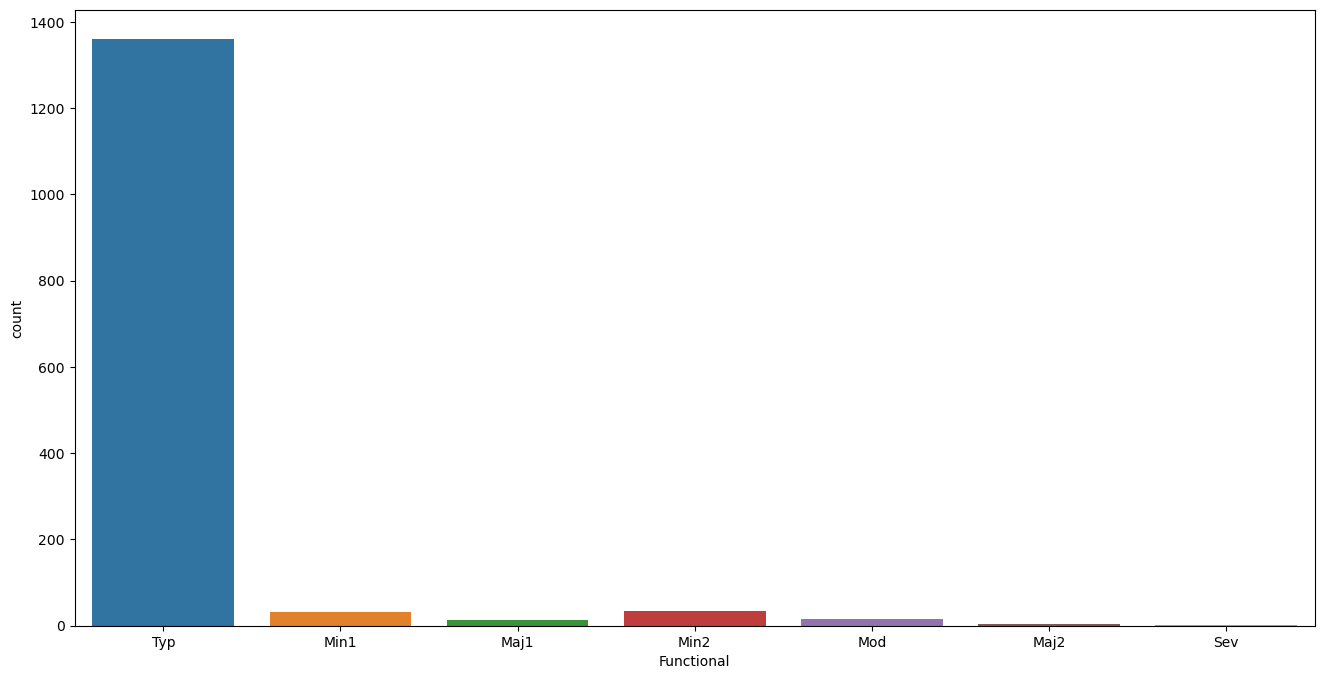

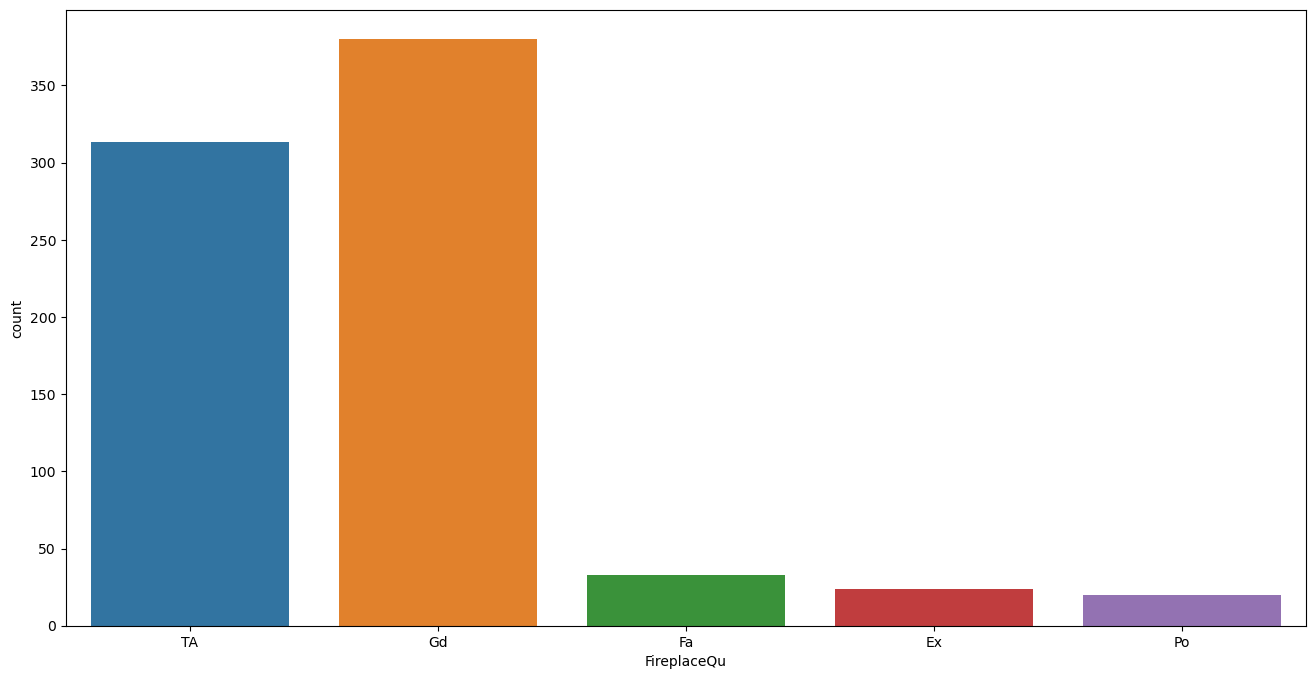

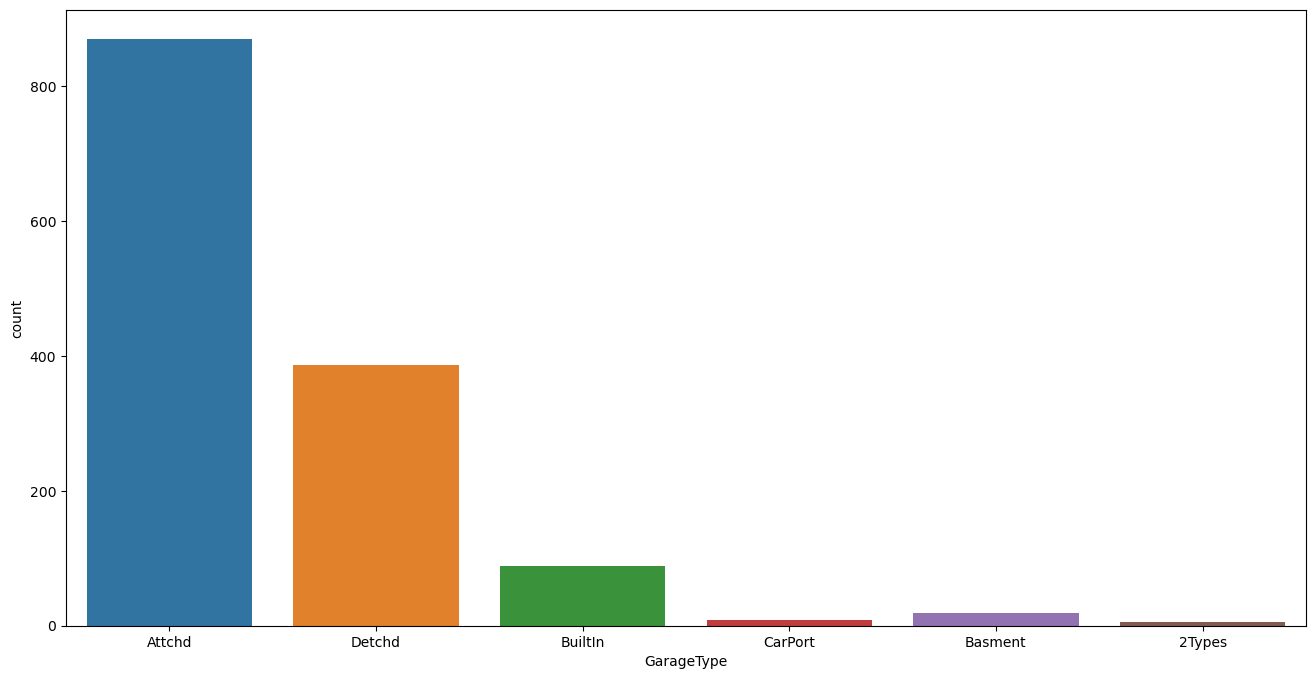

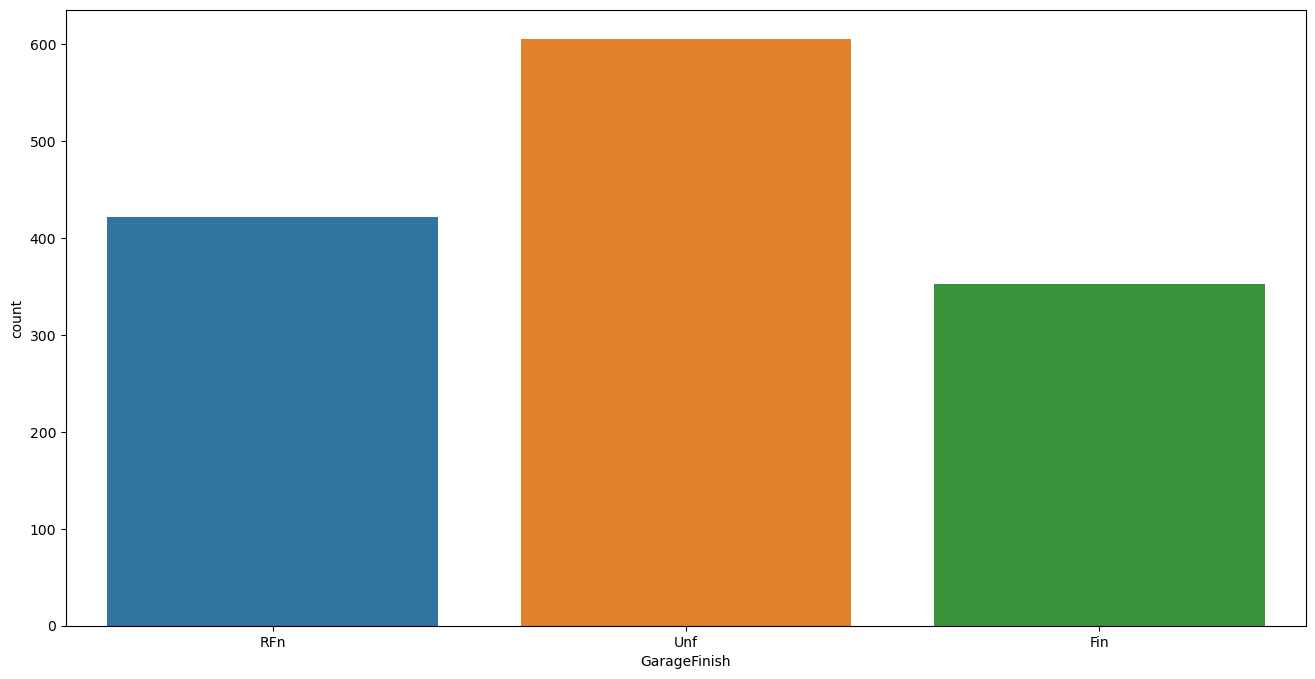

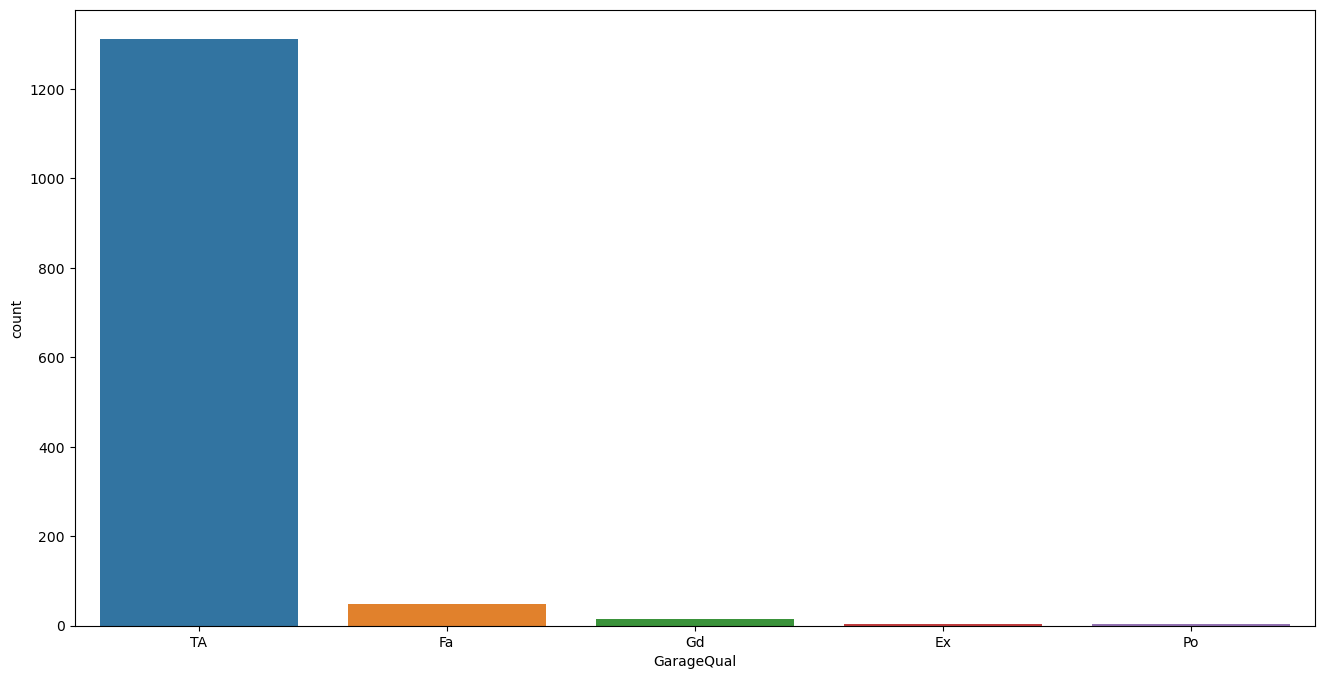

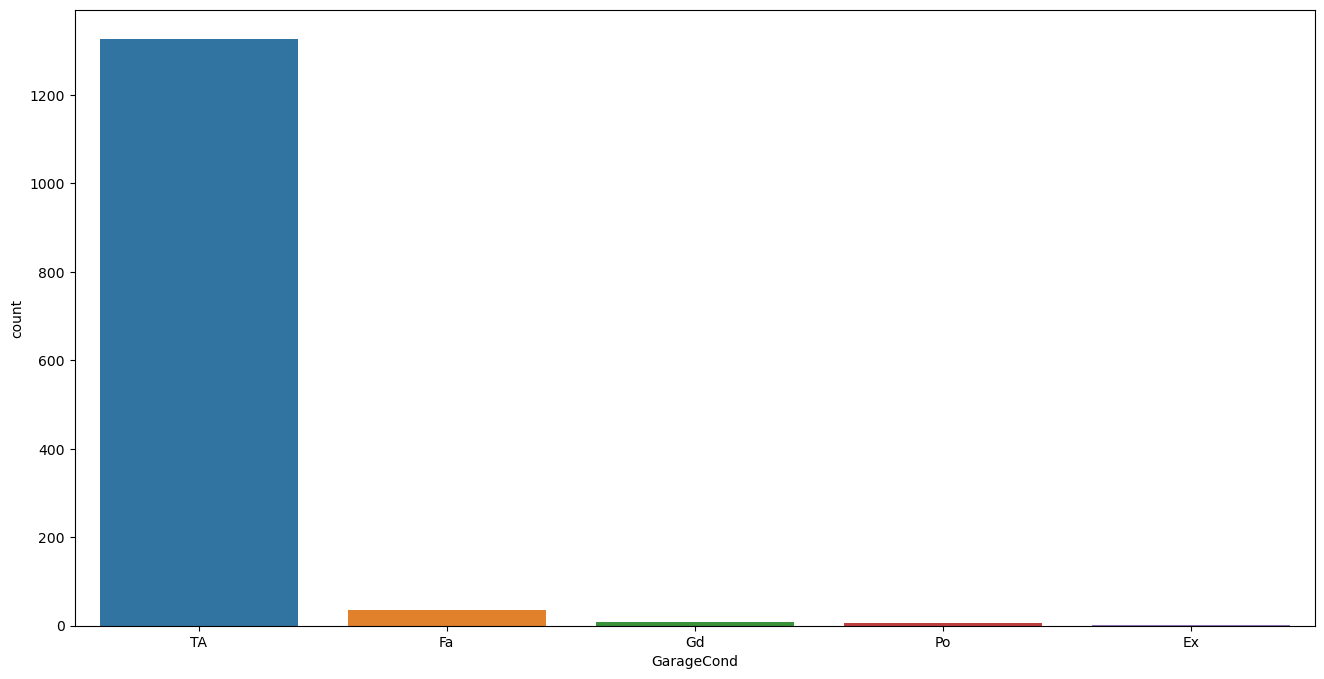

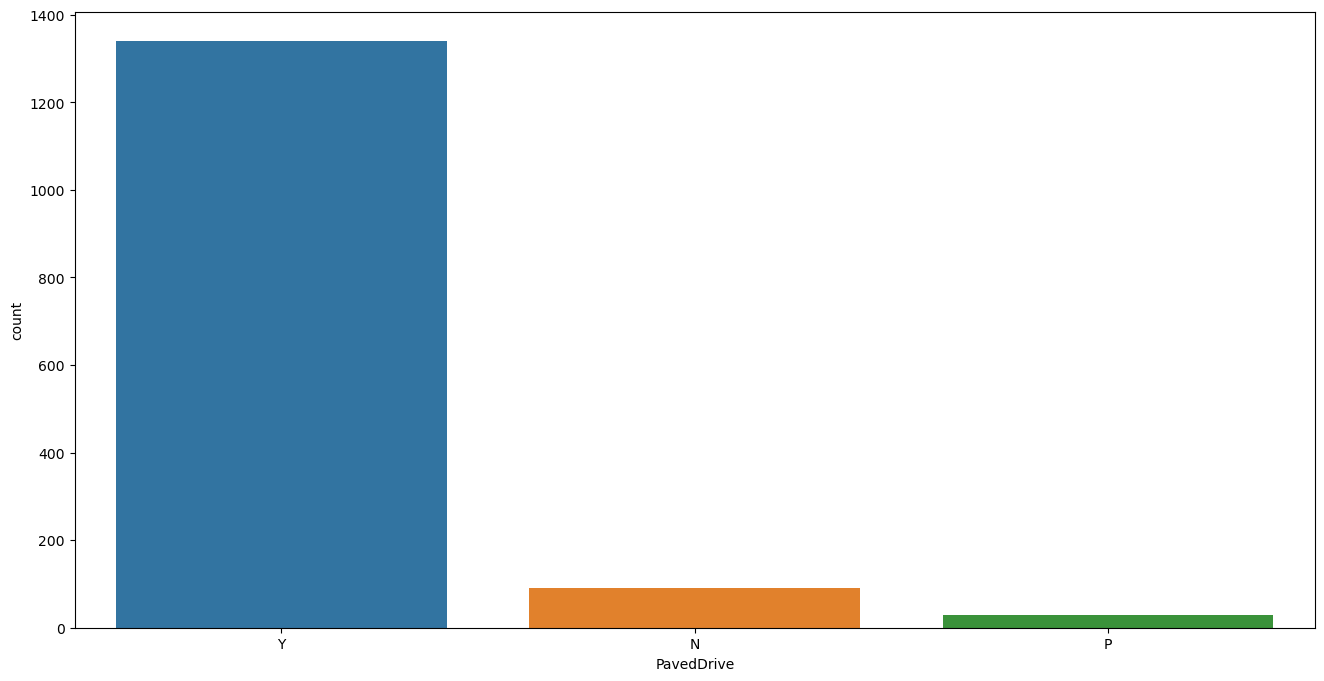

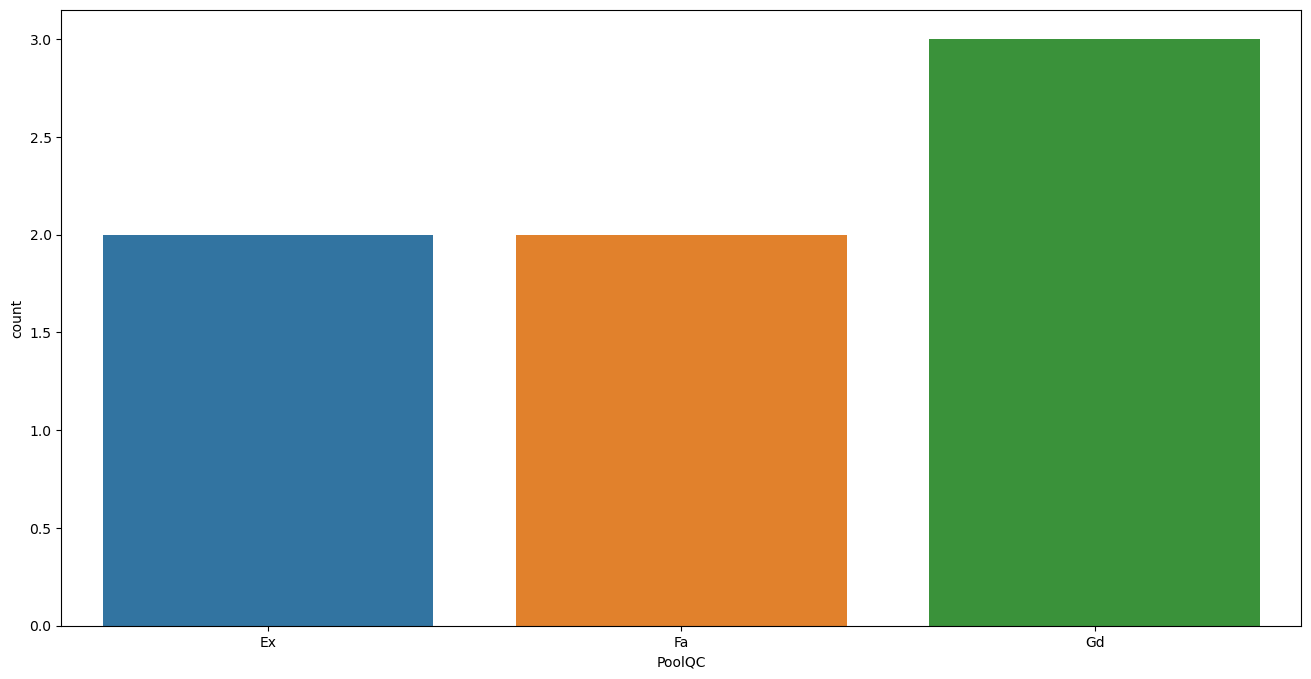

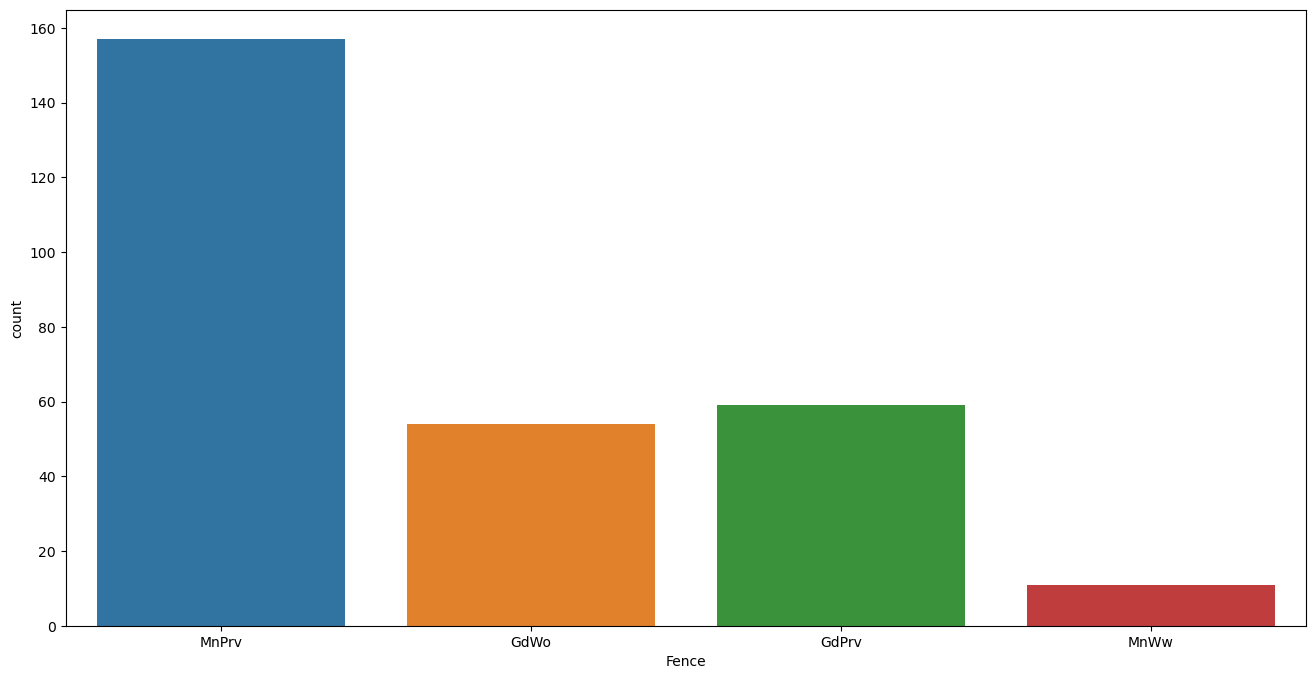

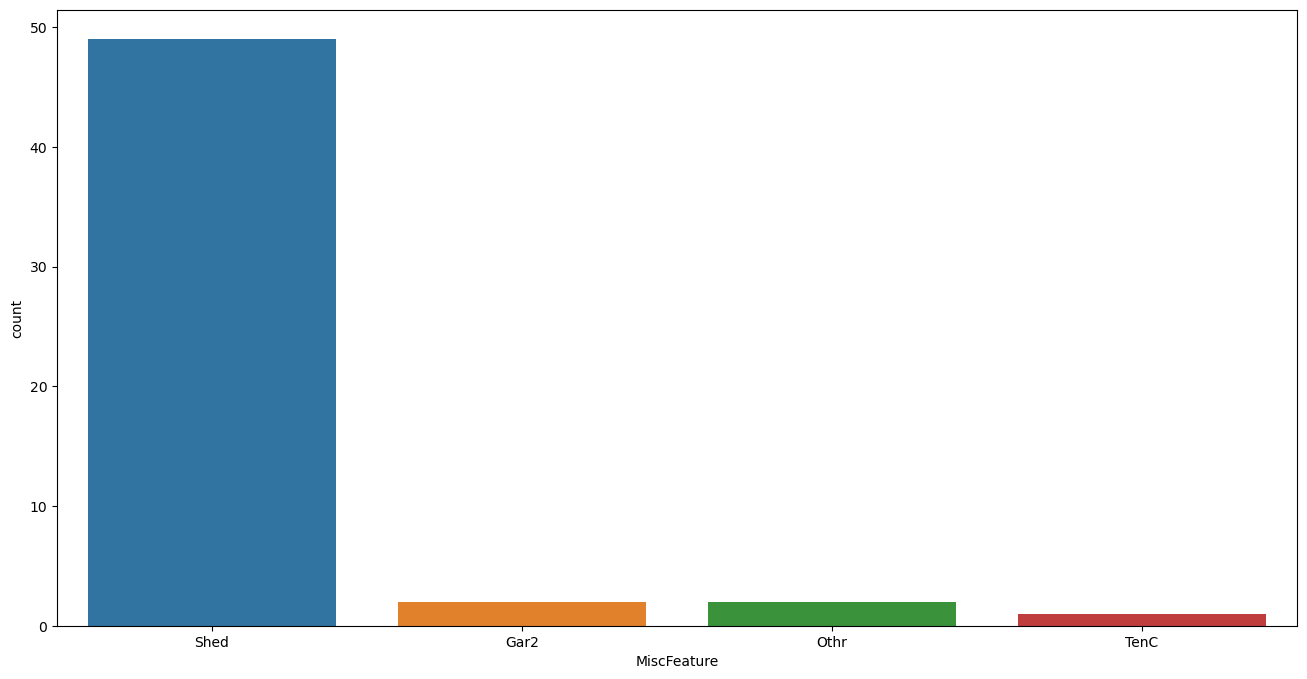

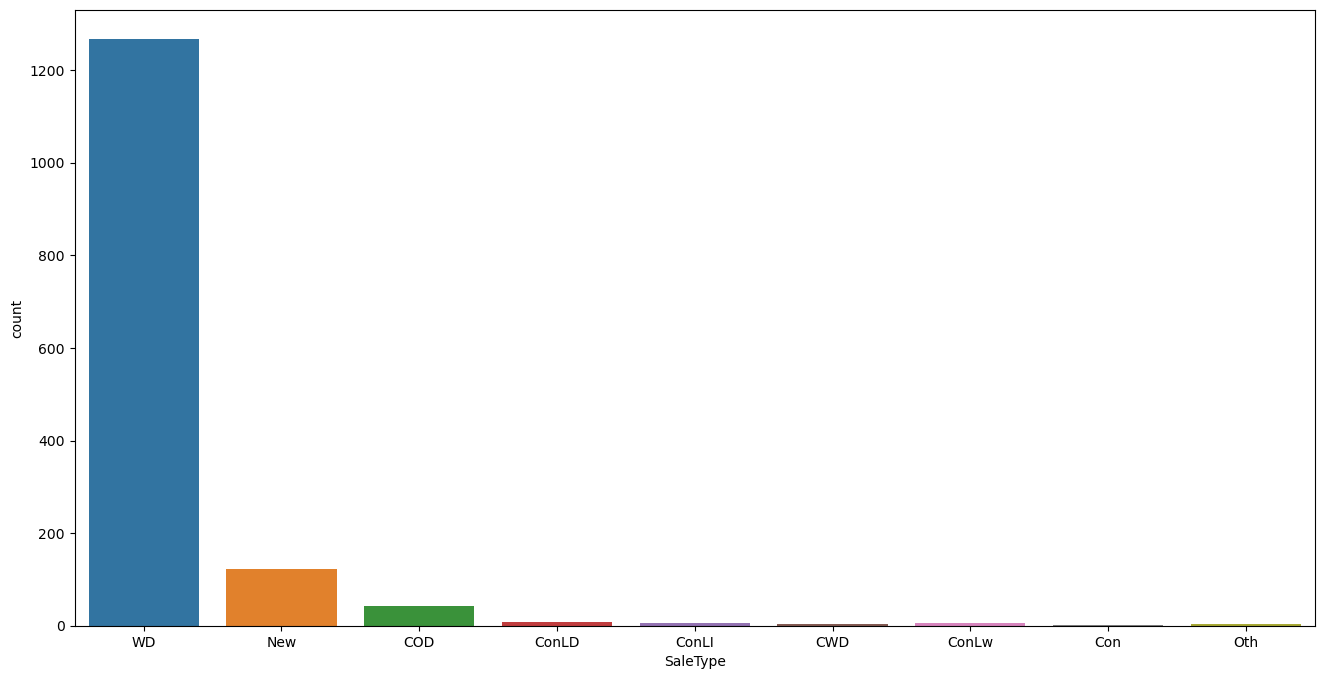

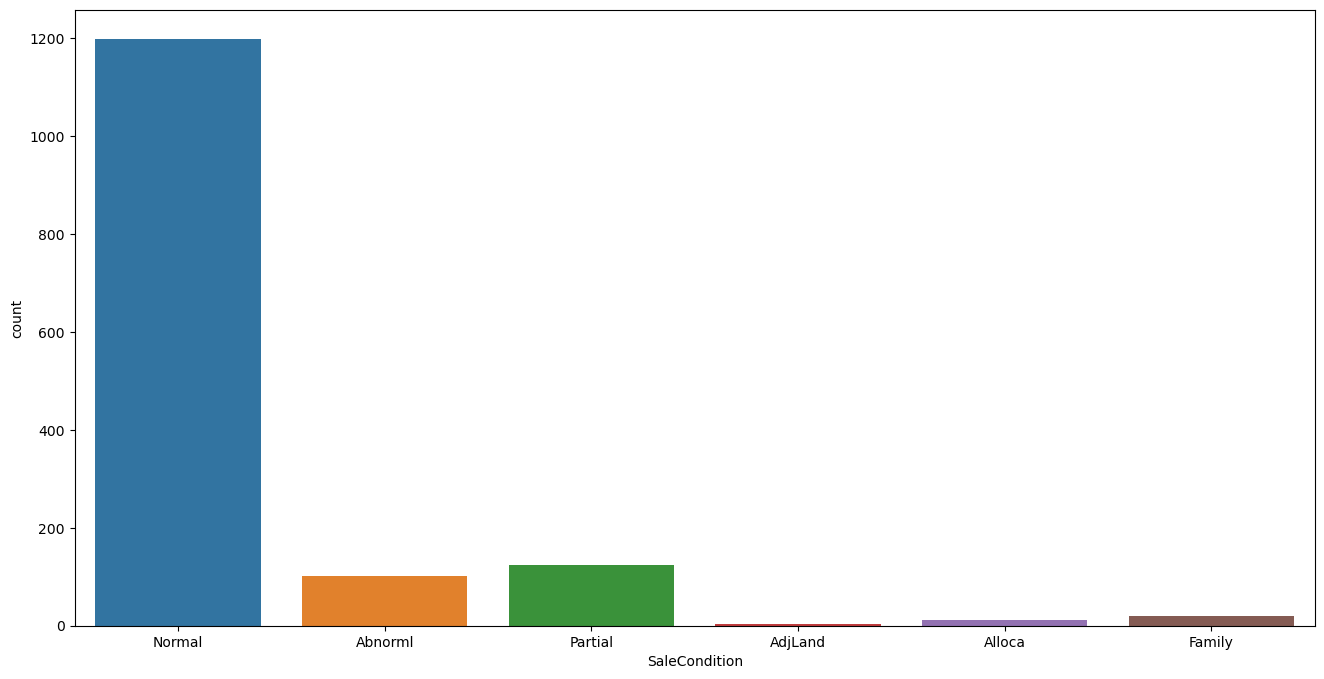

In [5]:
# Visualize categorical features in the train dataset using countplots
for column in categorical_features.columns:
    plt.figure(figsize=(16, 8))
    sns.countplot(data=train_df, x=column)
    plt.show()

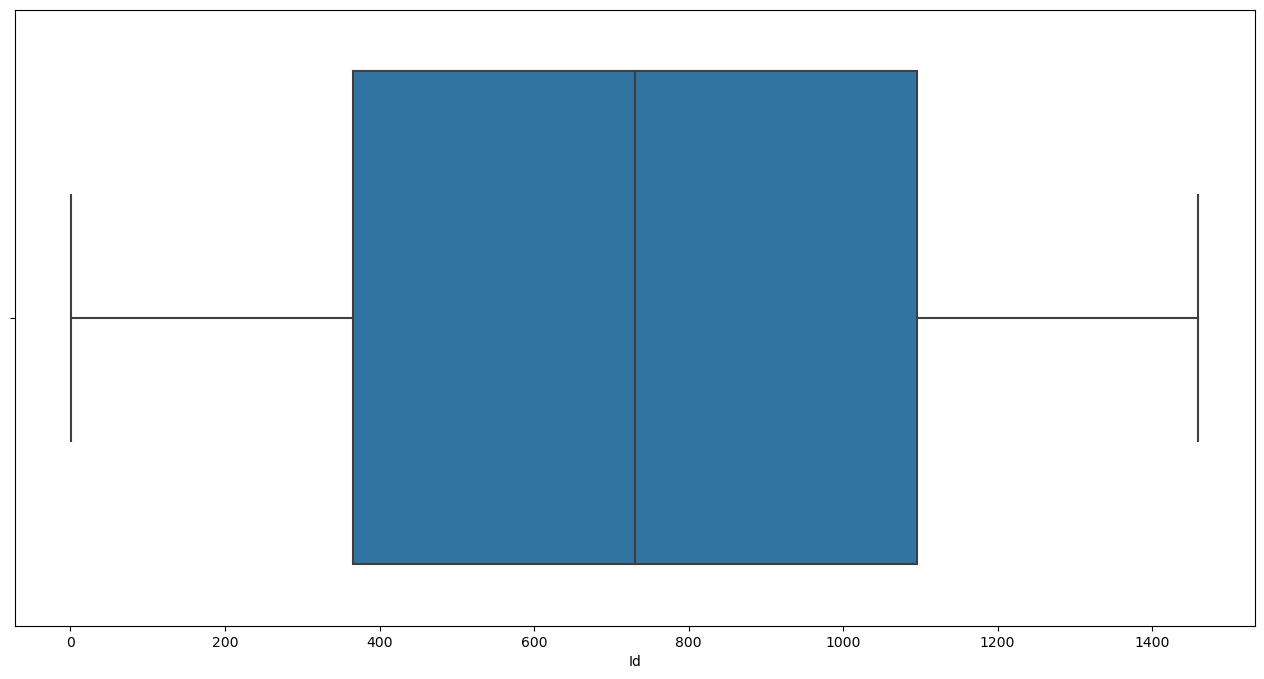

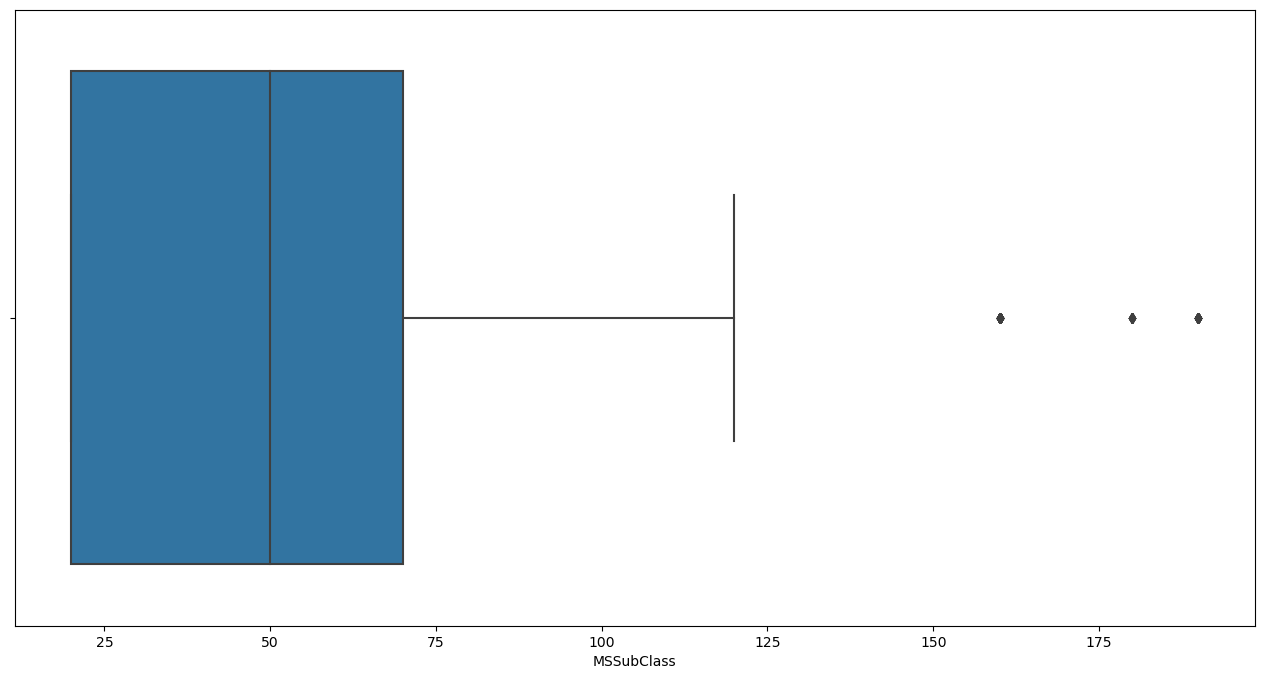

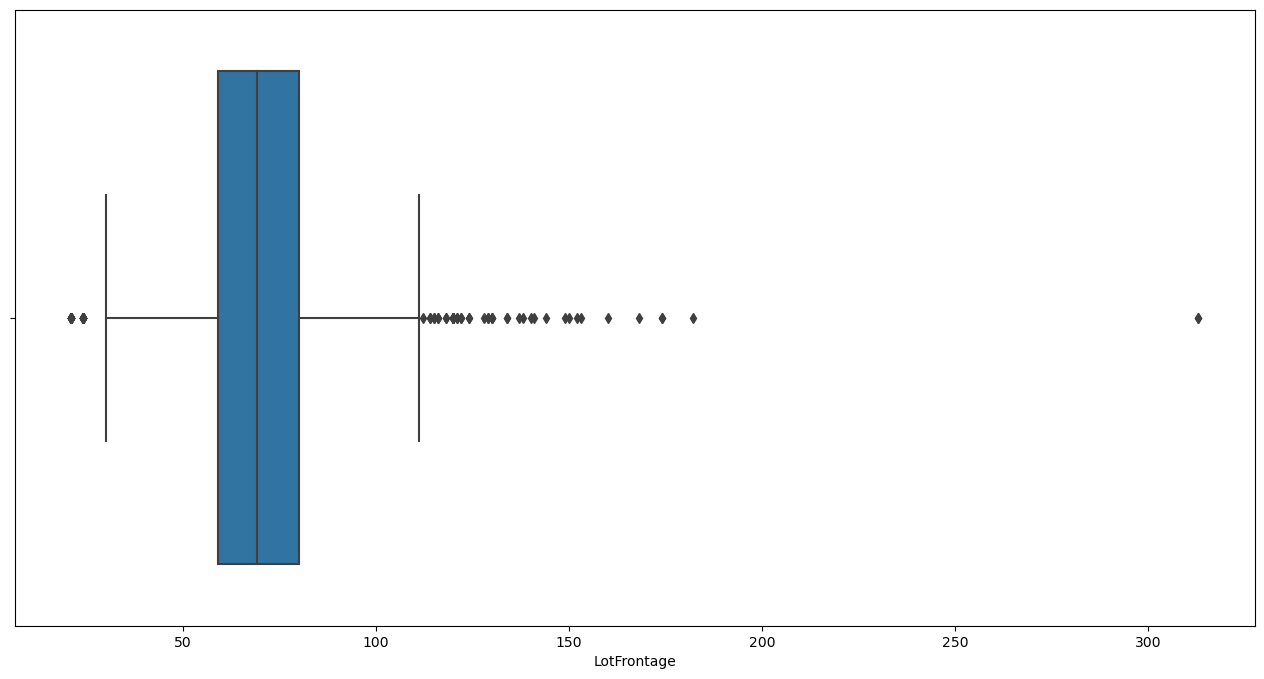

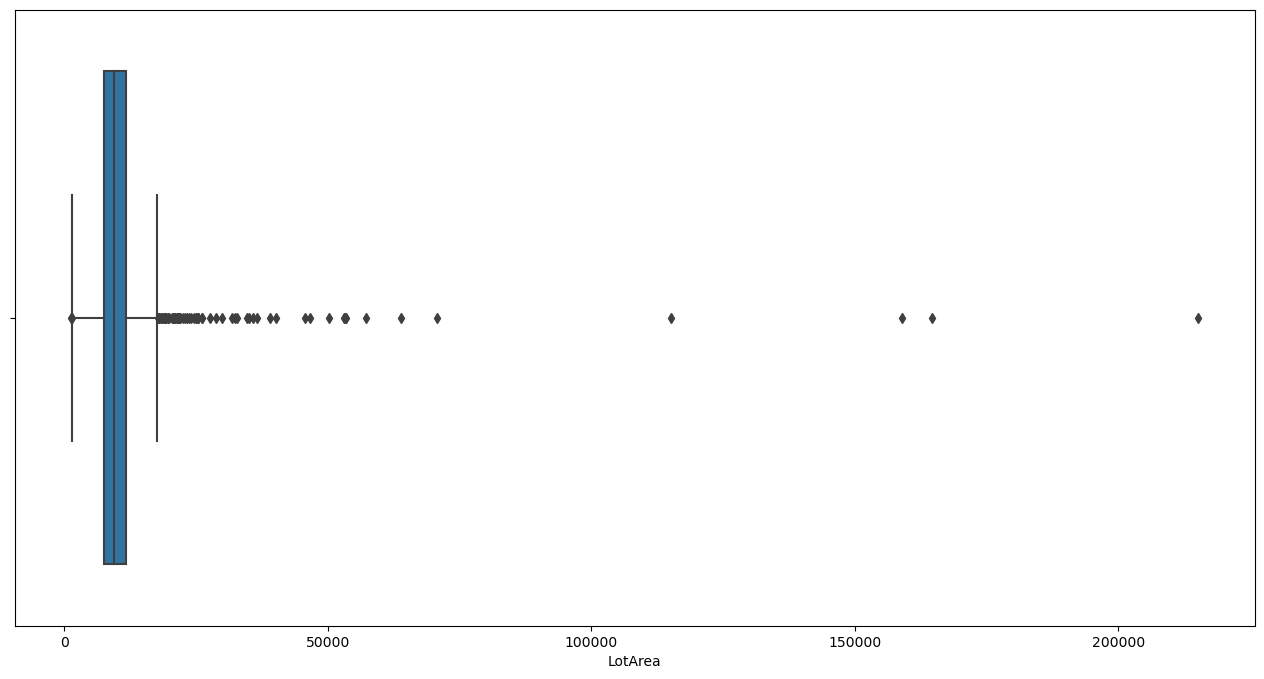

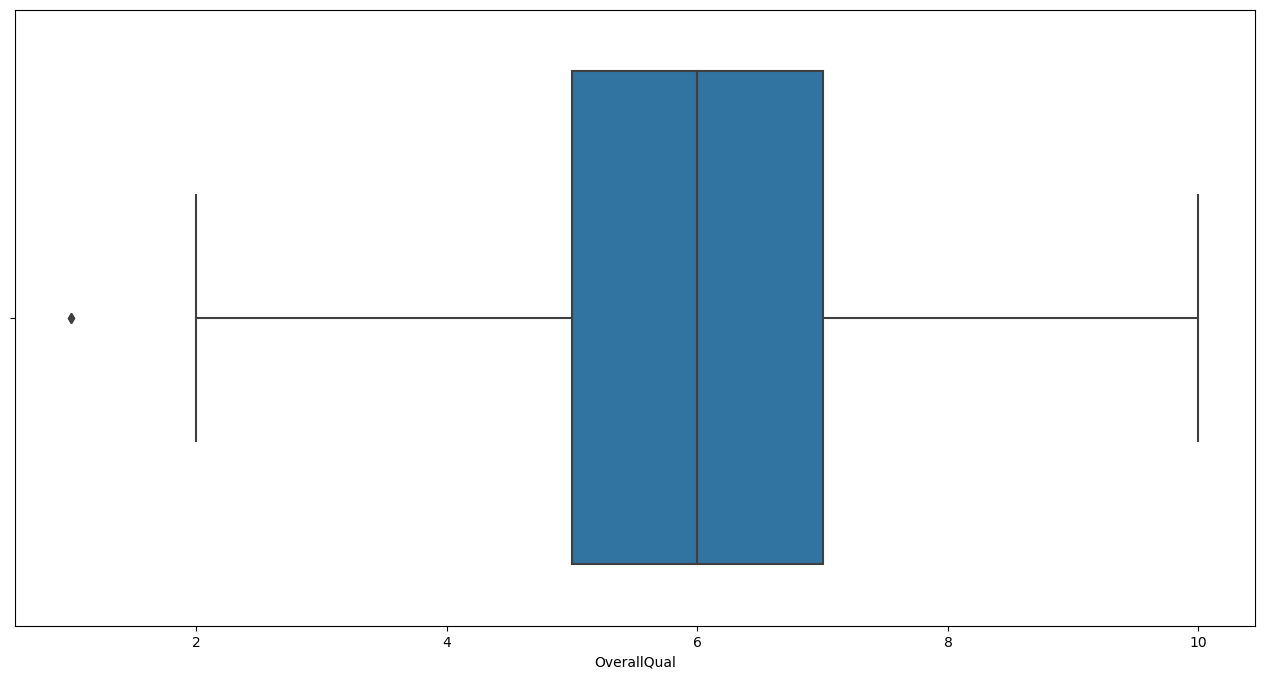

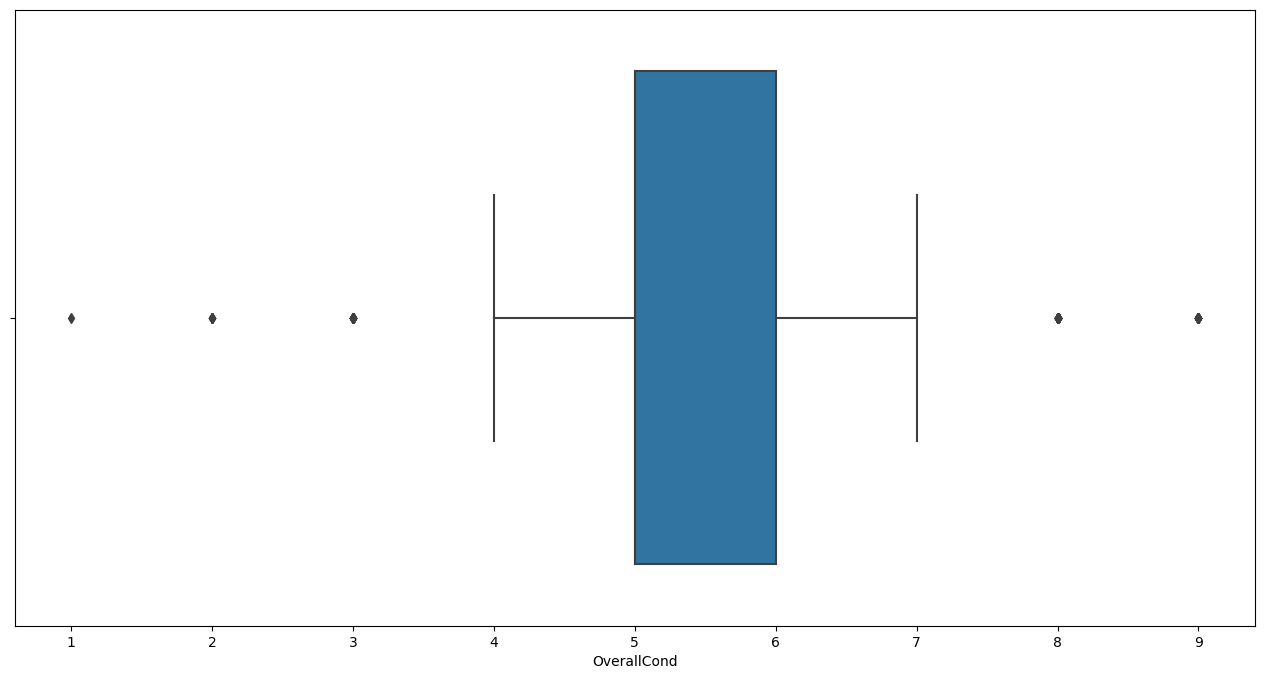

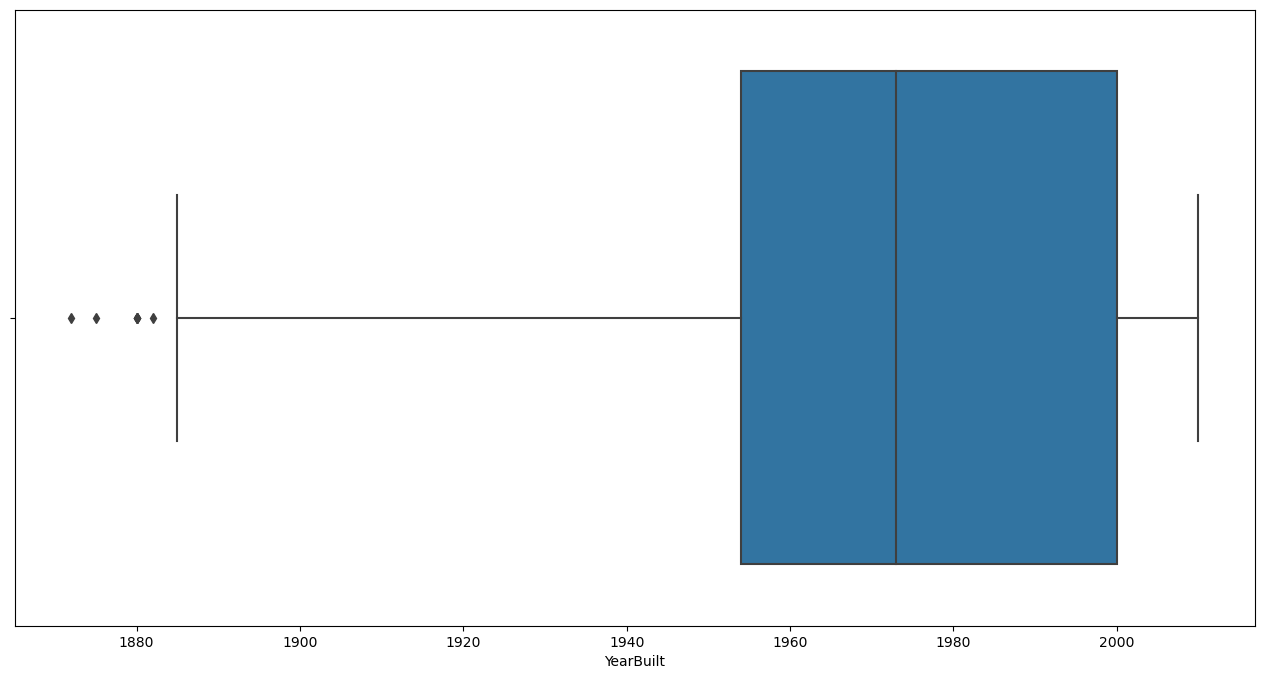

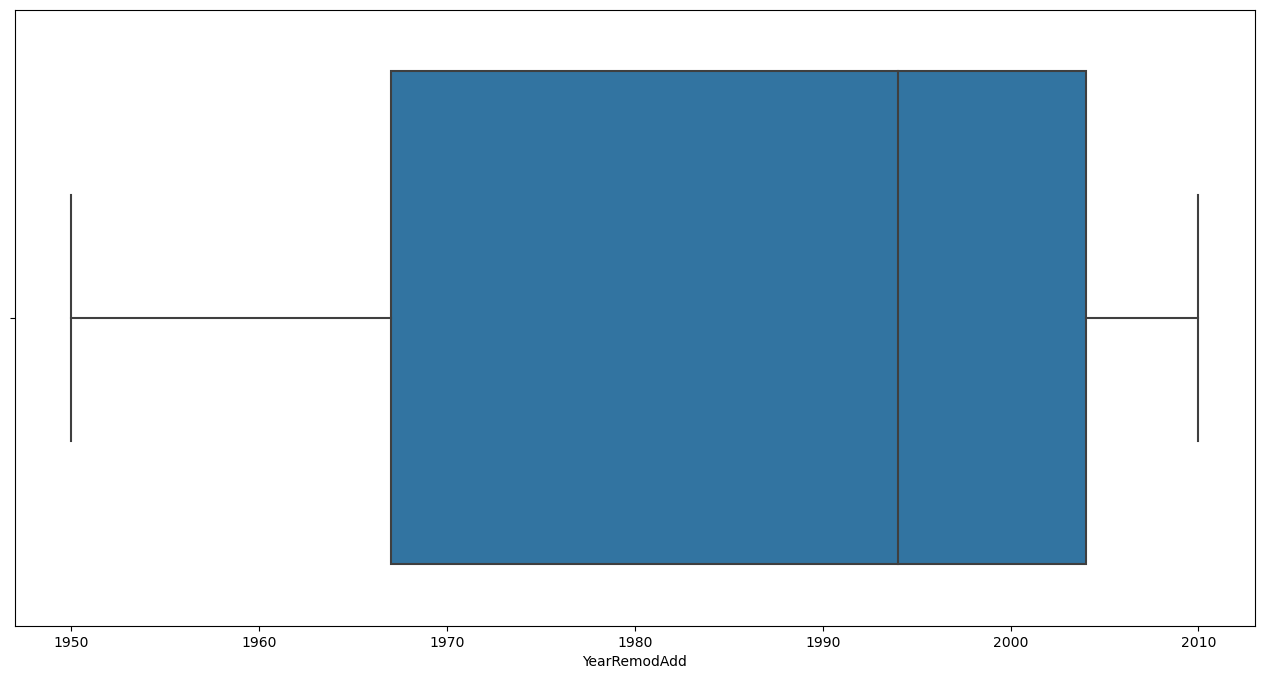

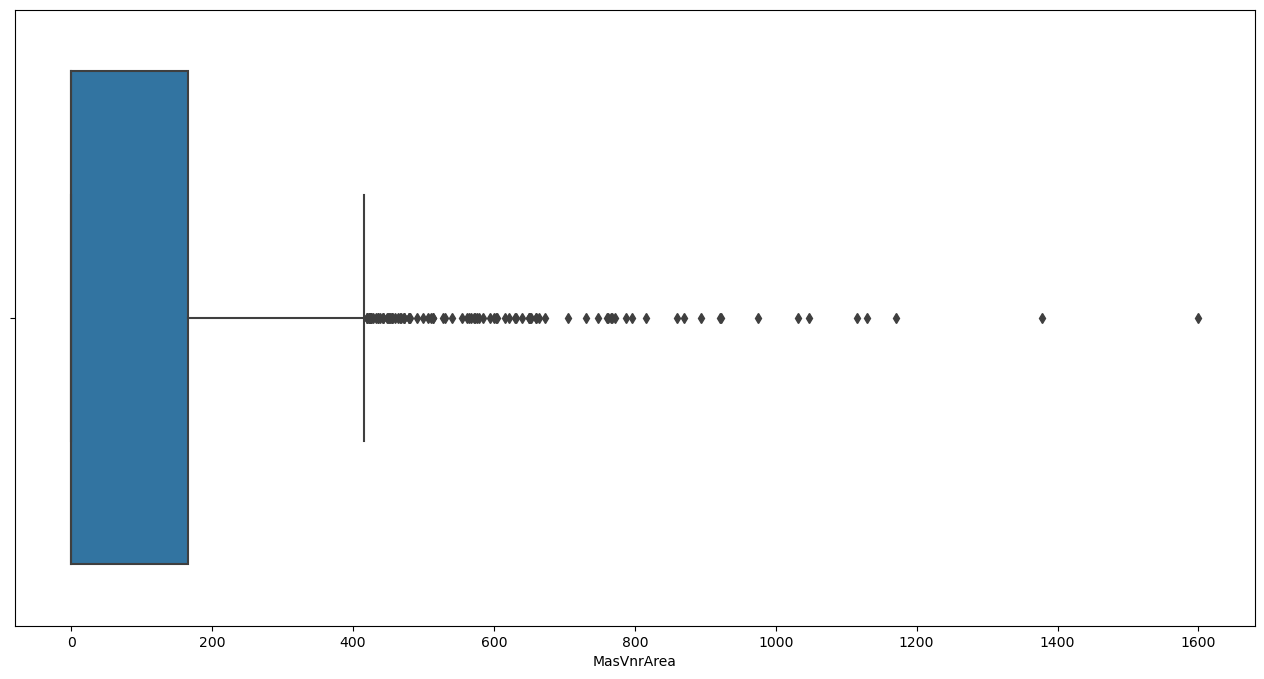

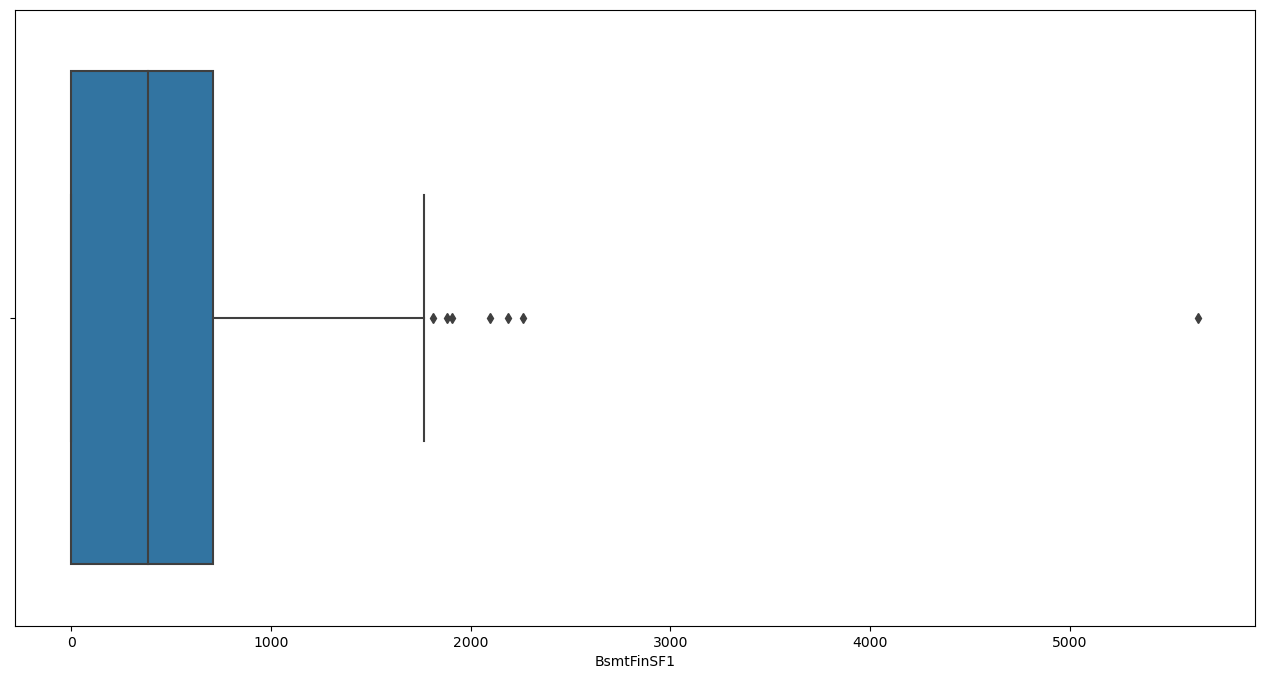

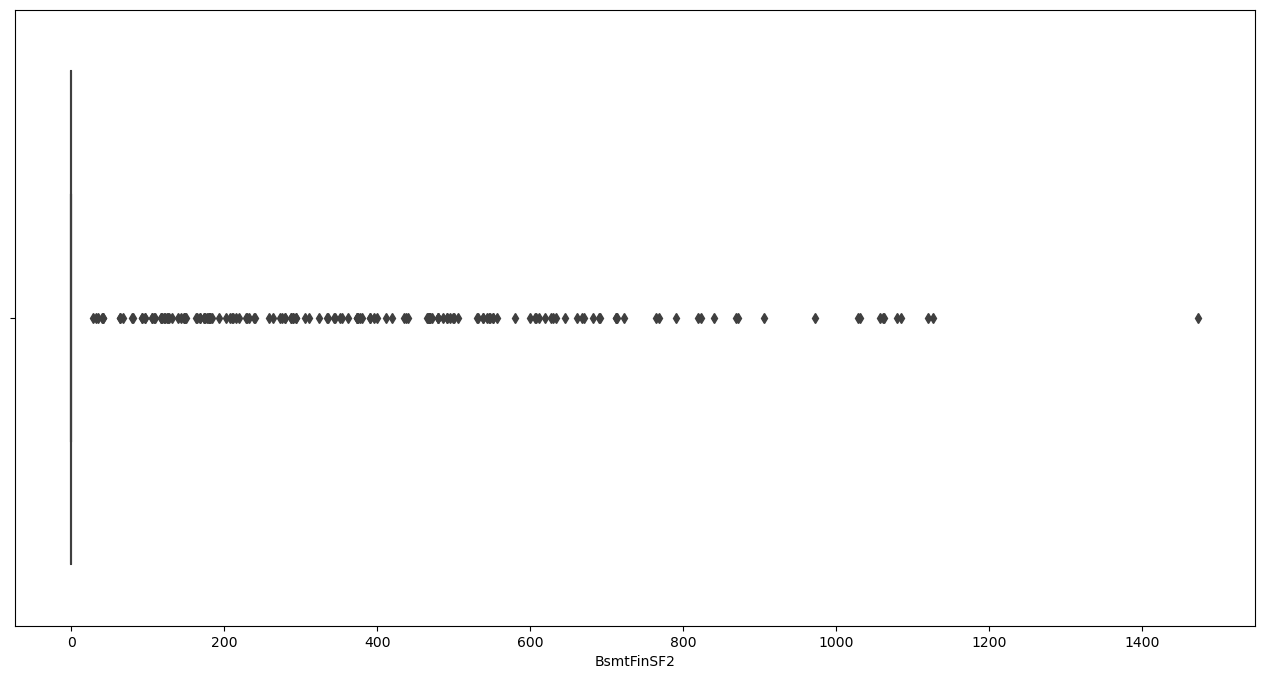

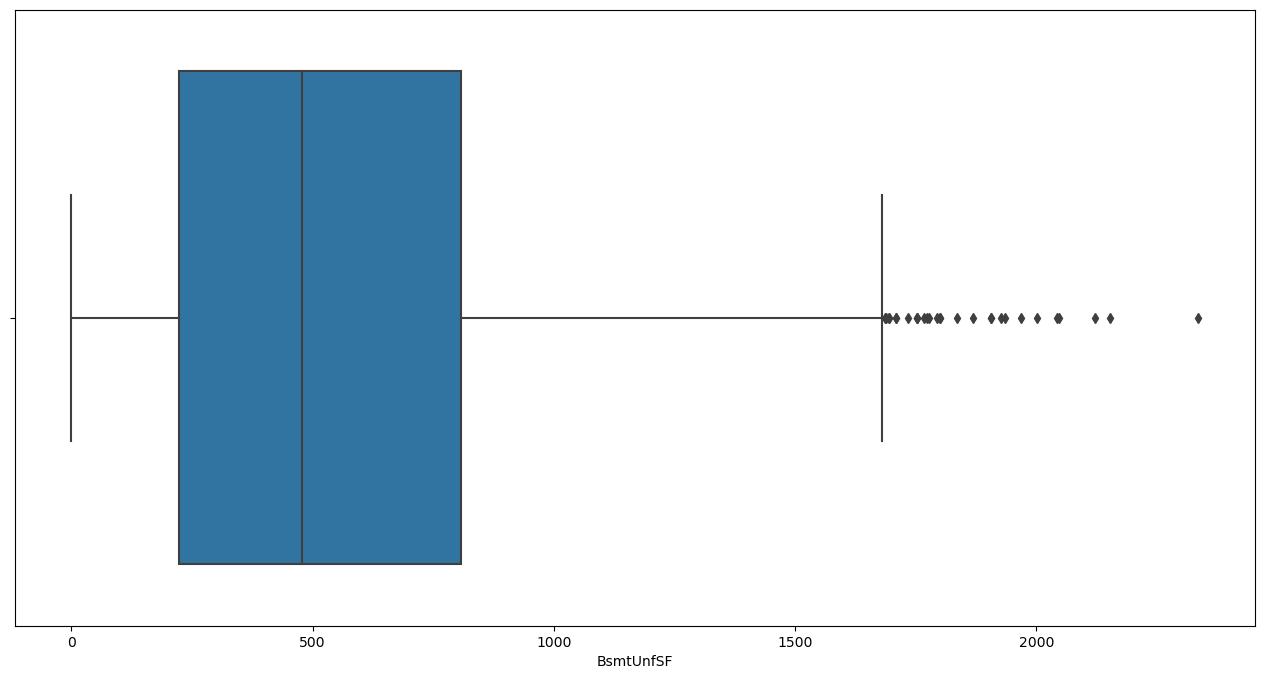

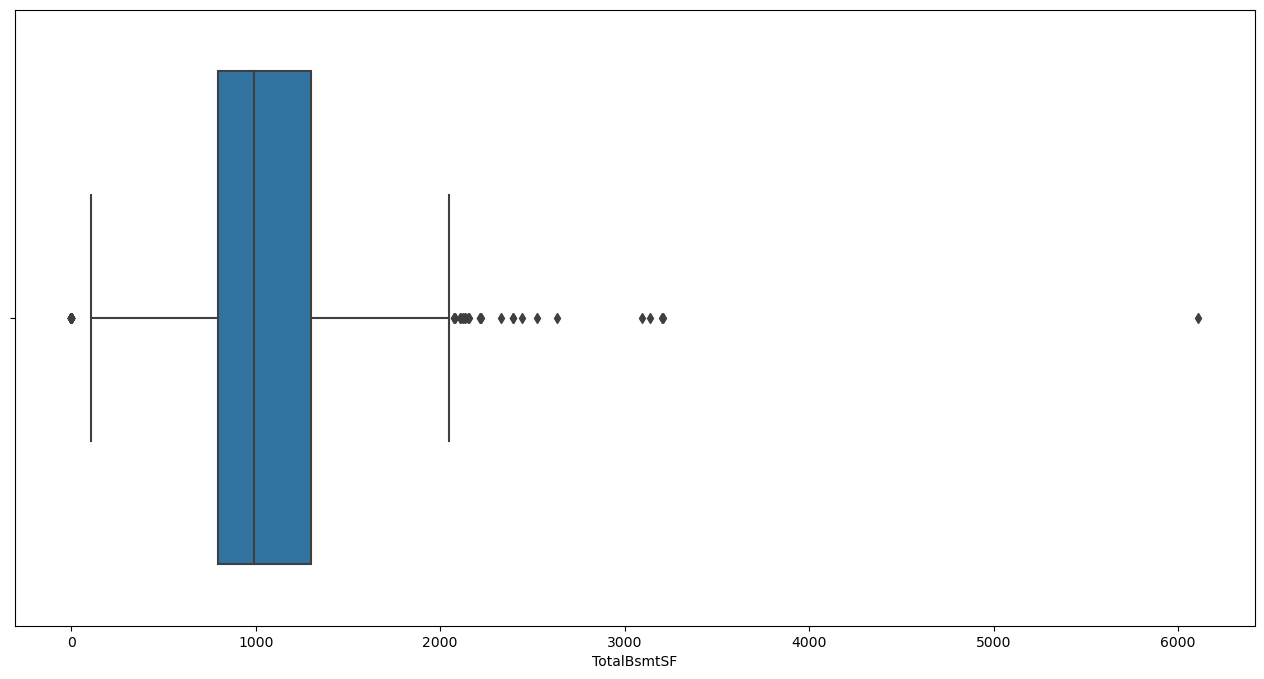

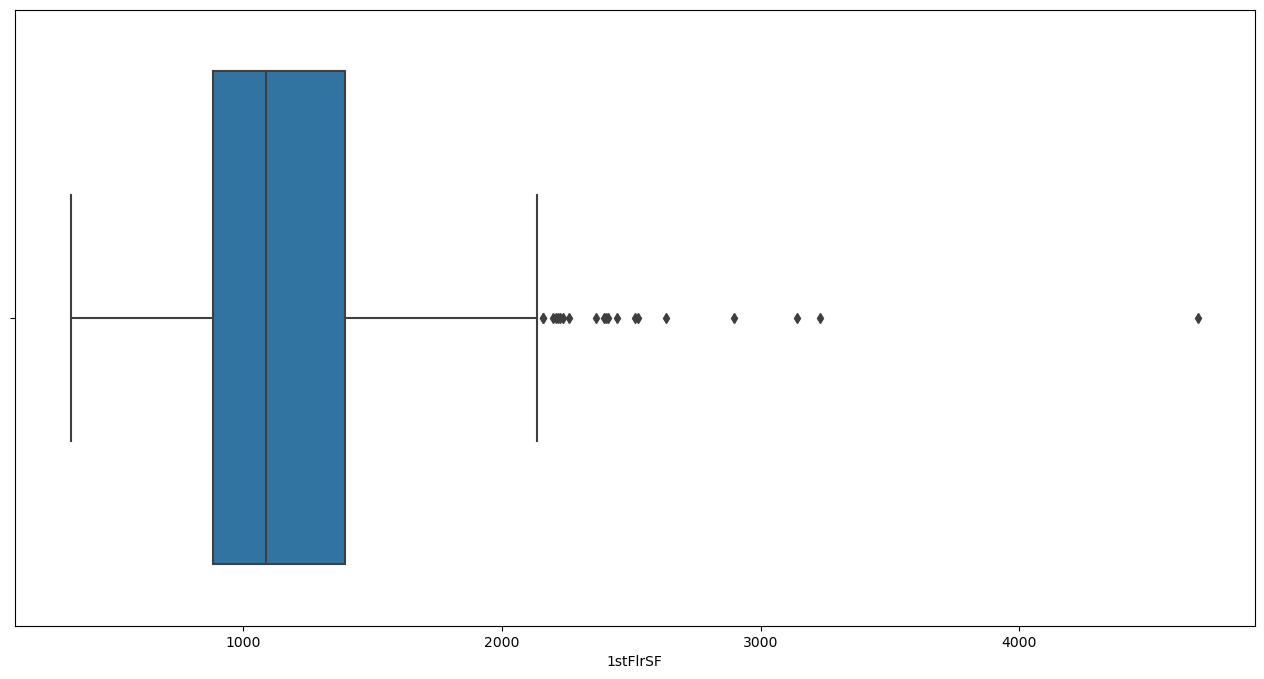

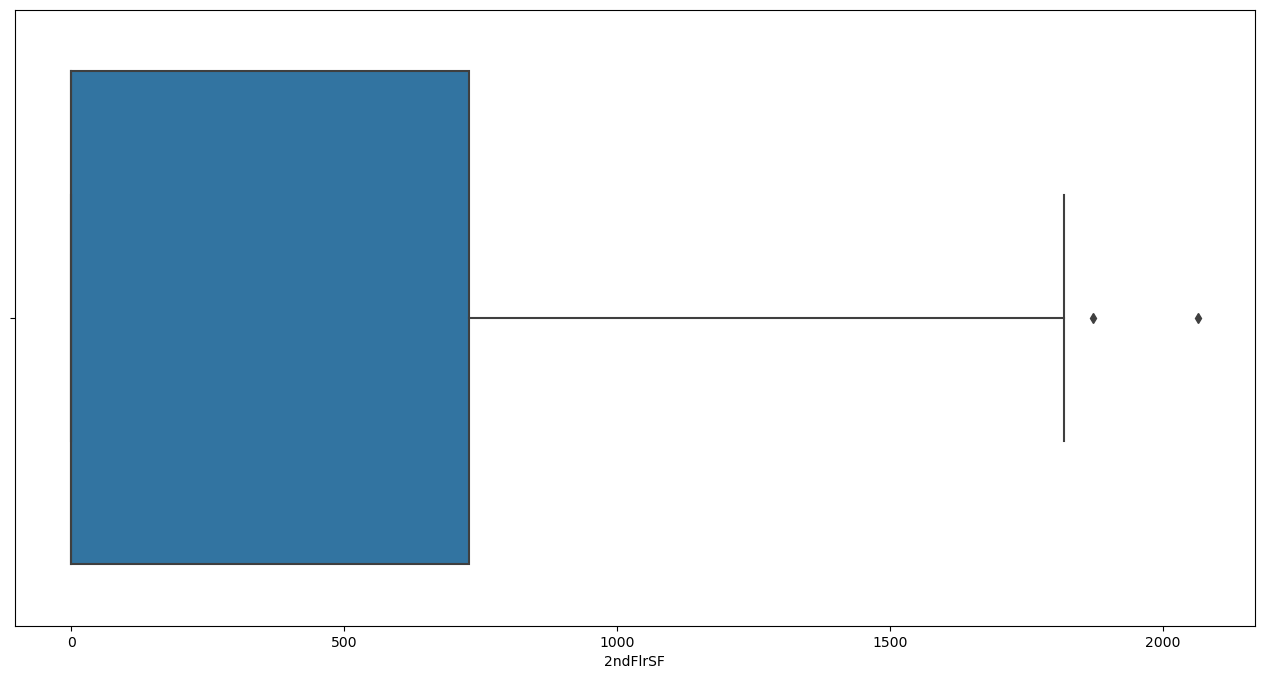

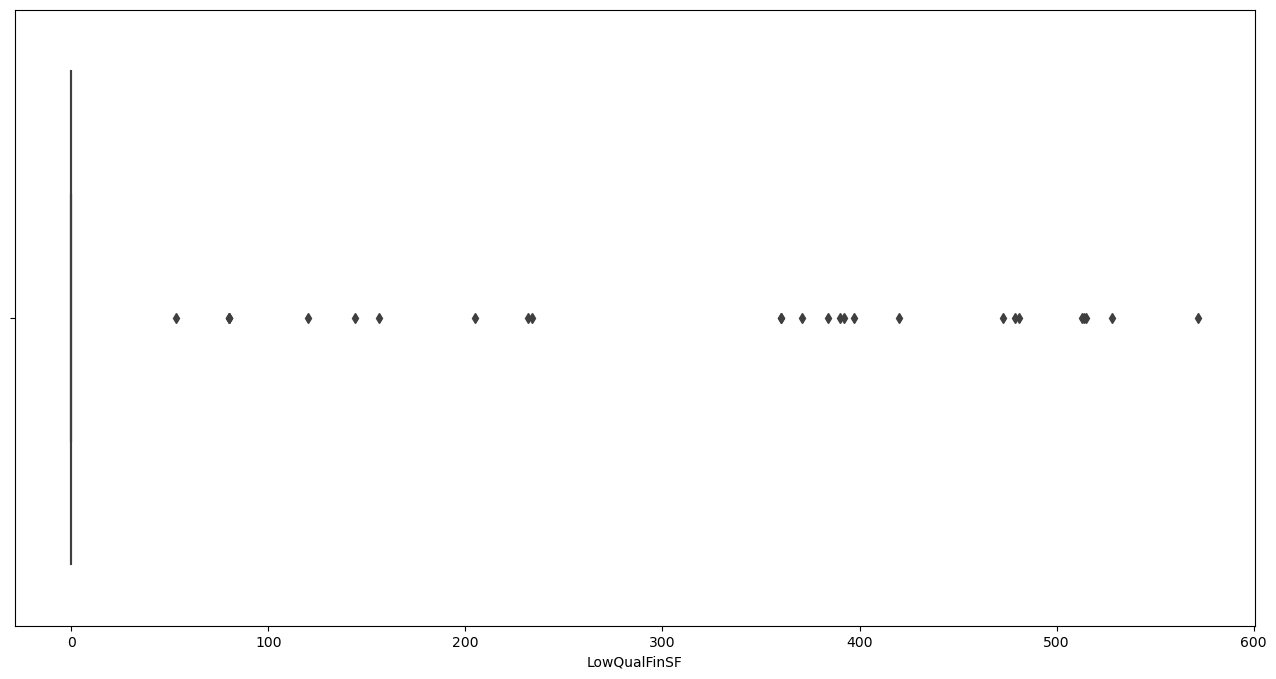

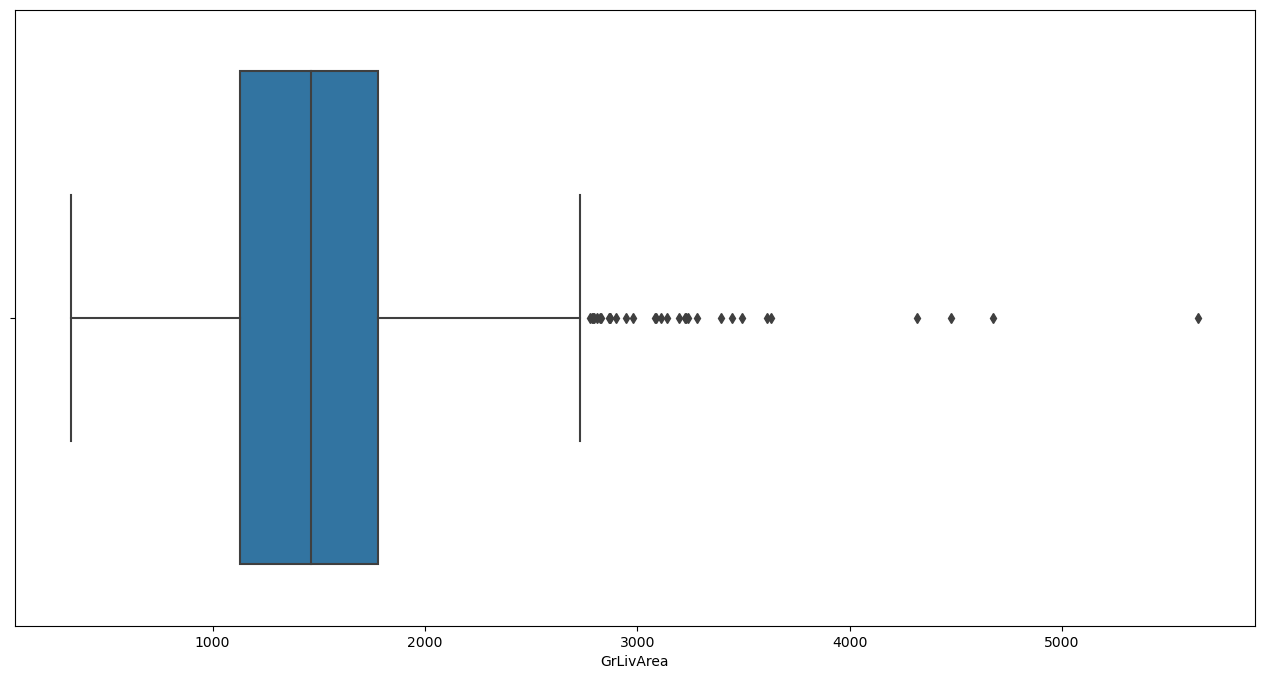

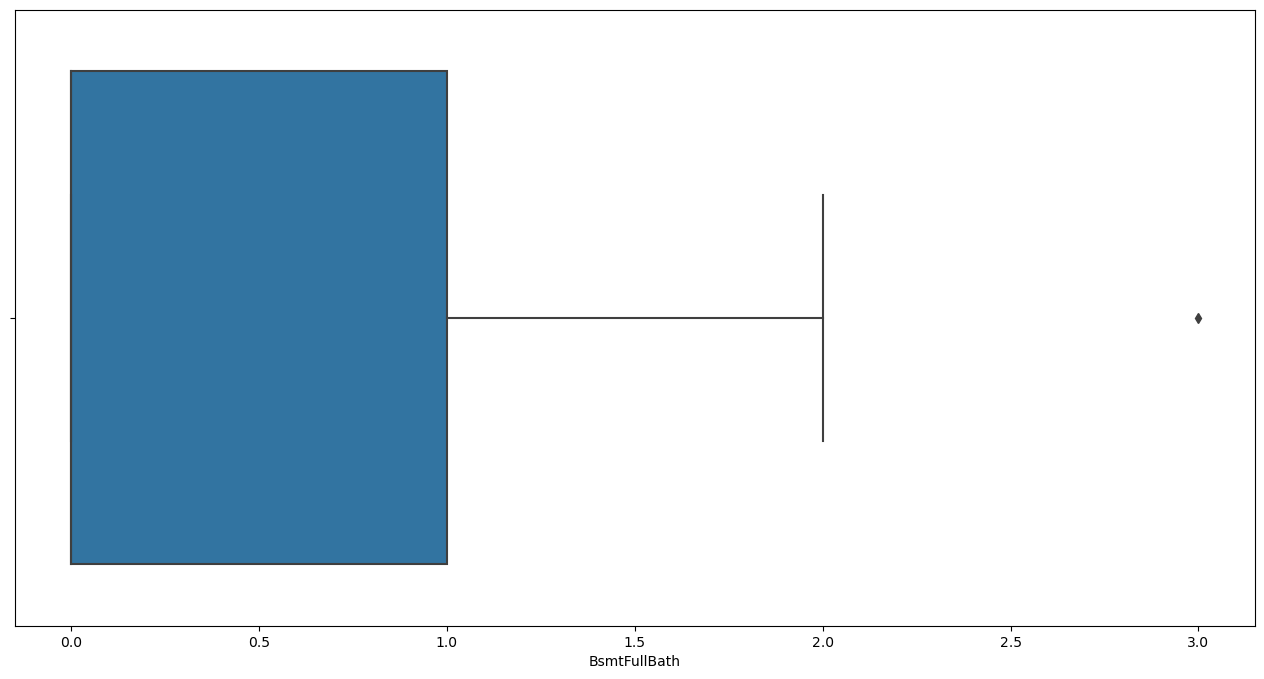

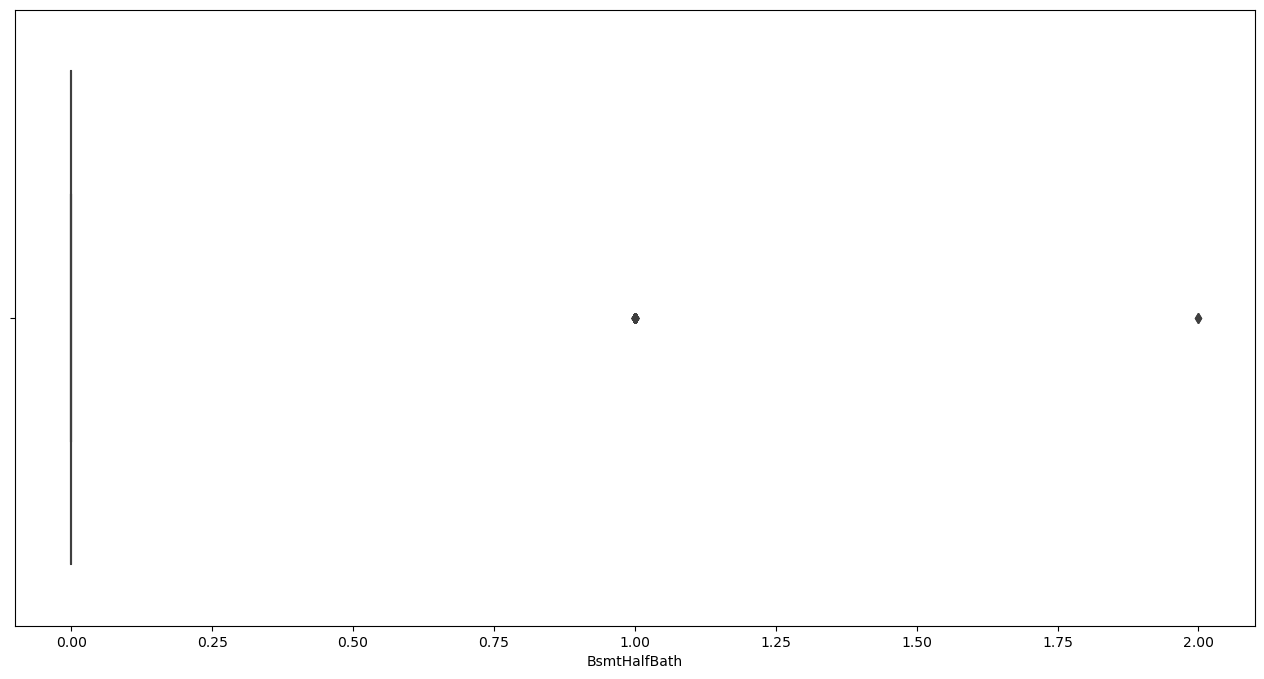

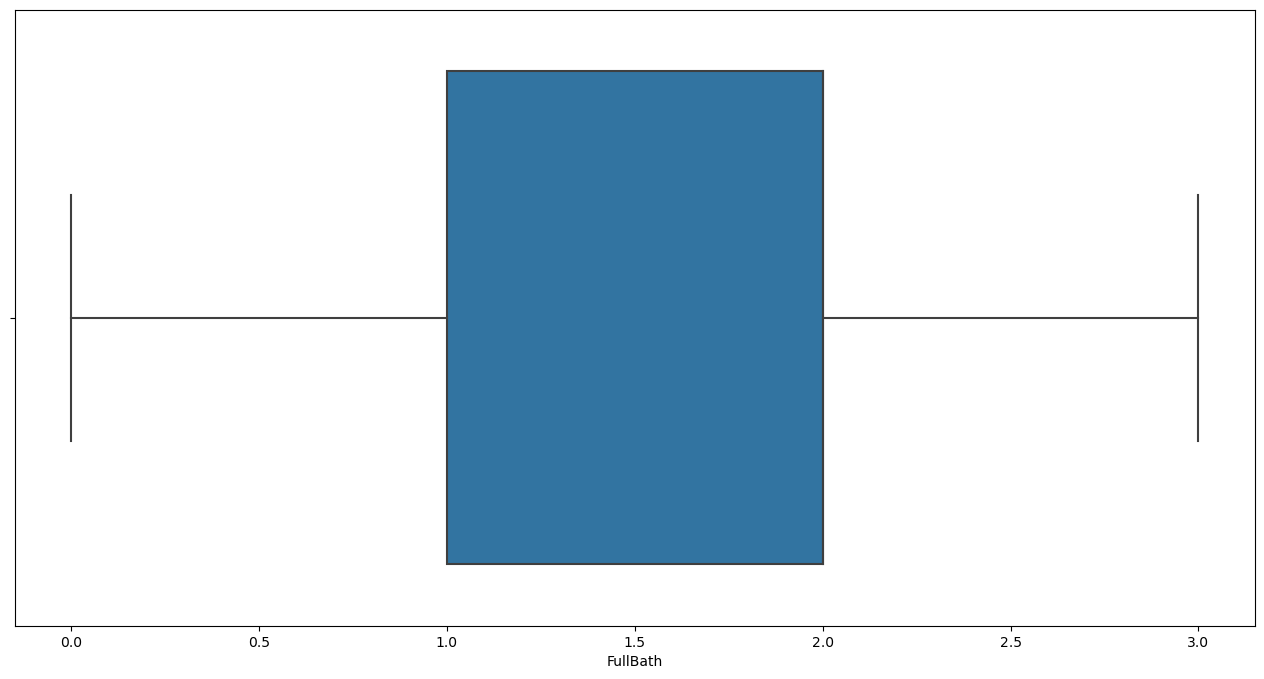

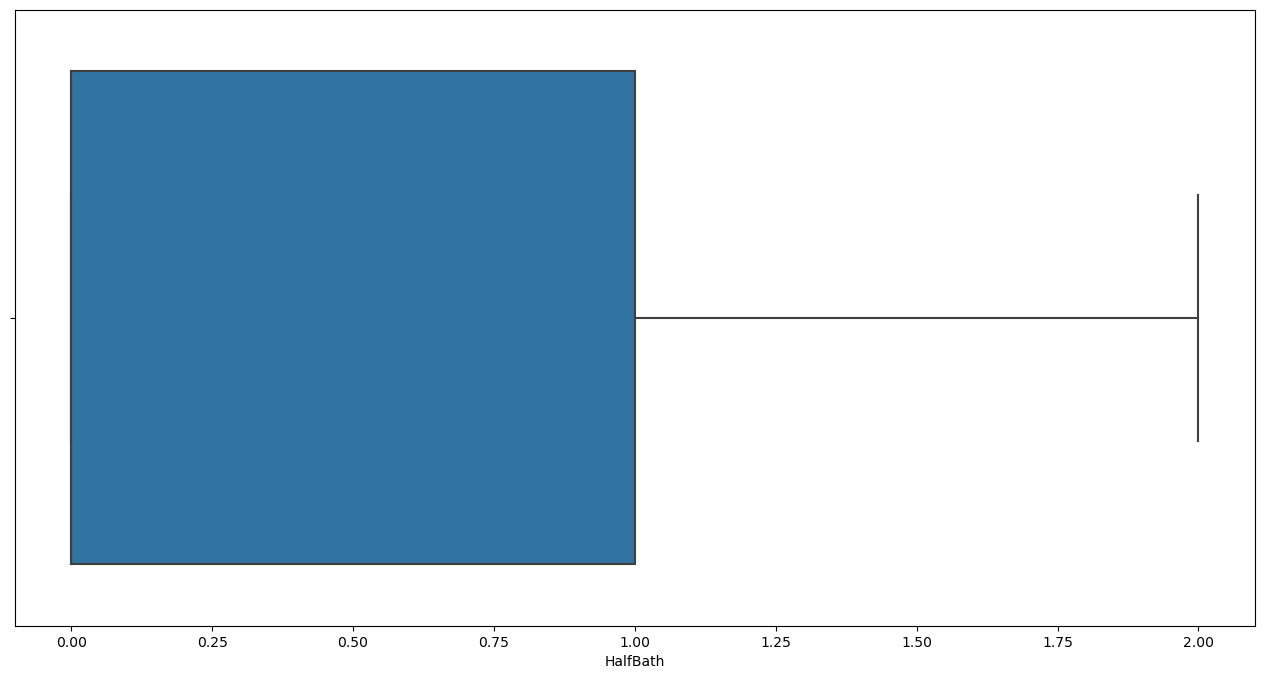

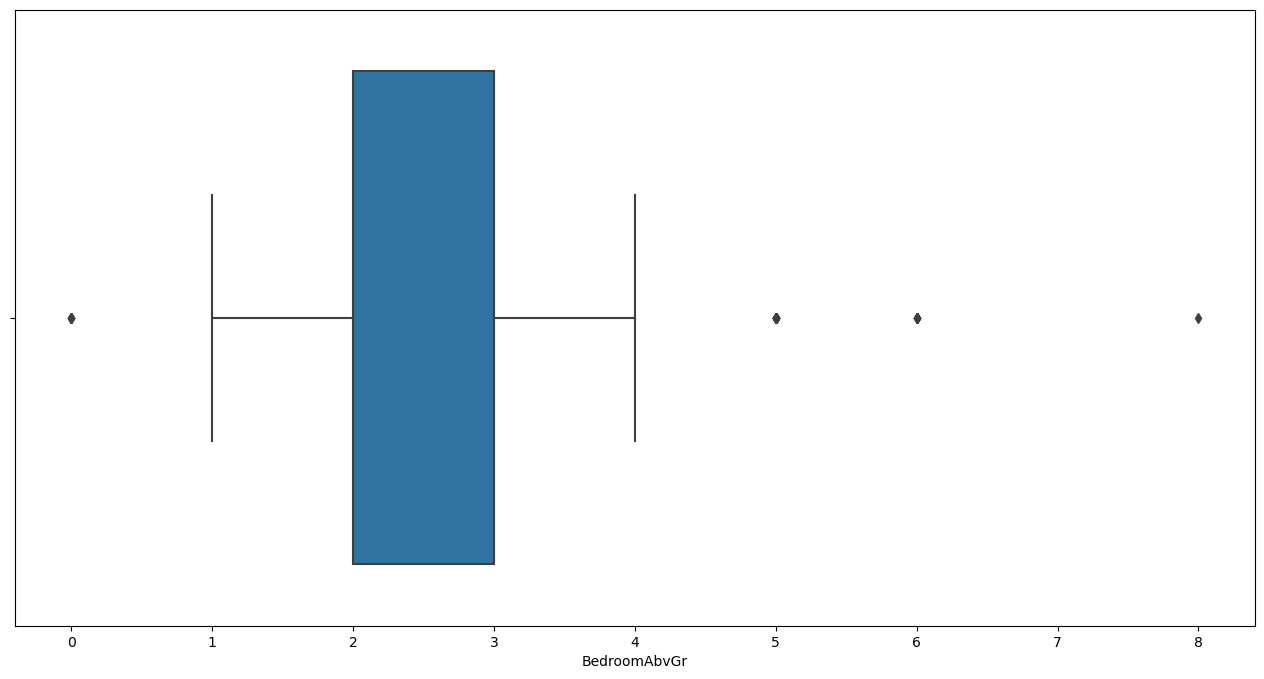

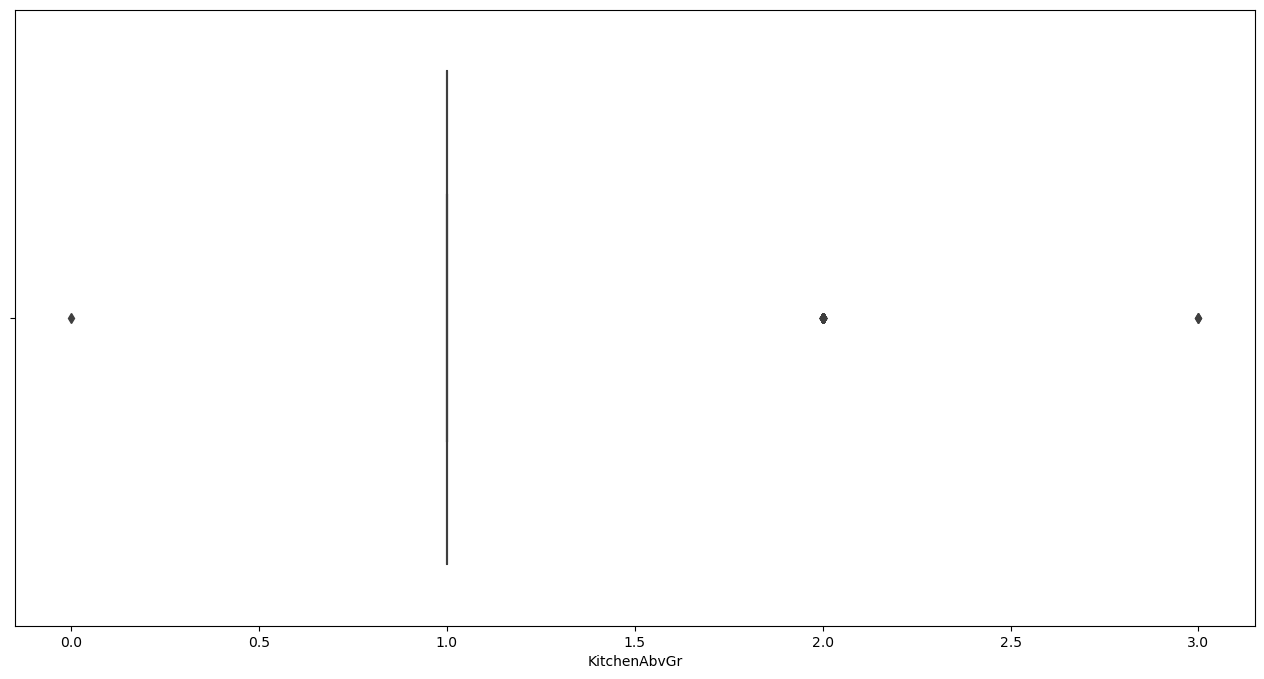

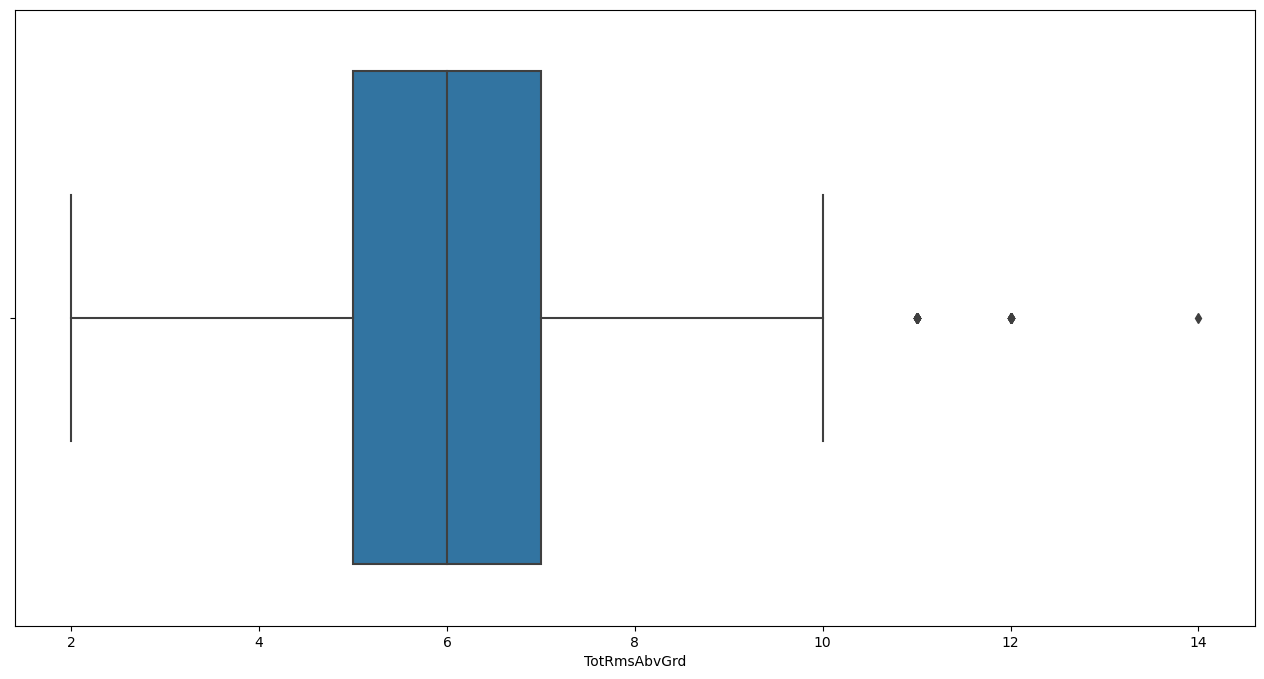

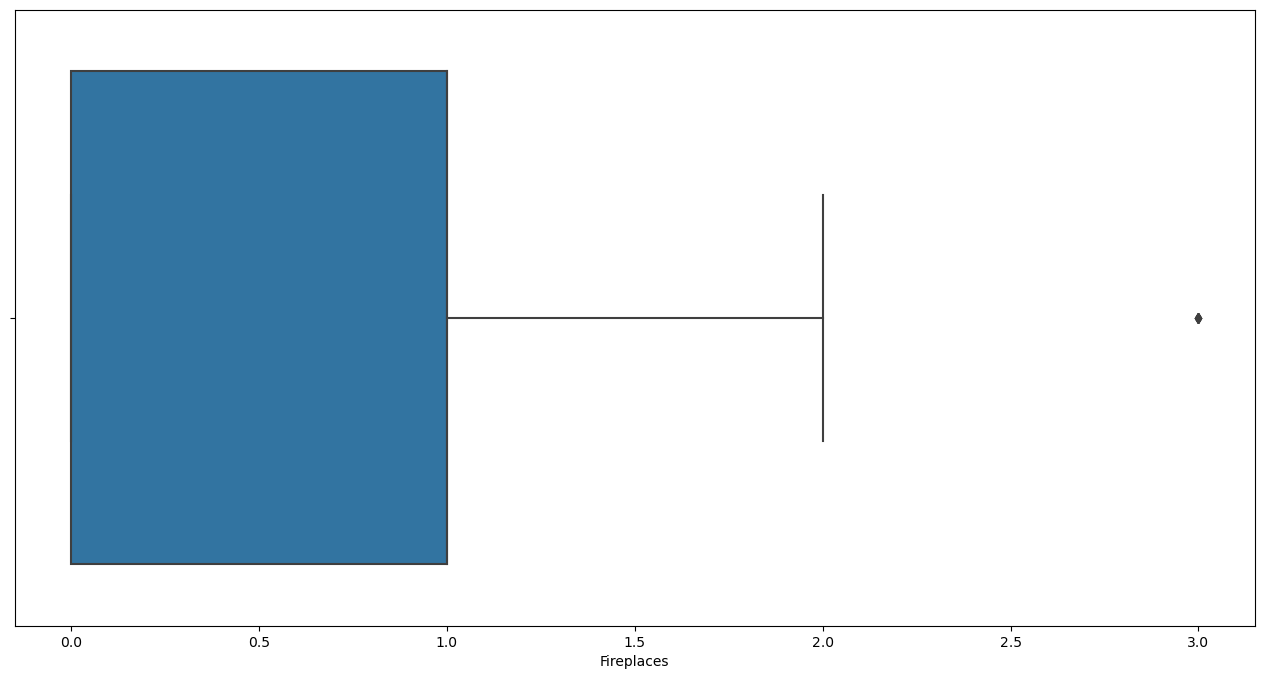

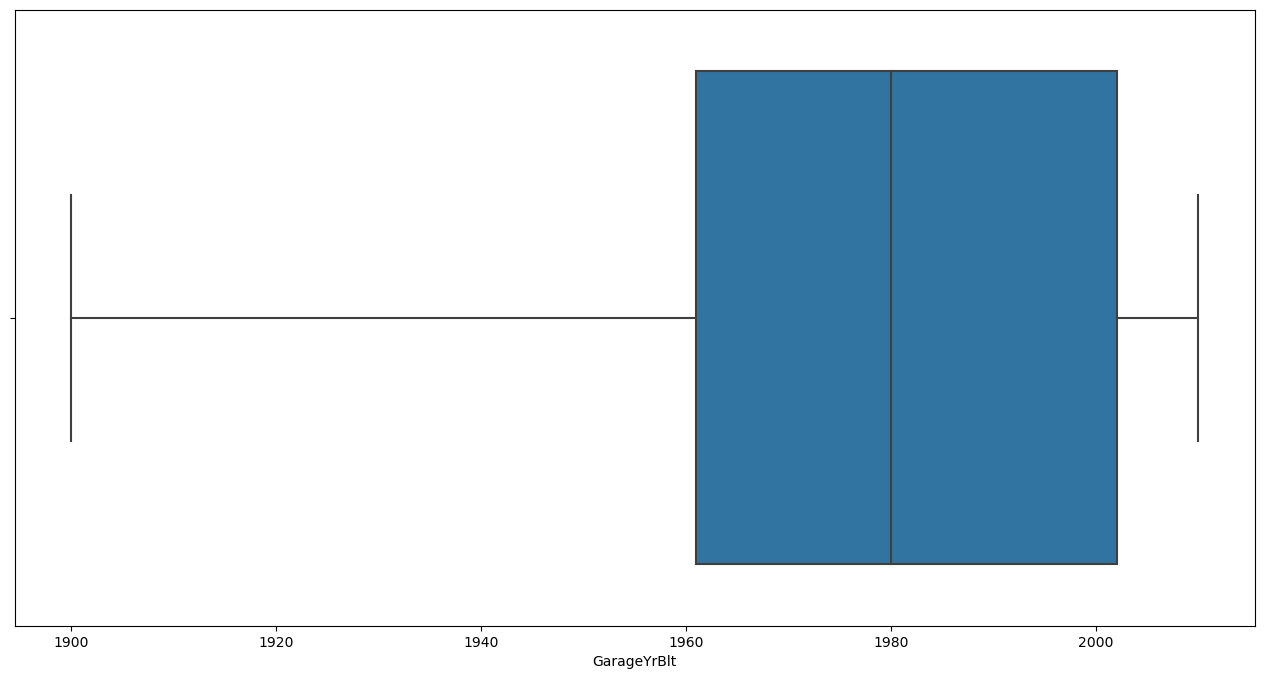

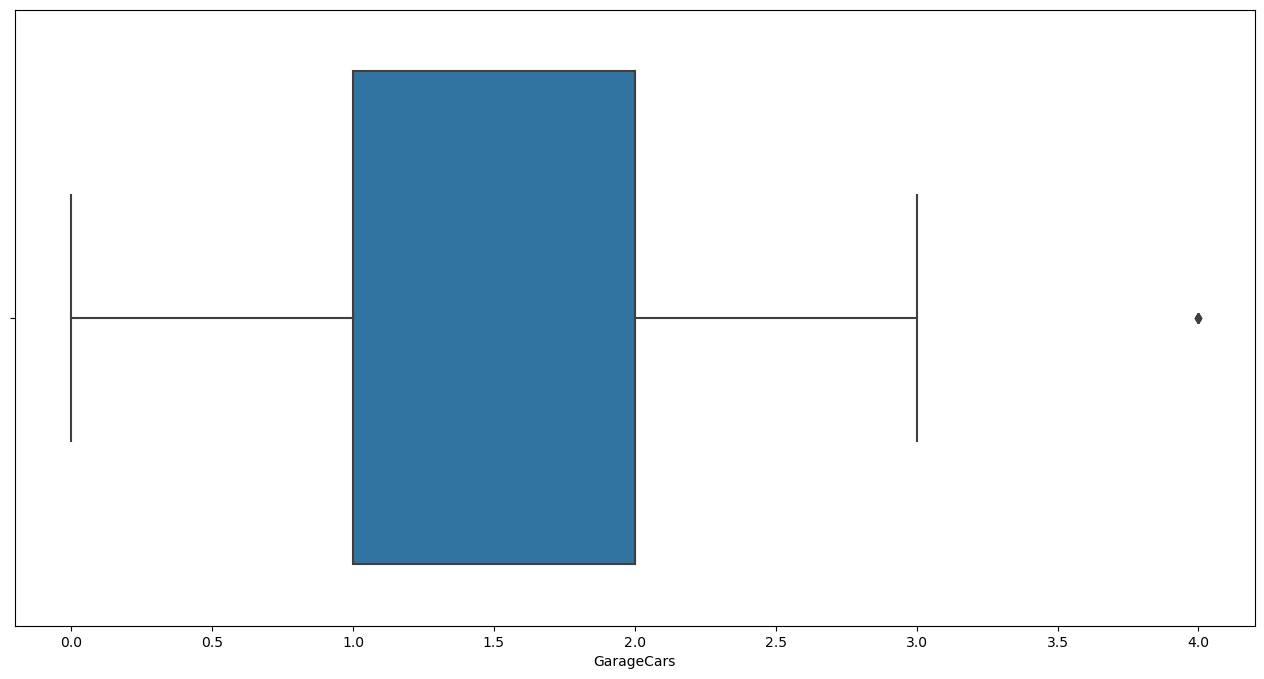

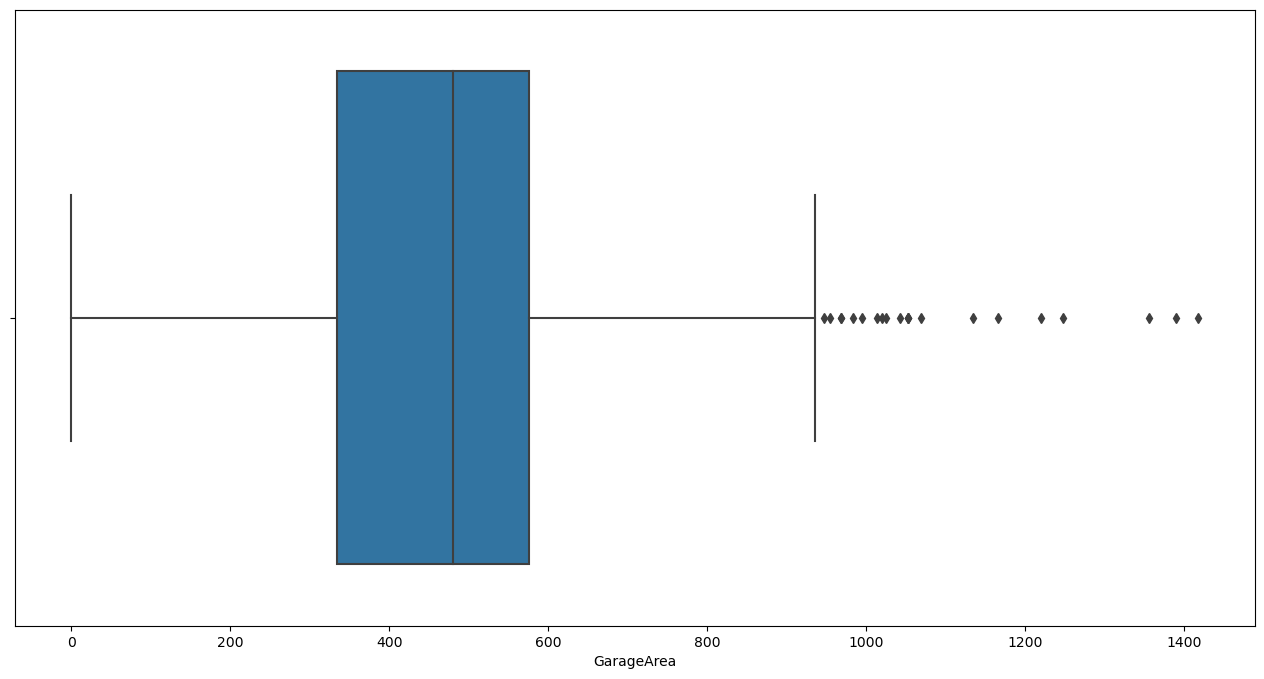

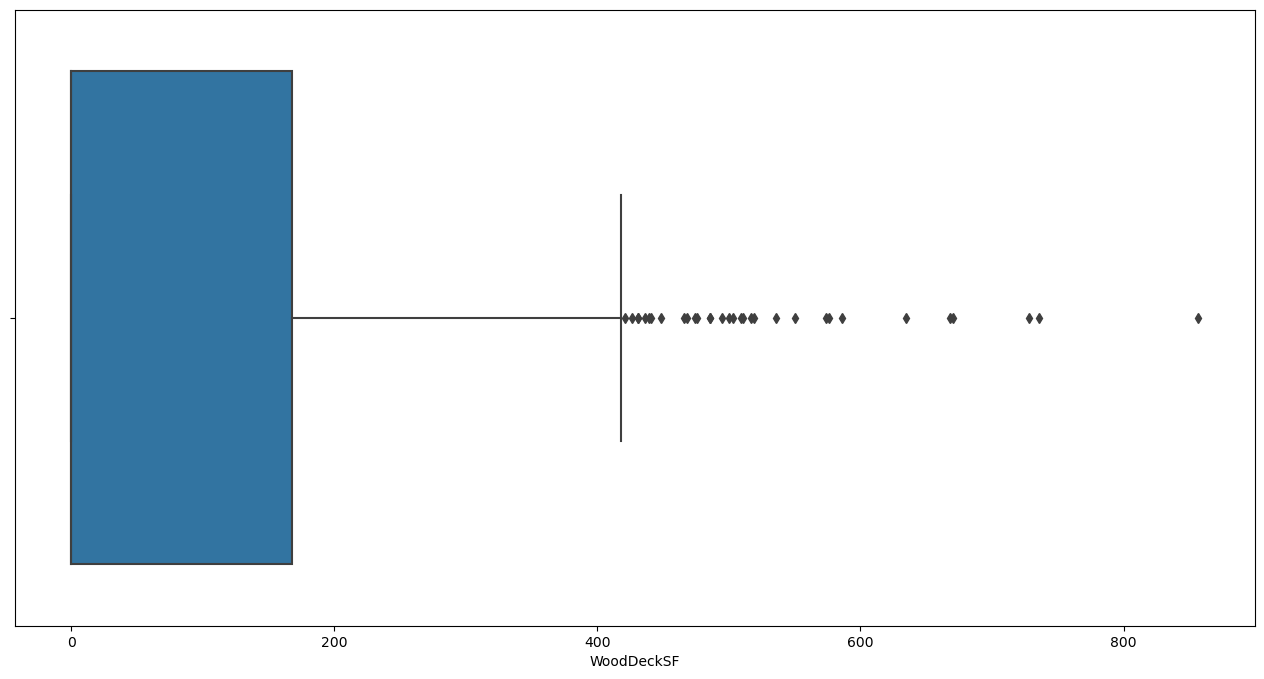

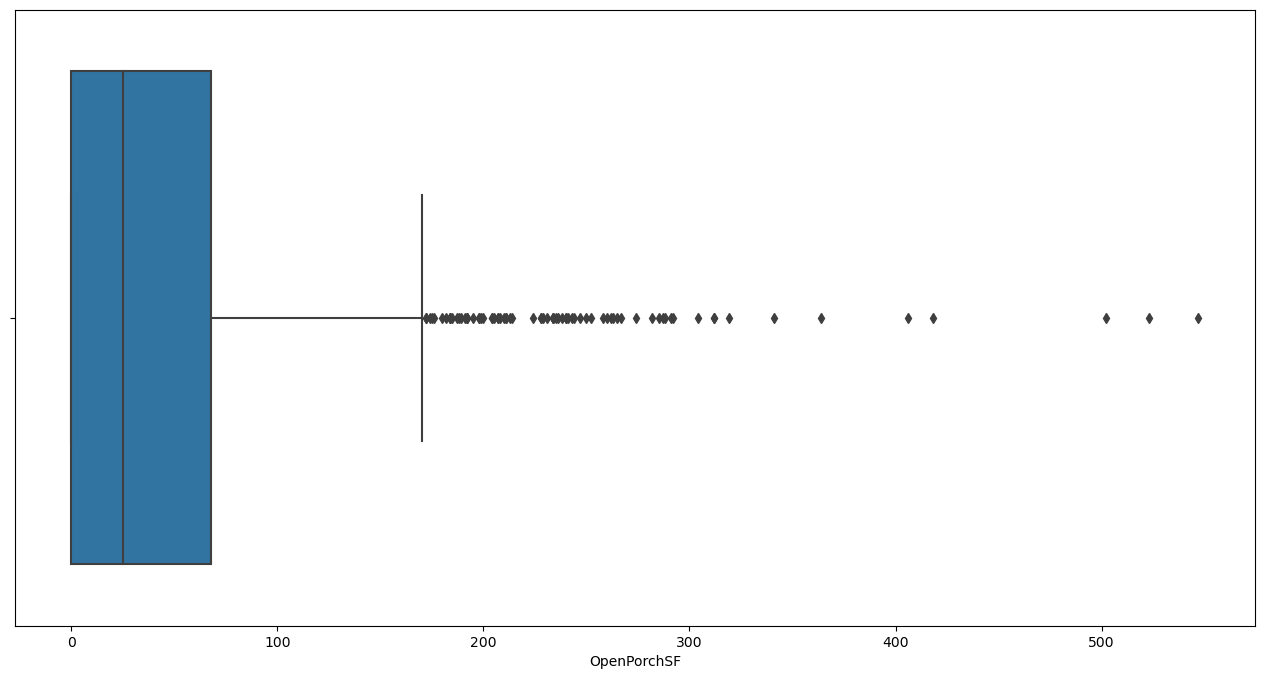

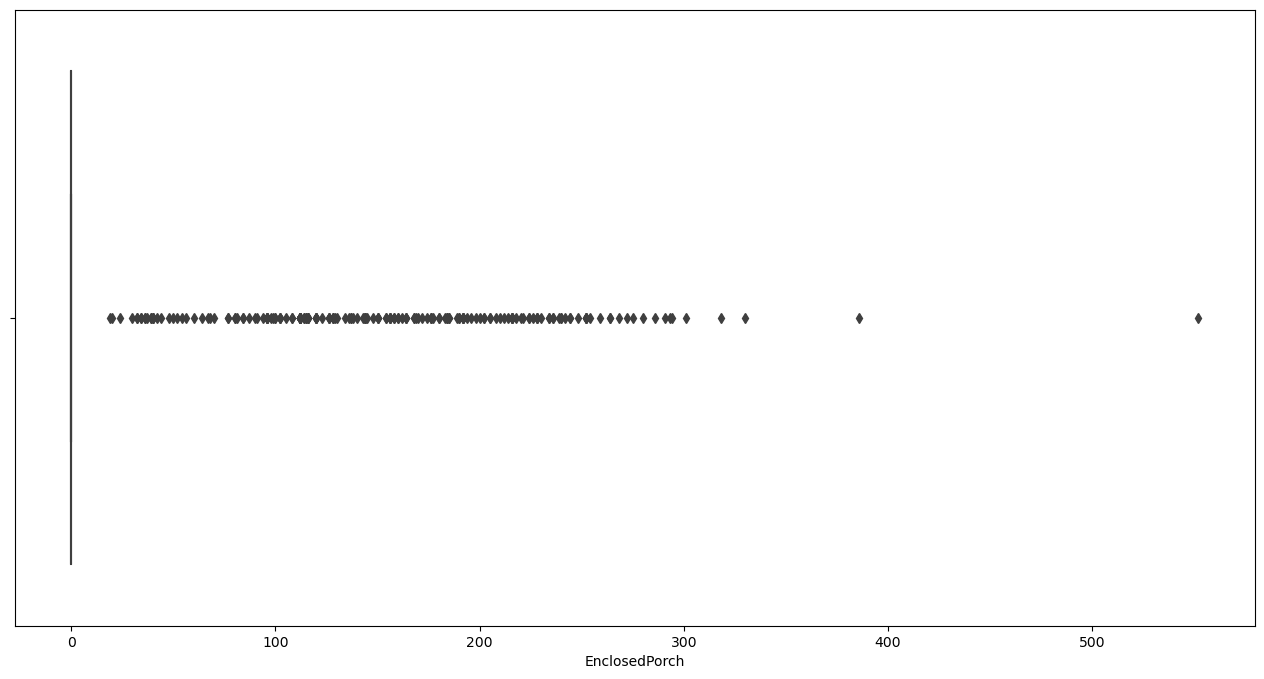

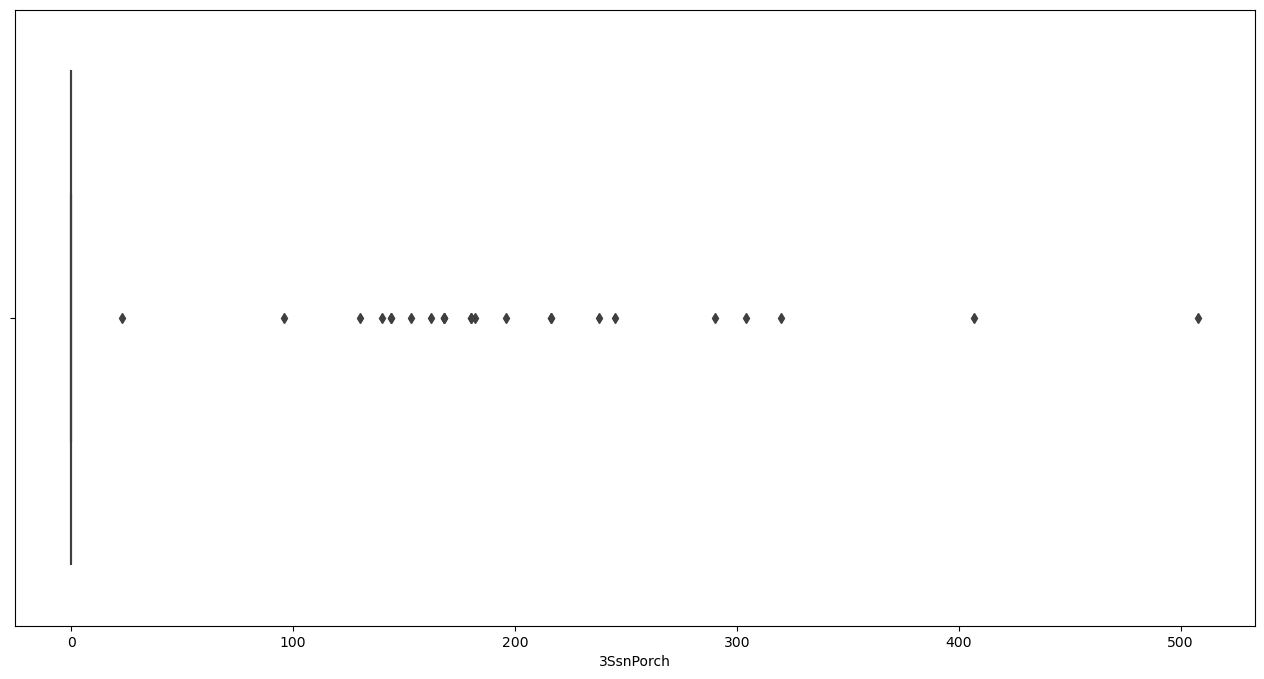

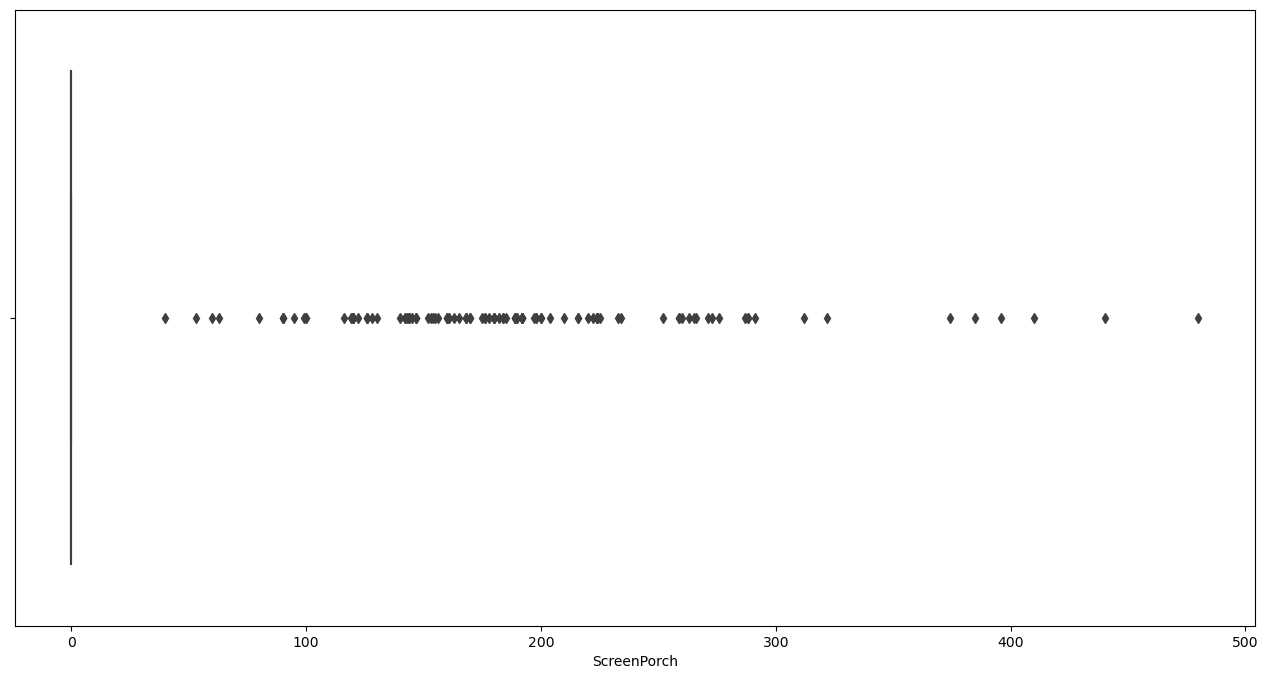

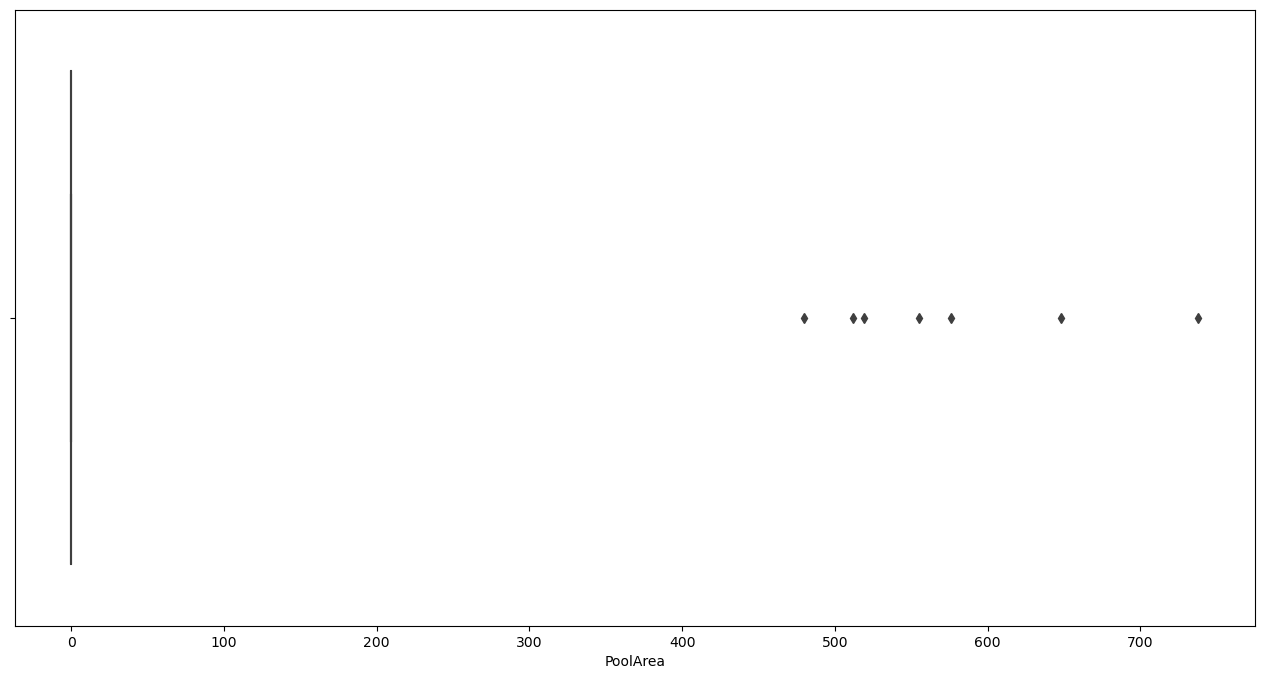

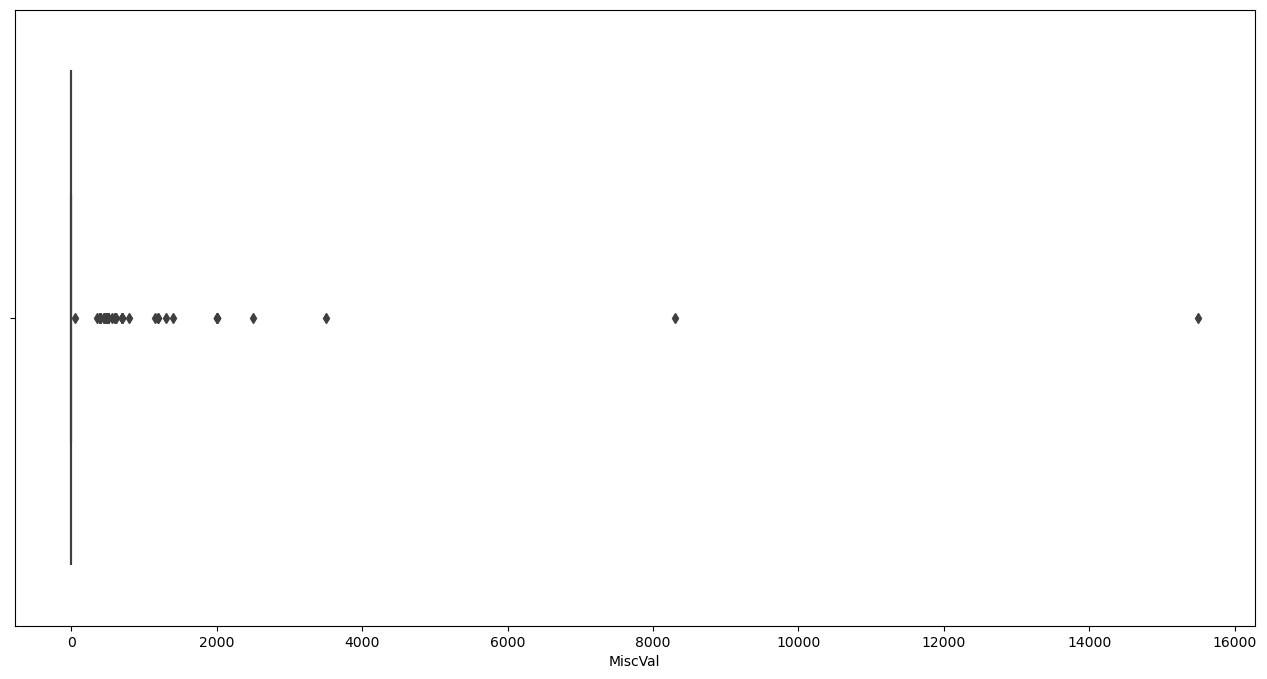

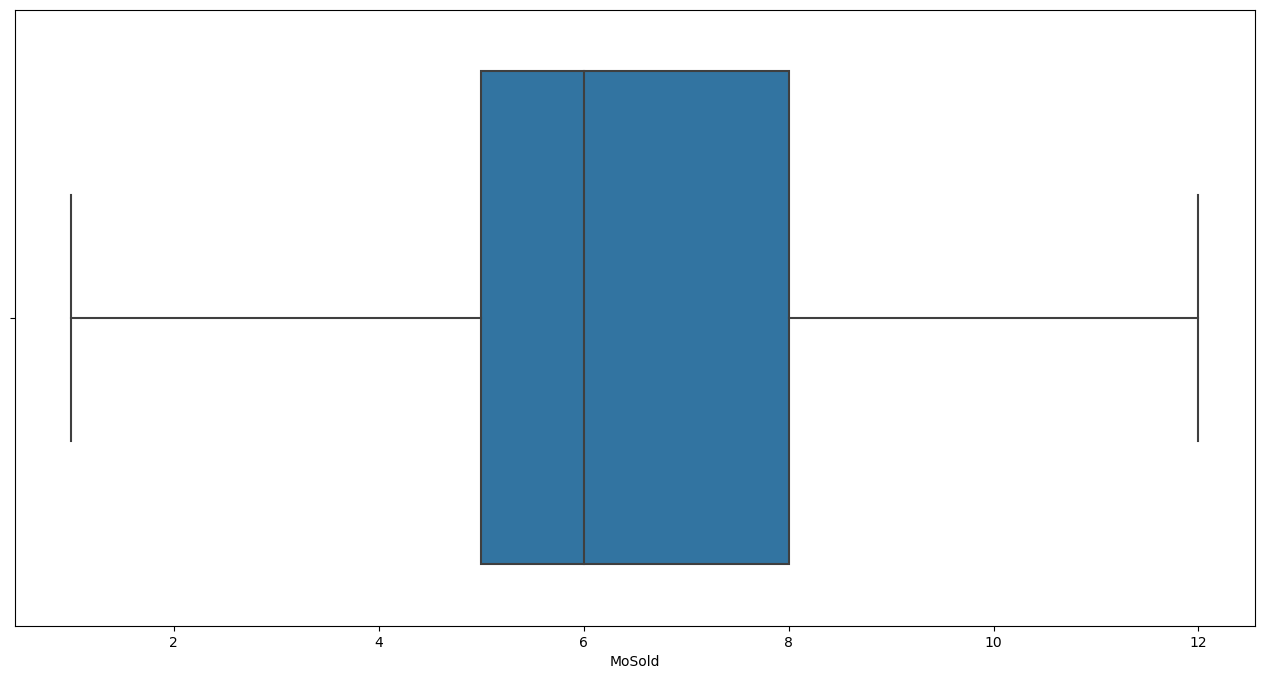

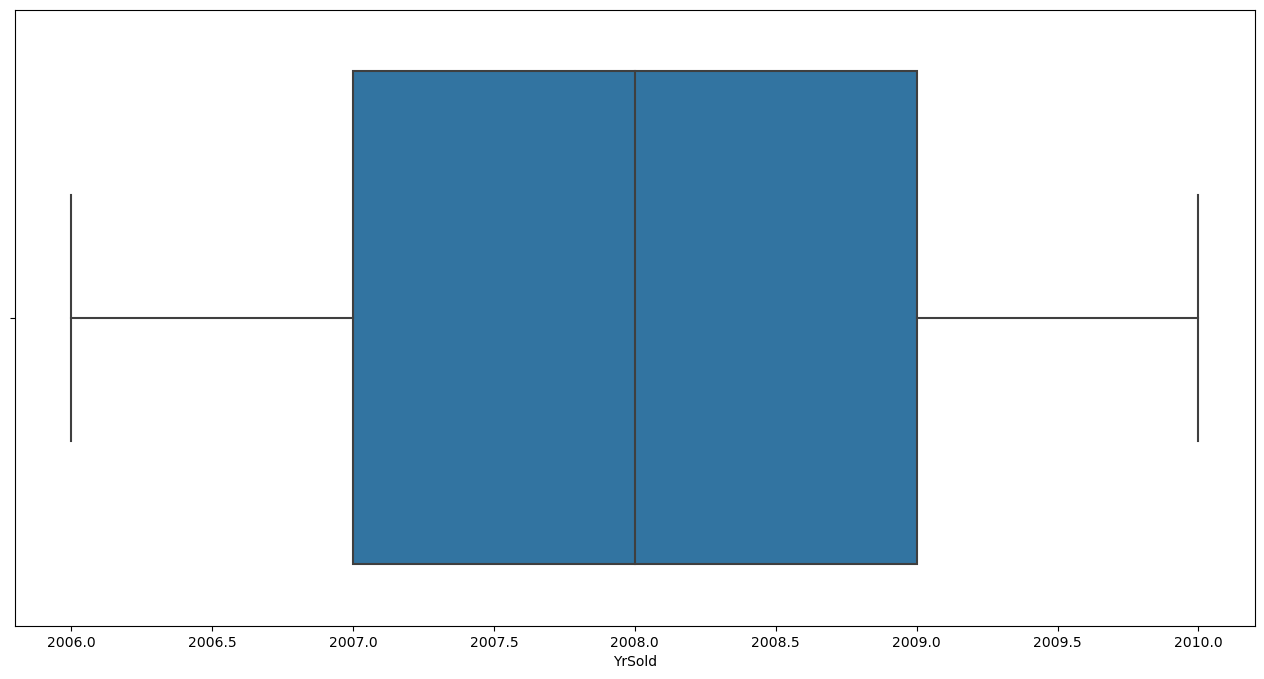

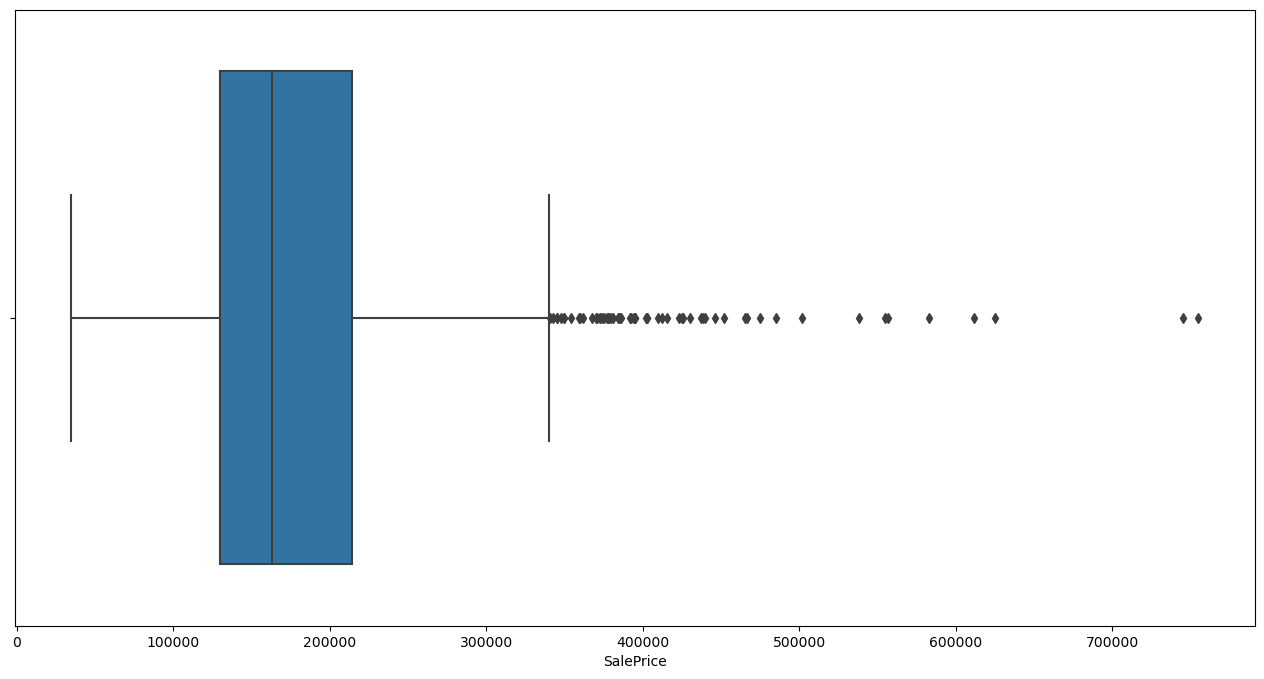

In [6]:
# Identify outliers in the train dataset using boxplots
for column in numerical_features.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=train_df, x=column)
    plt.show()


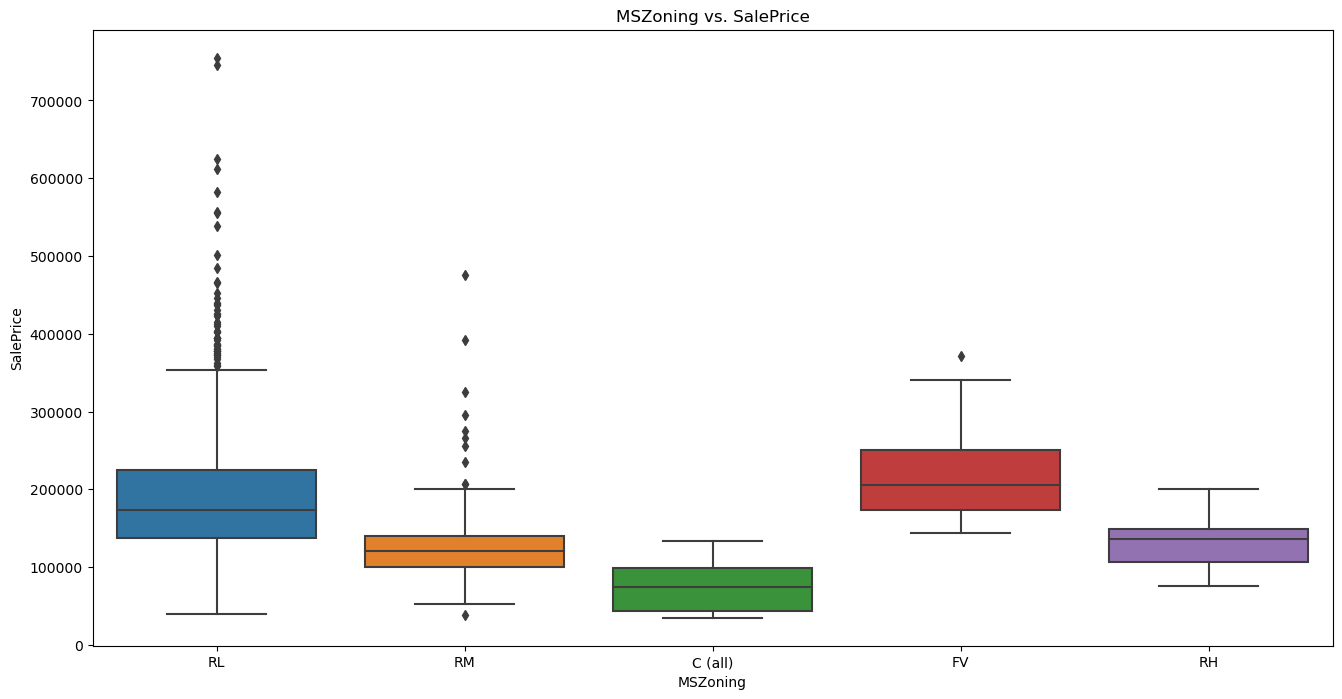

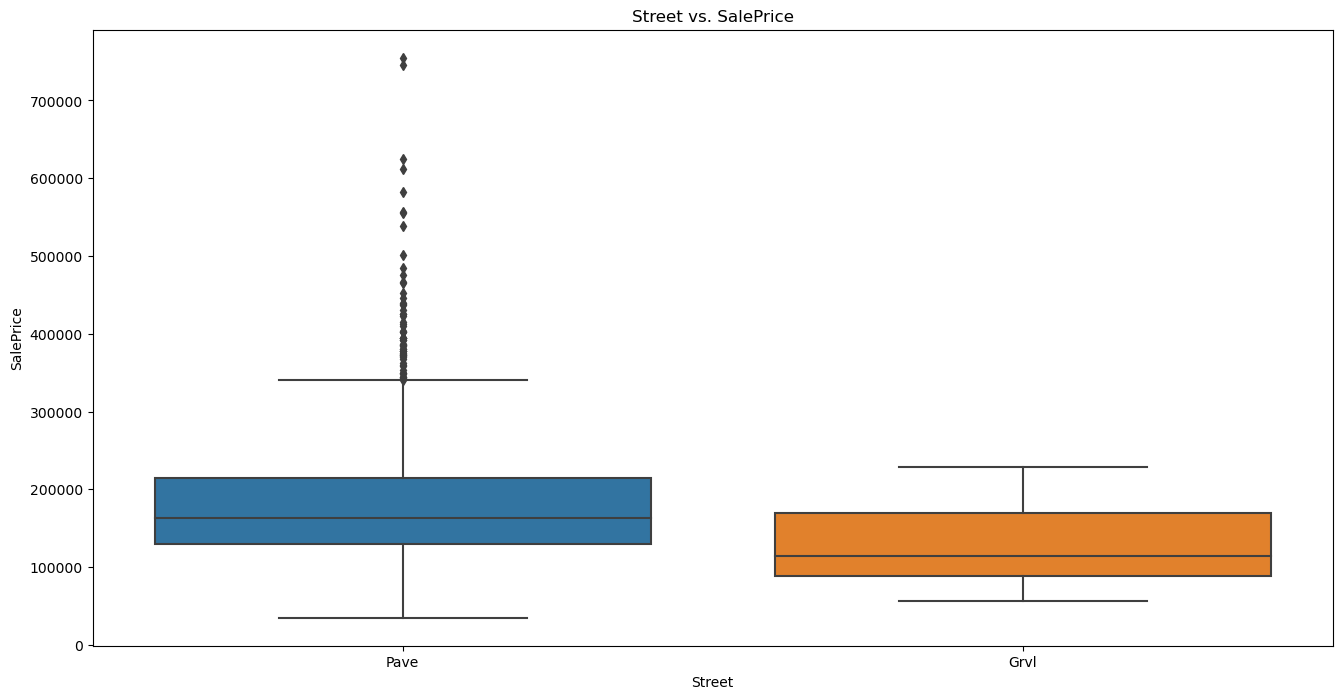

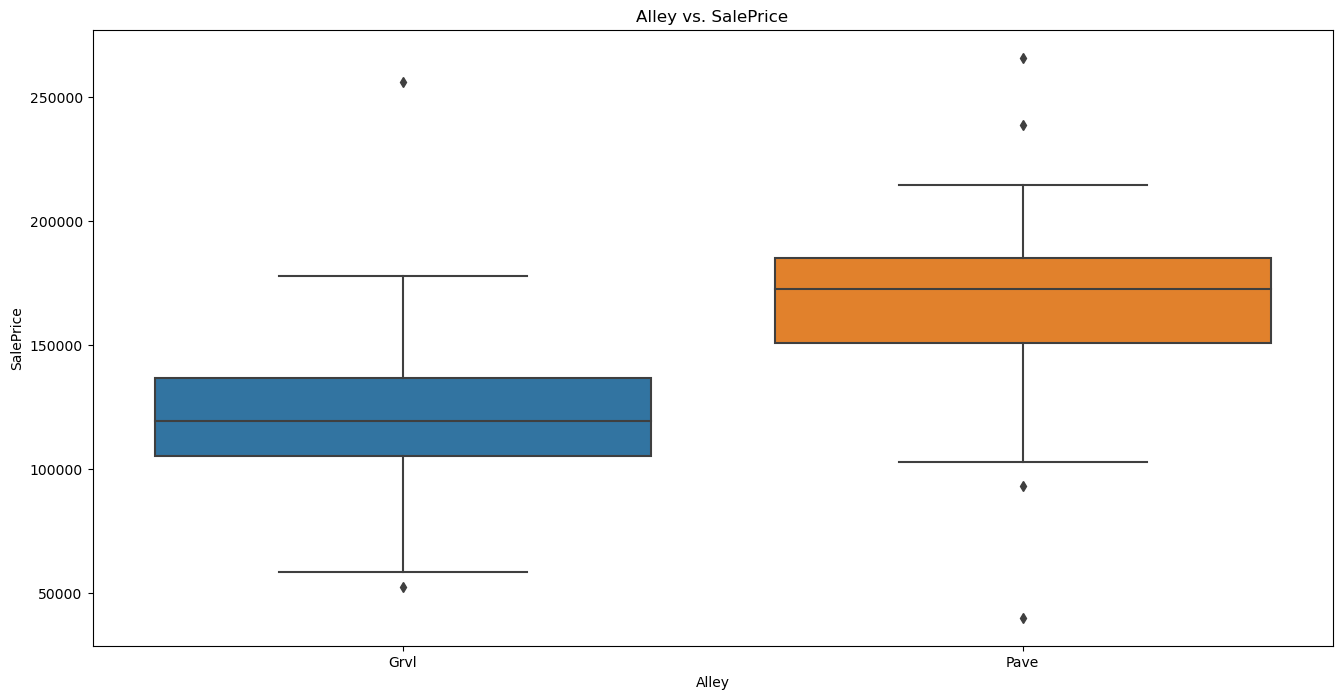

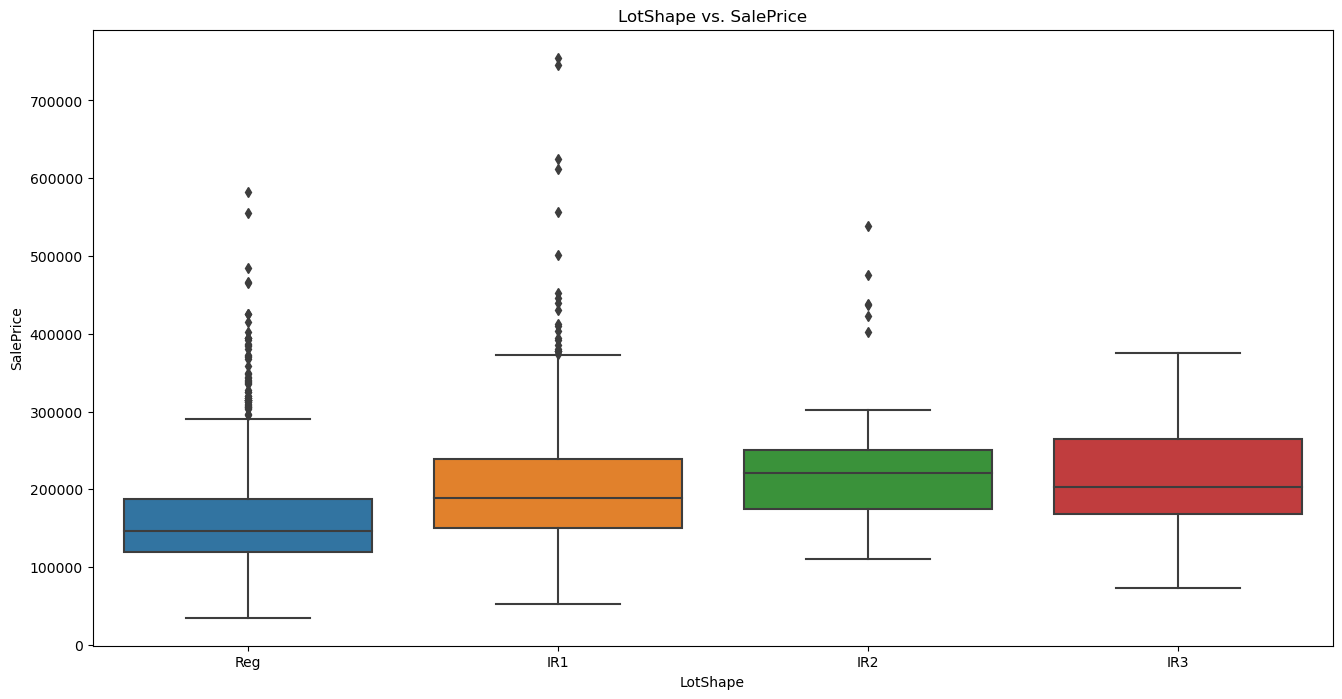

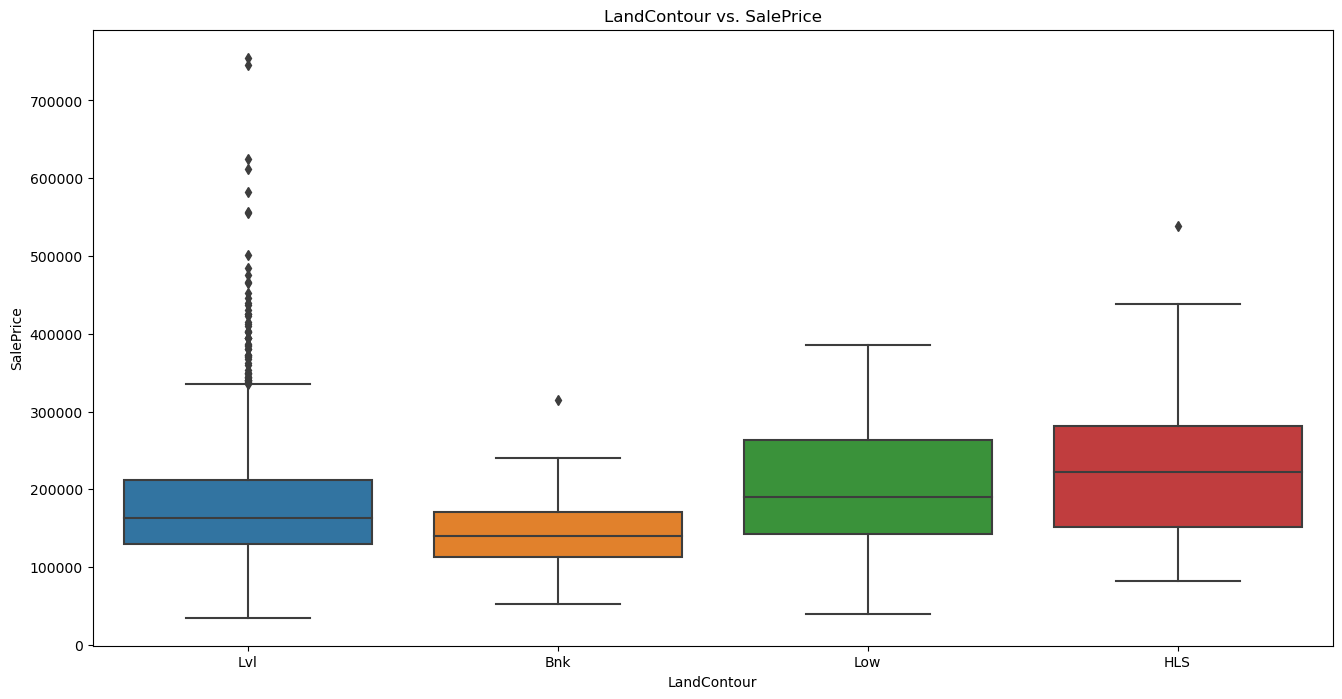

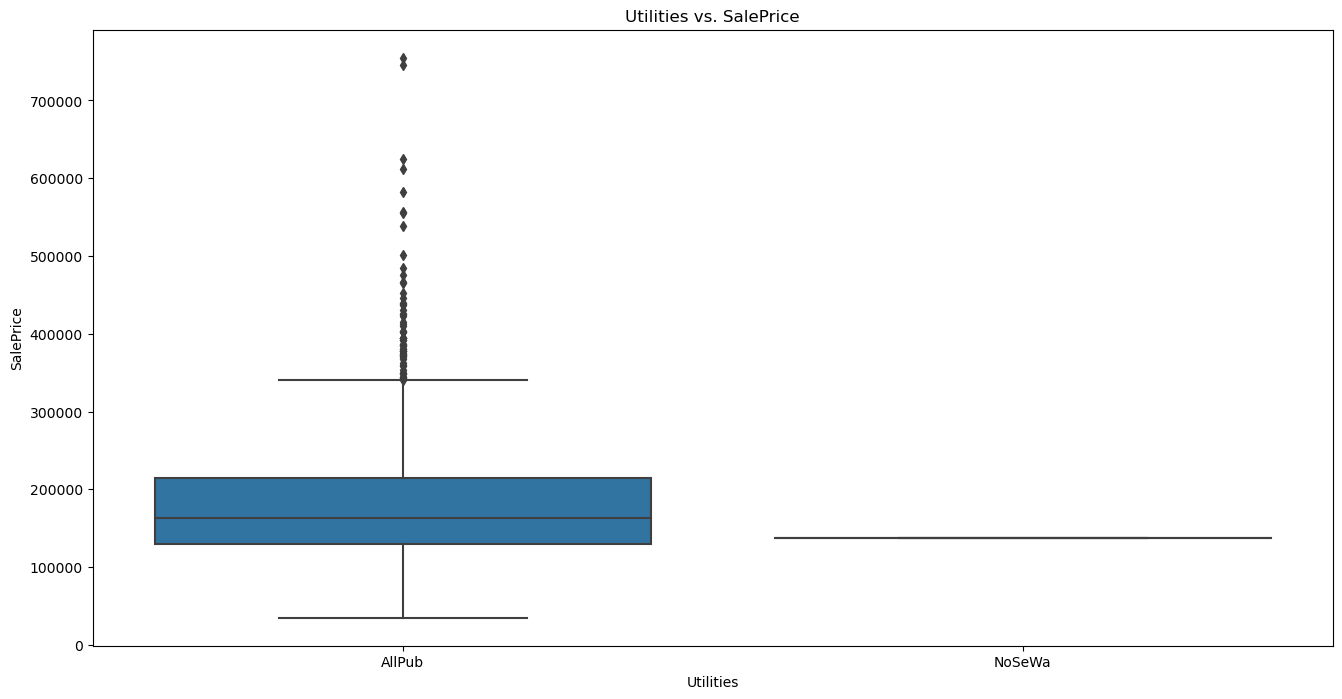

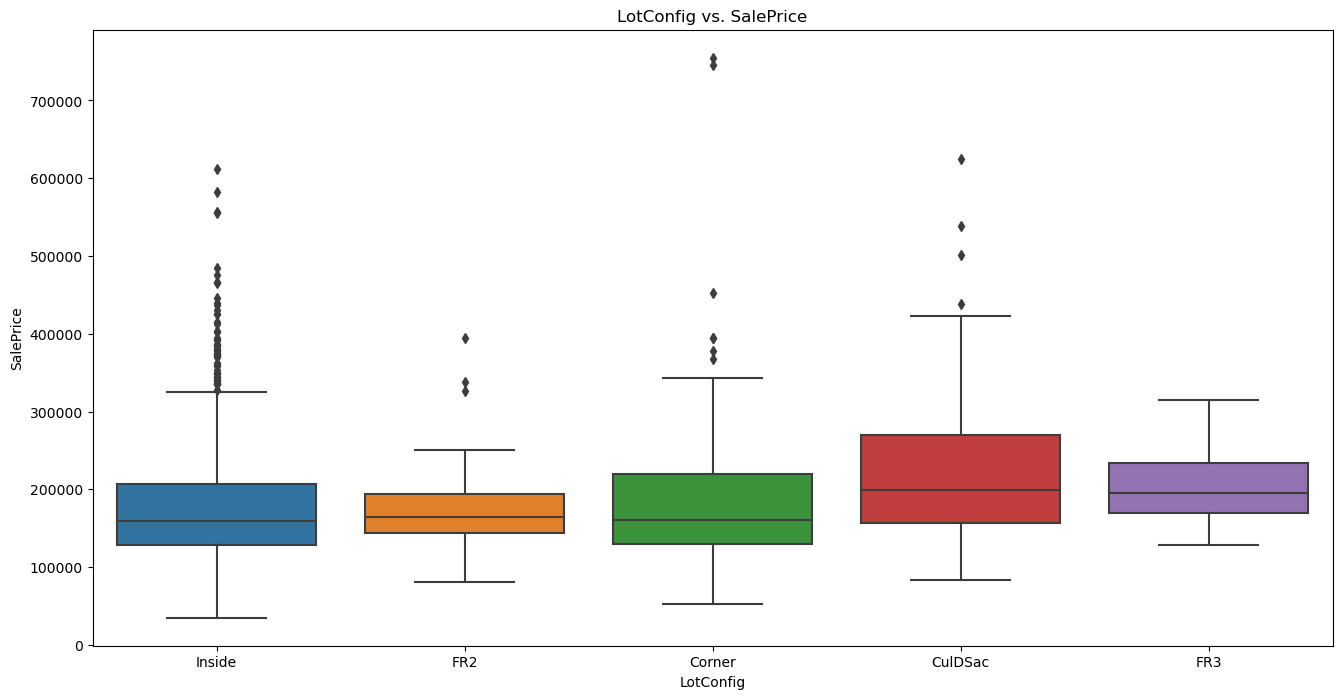

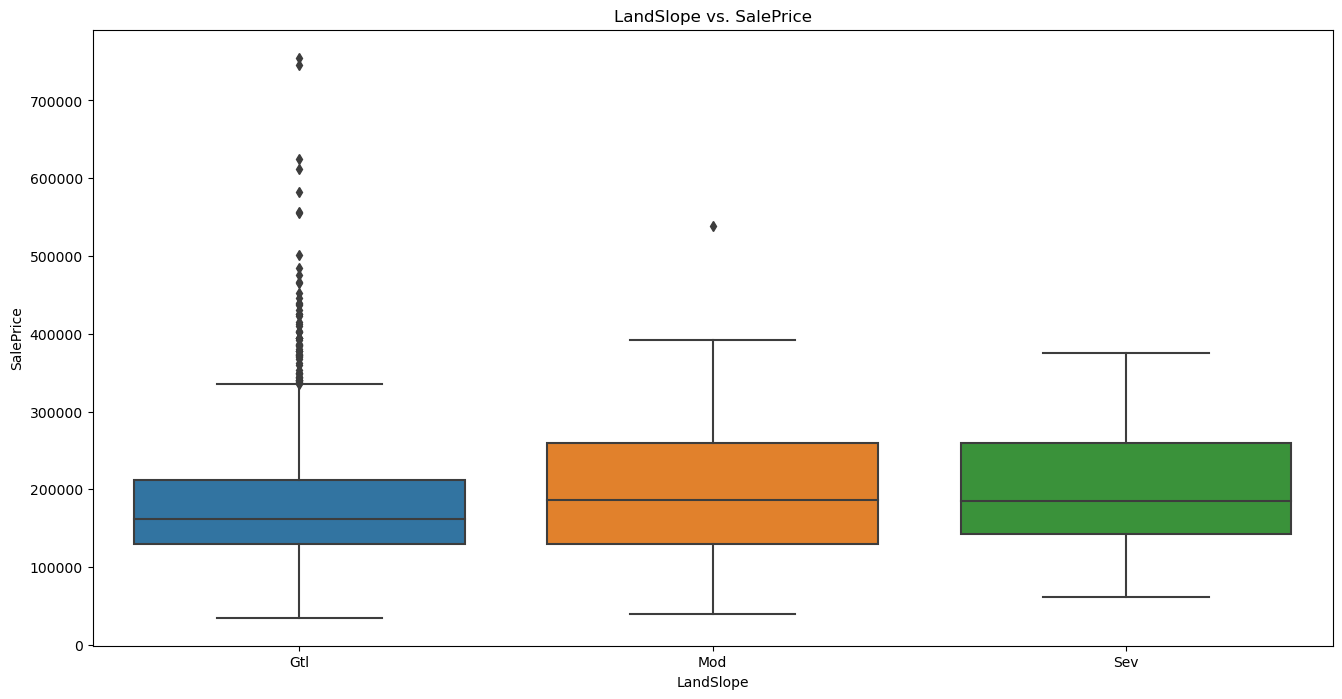

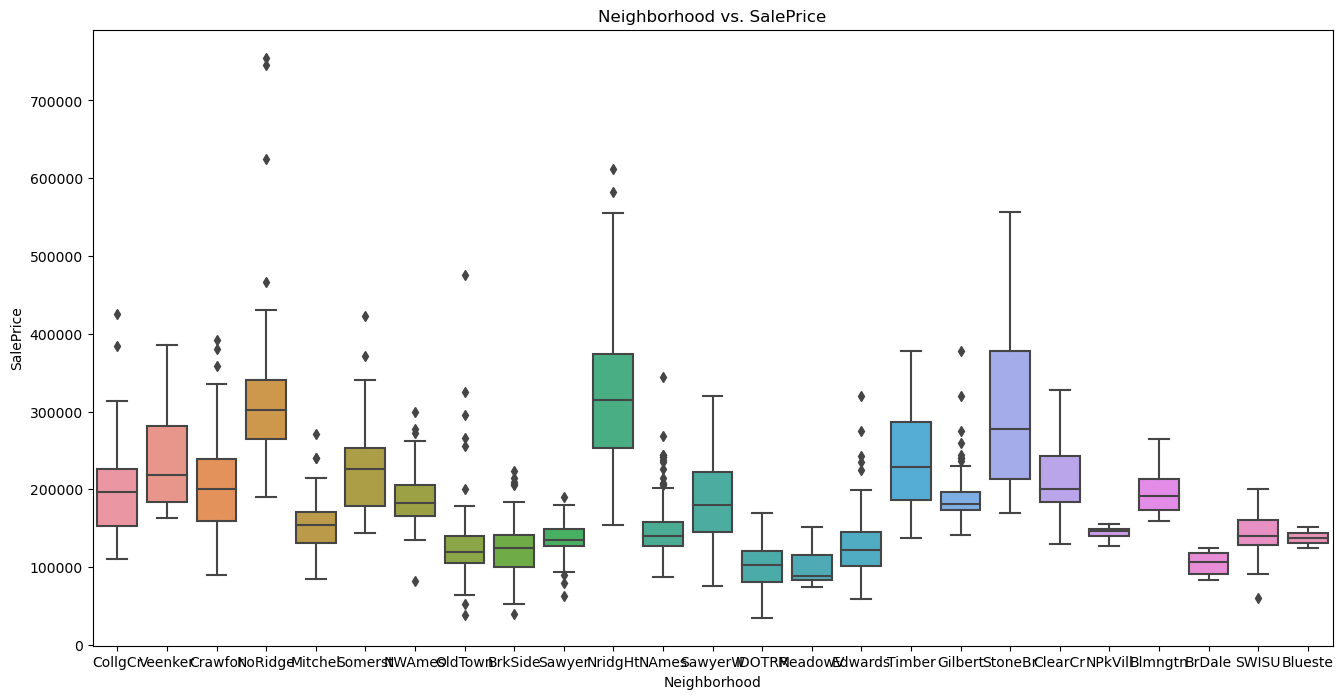

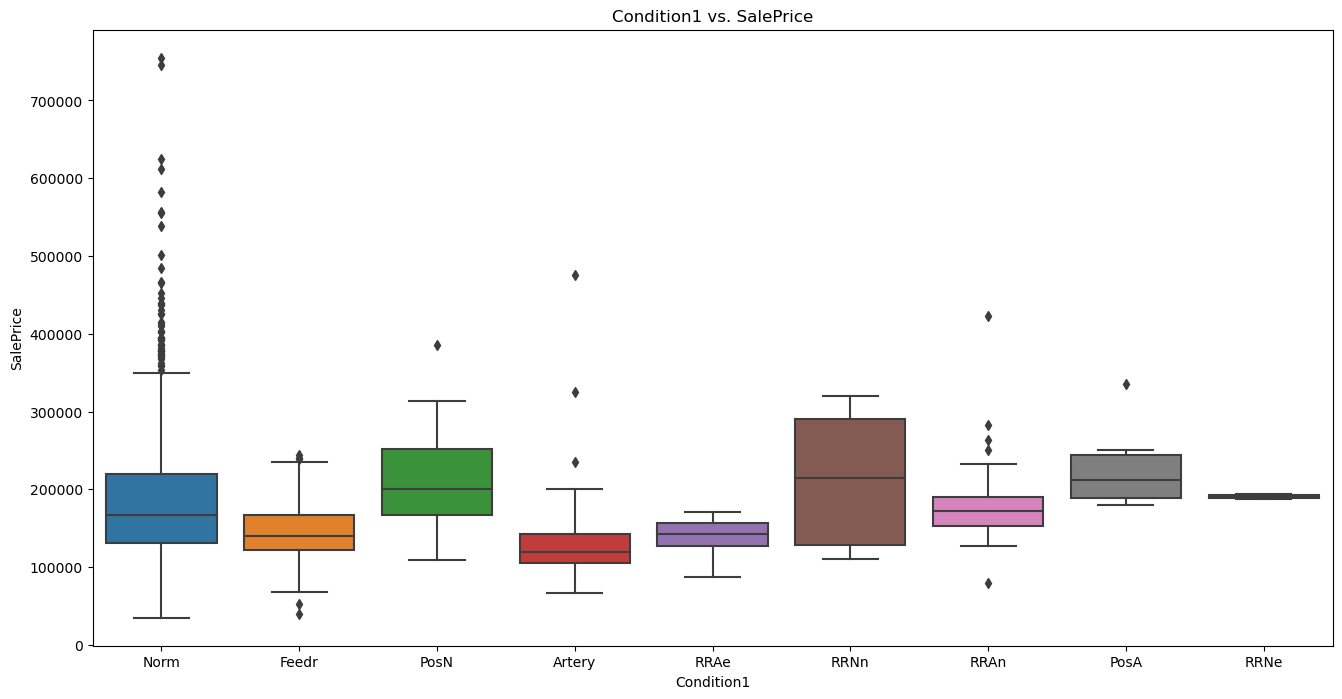

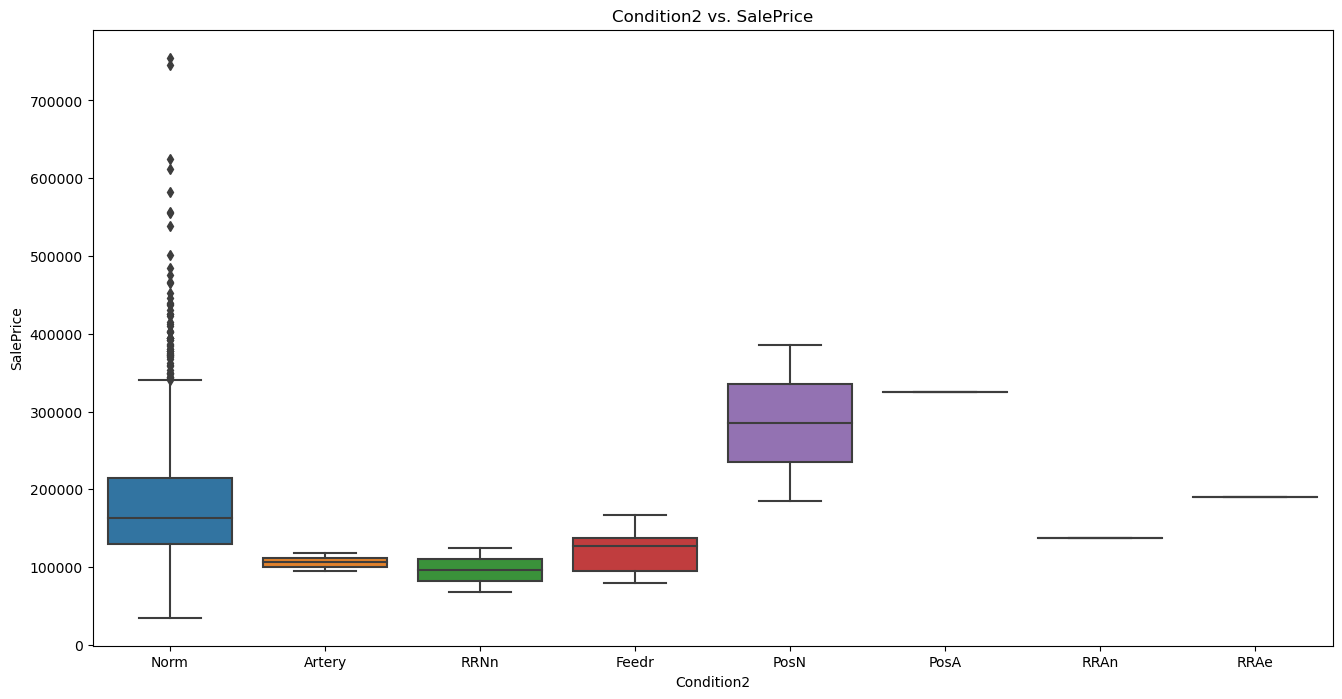

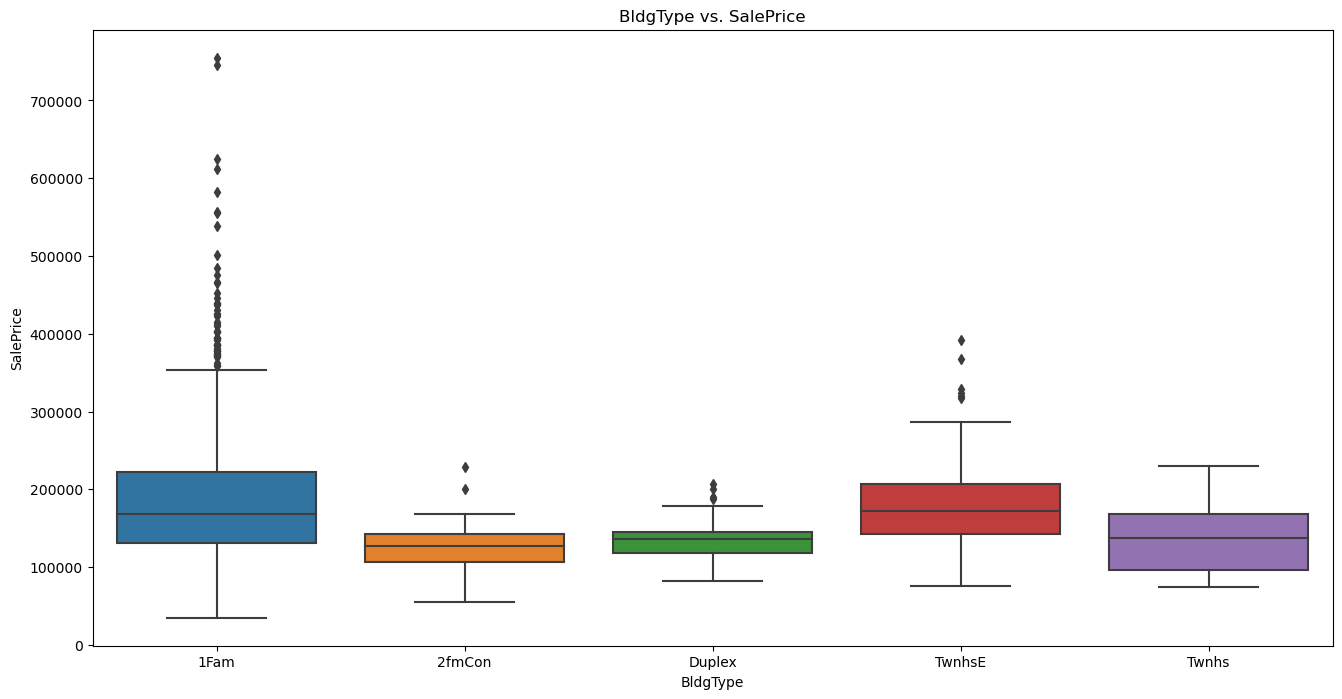

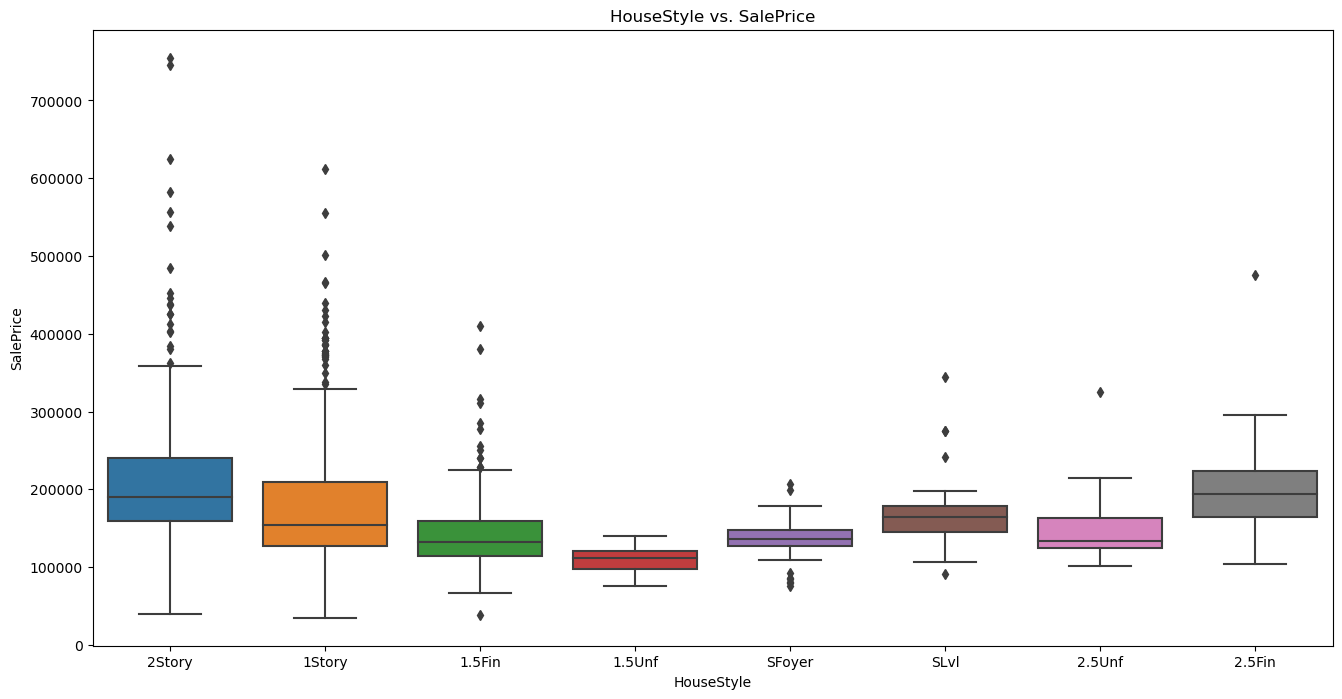

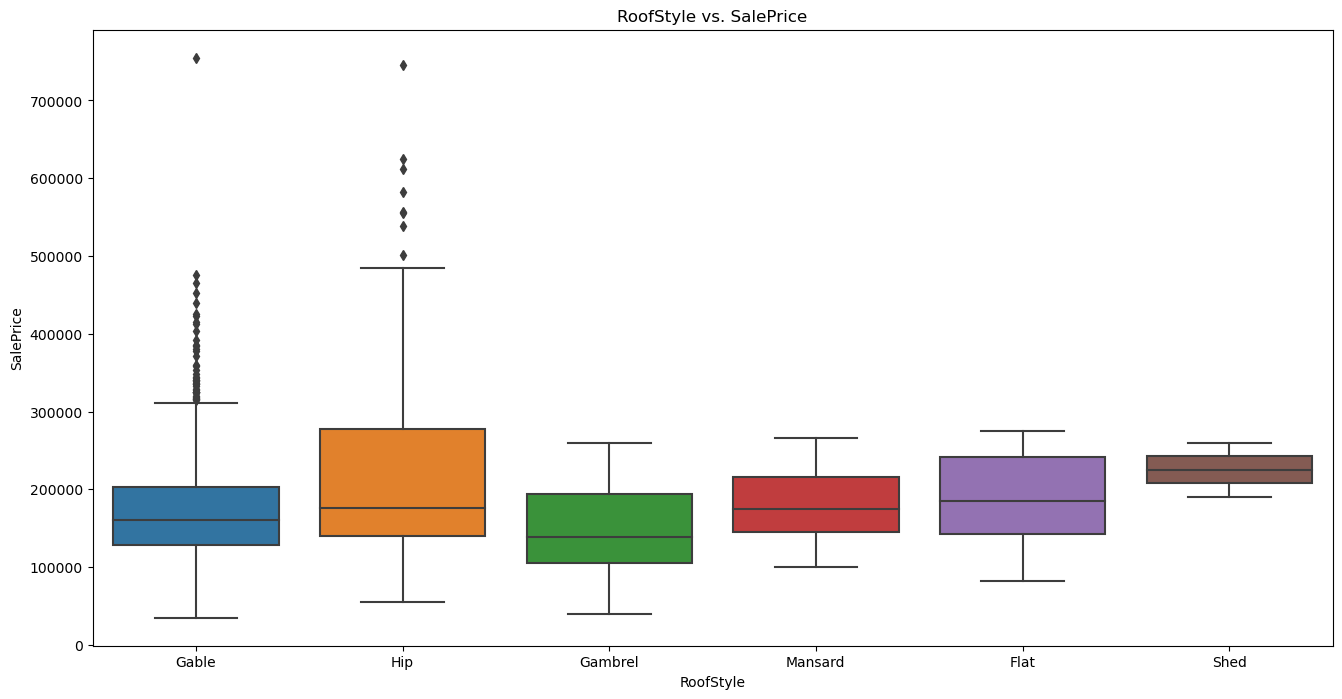

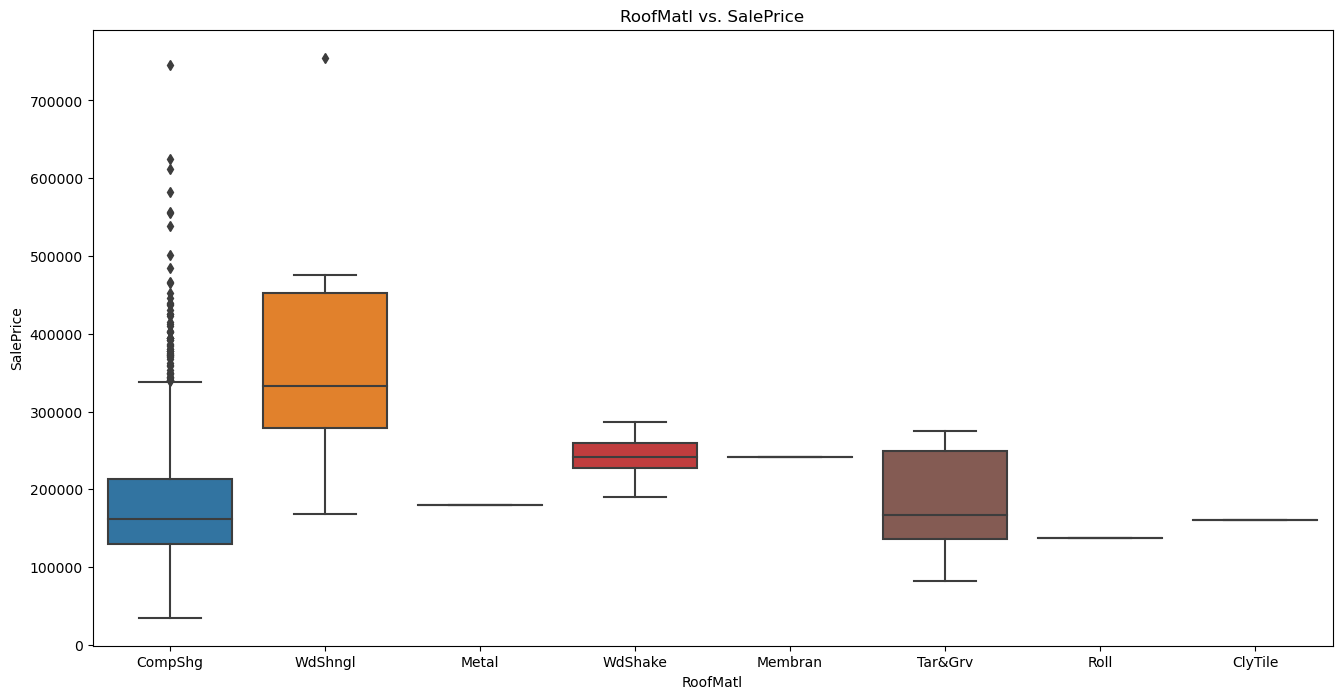

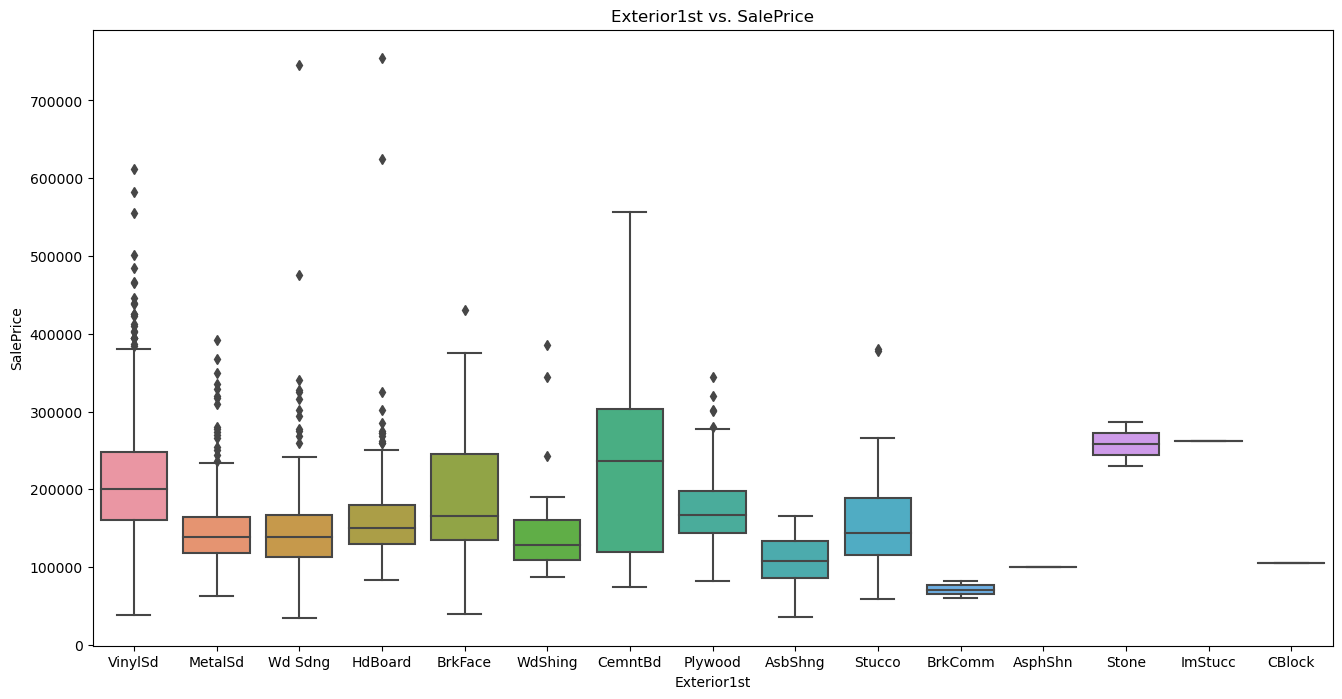

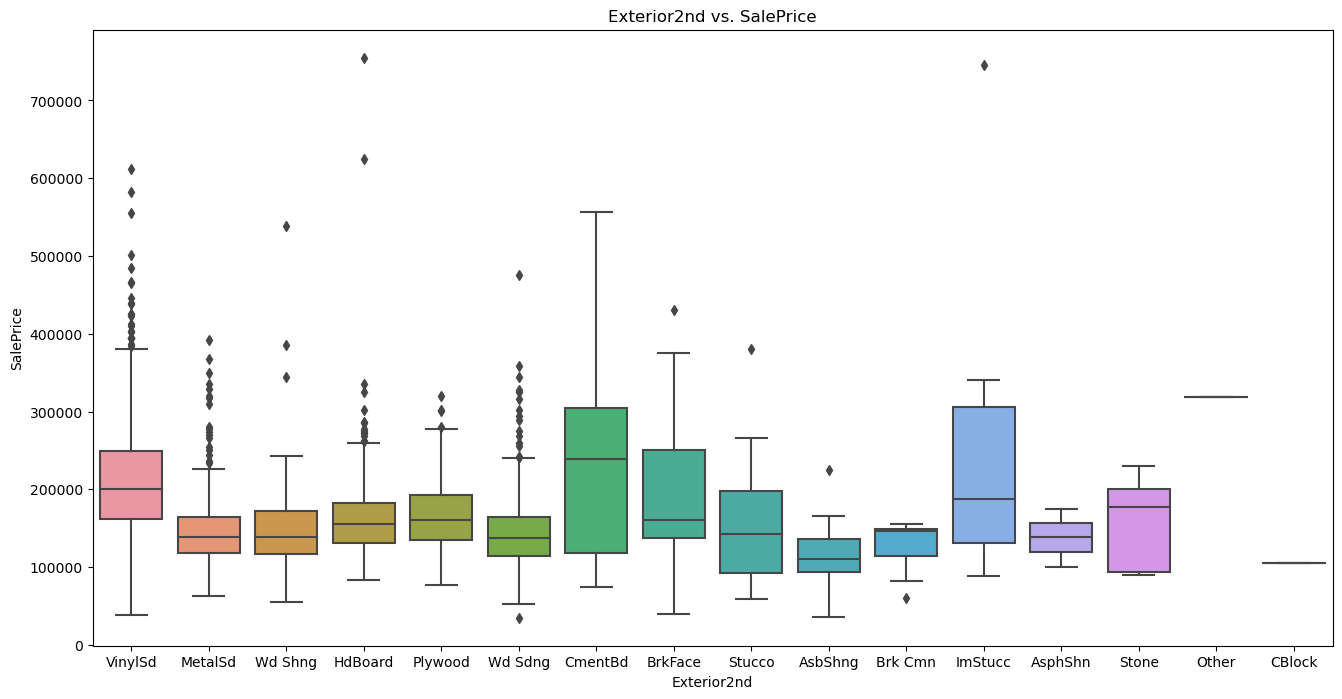

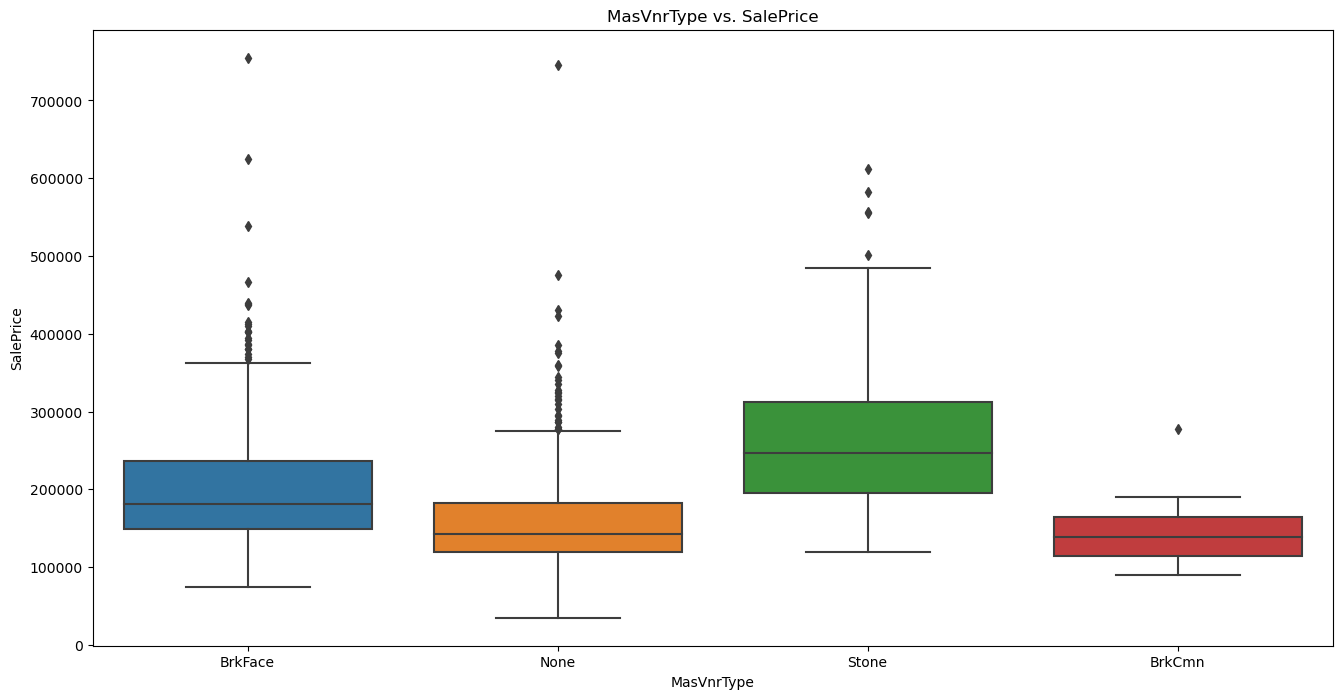

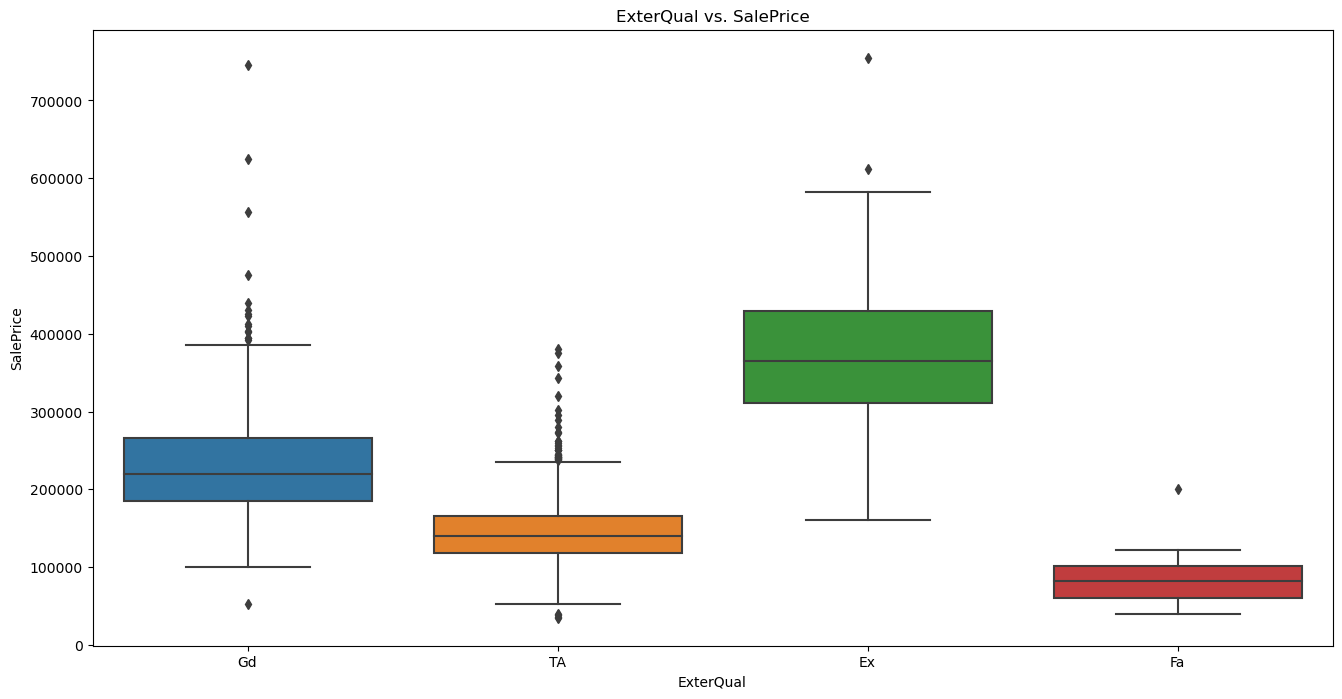

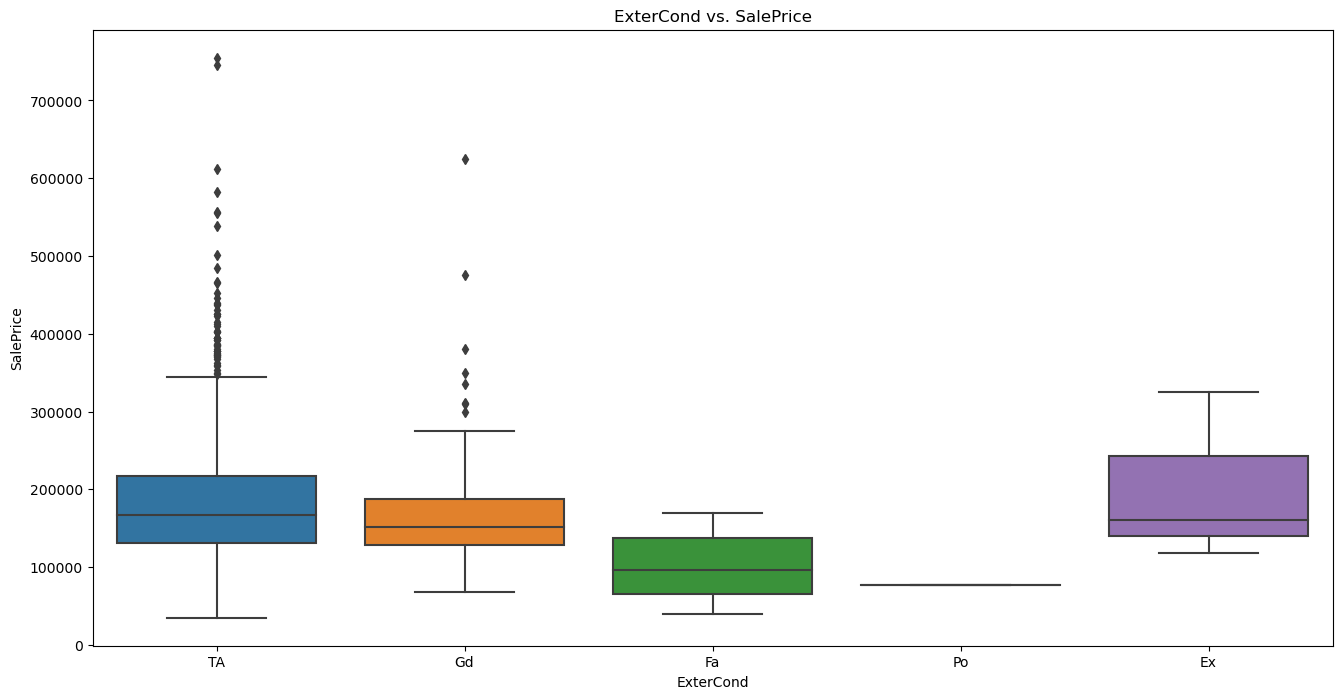

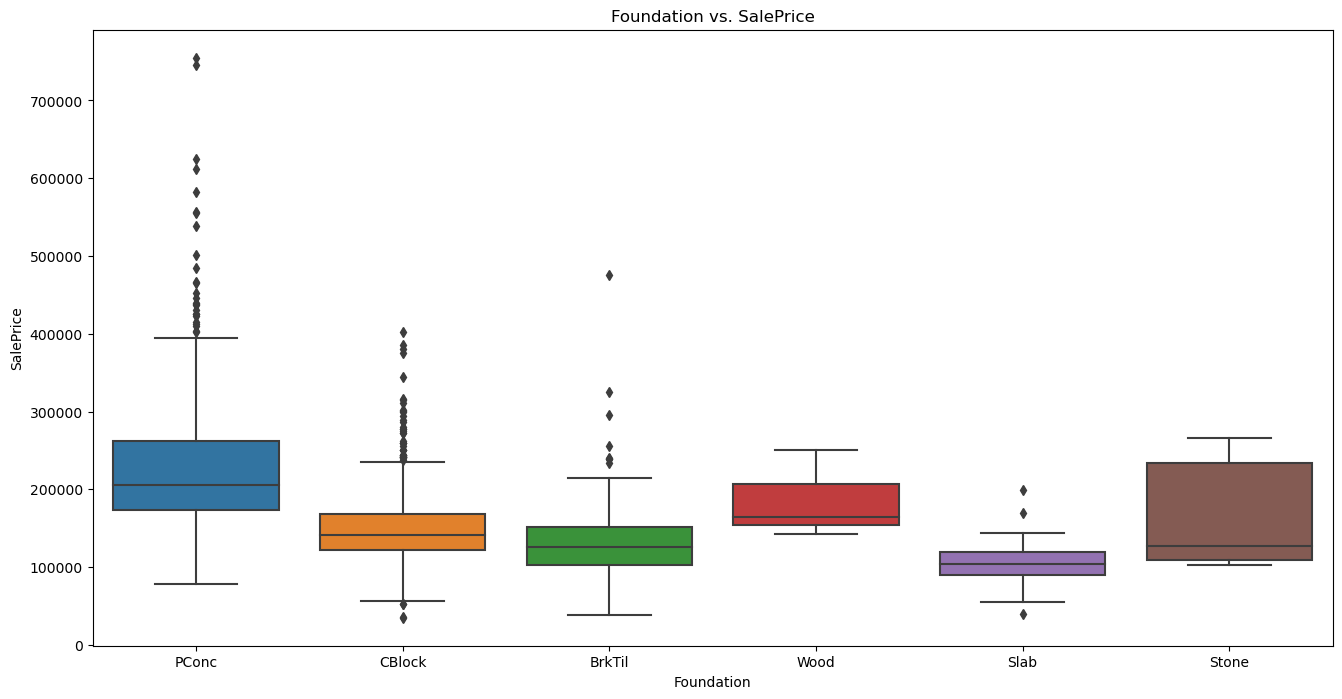

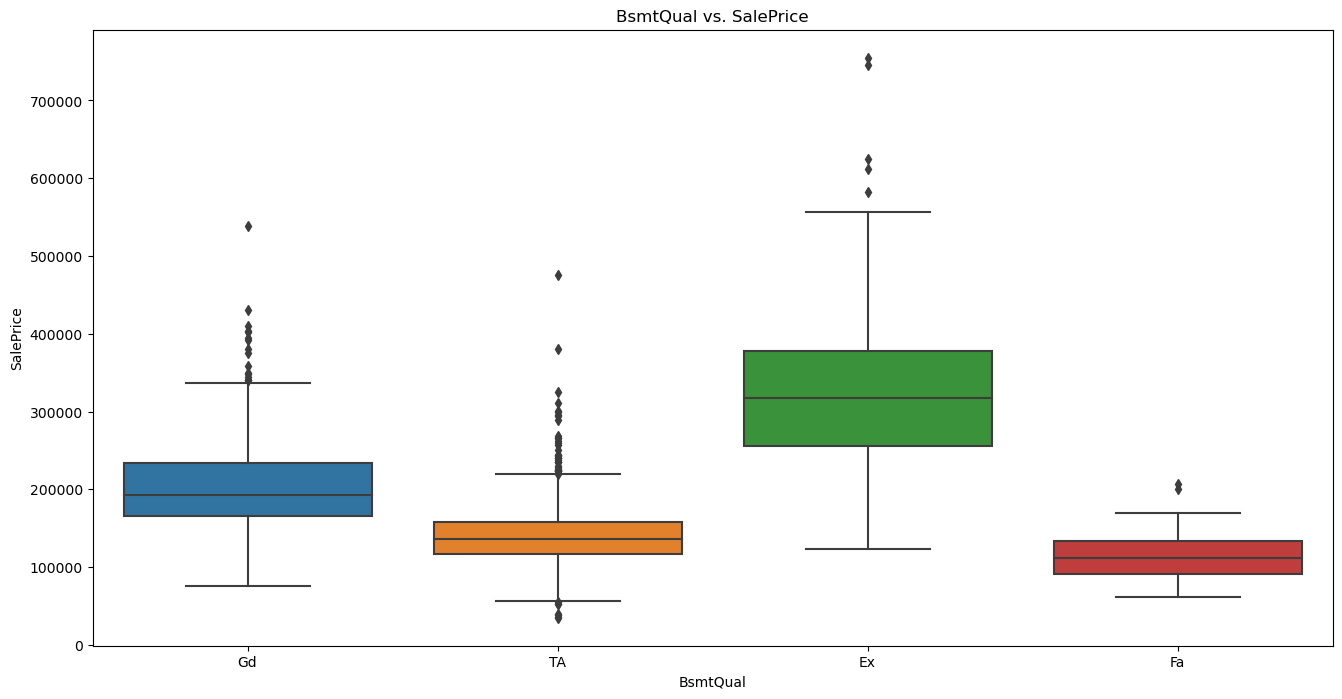

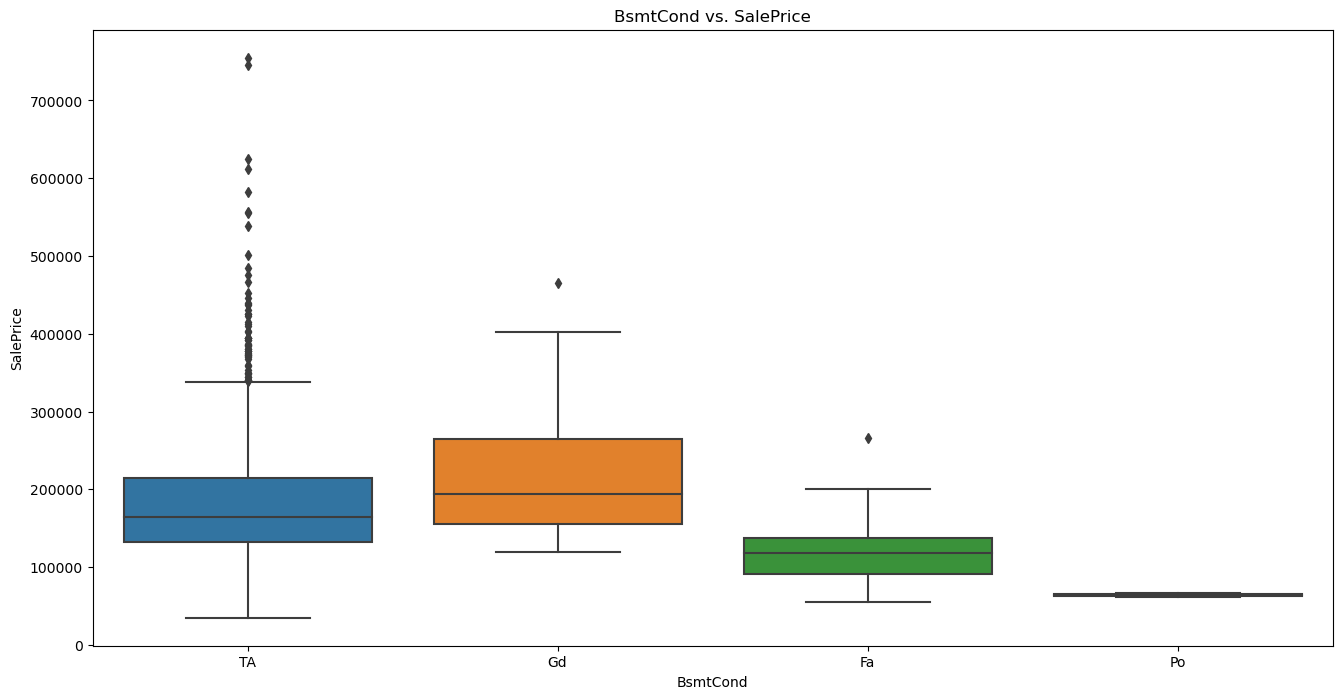

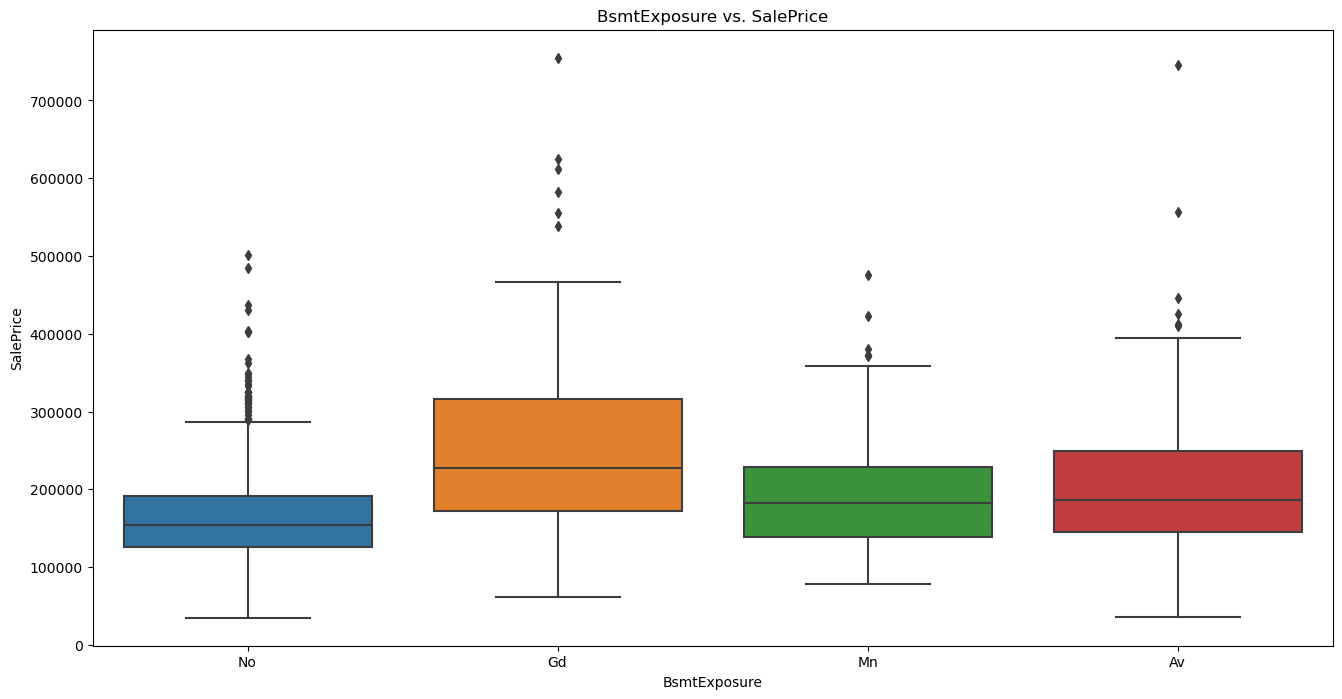

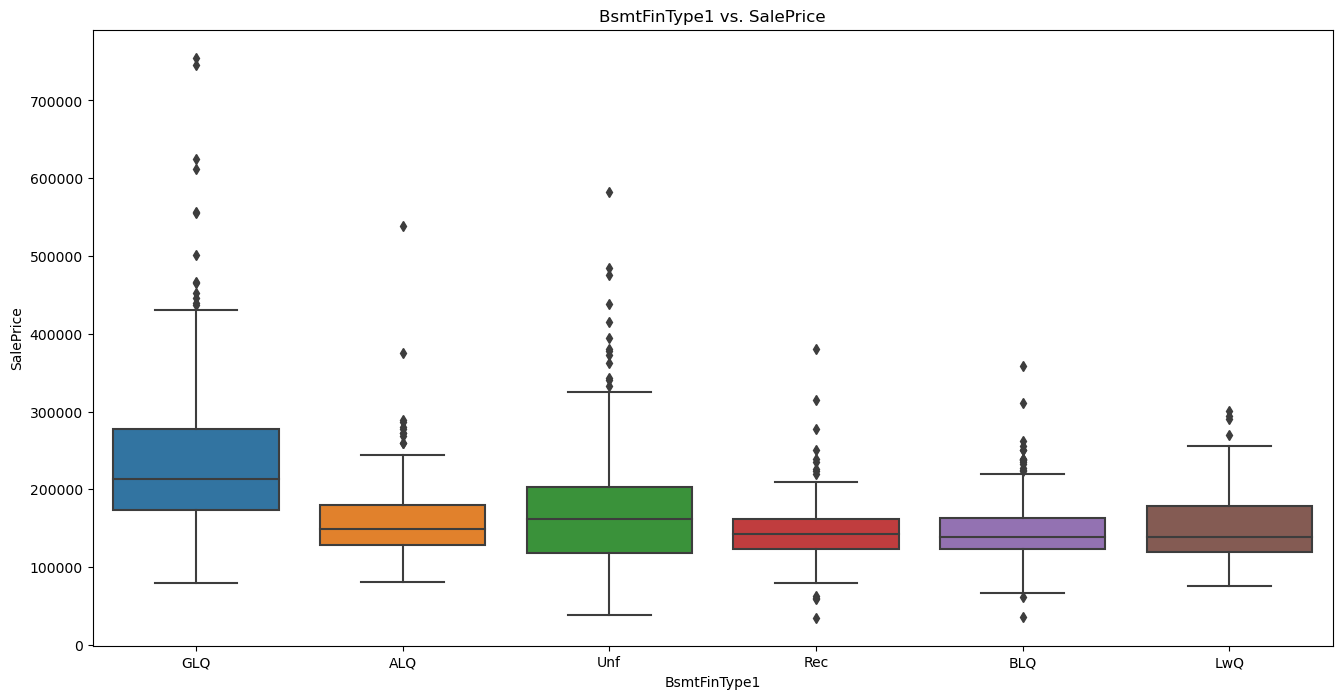

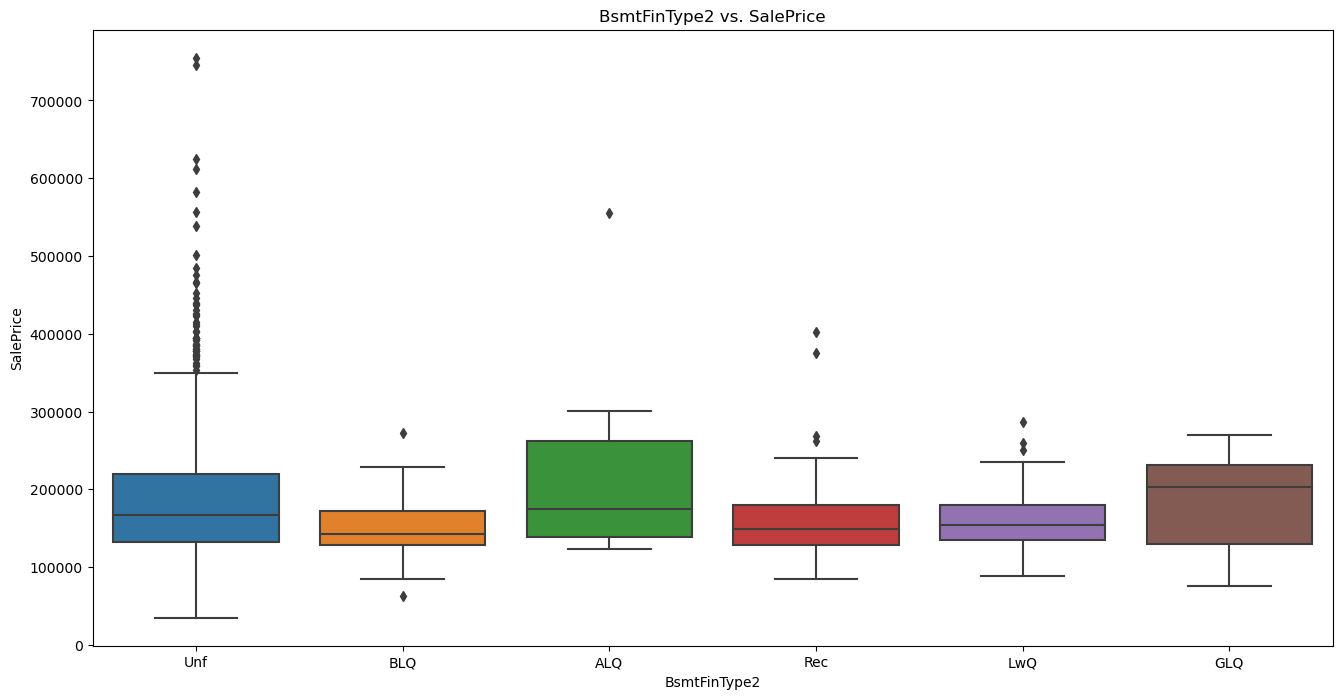

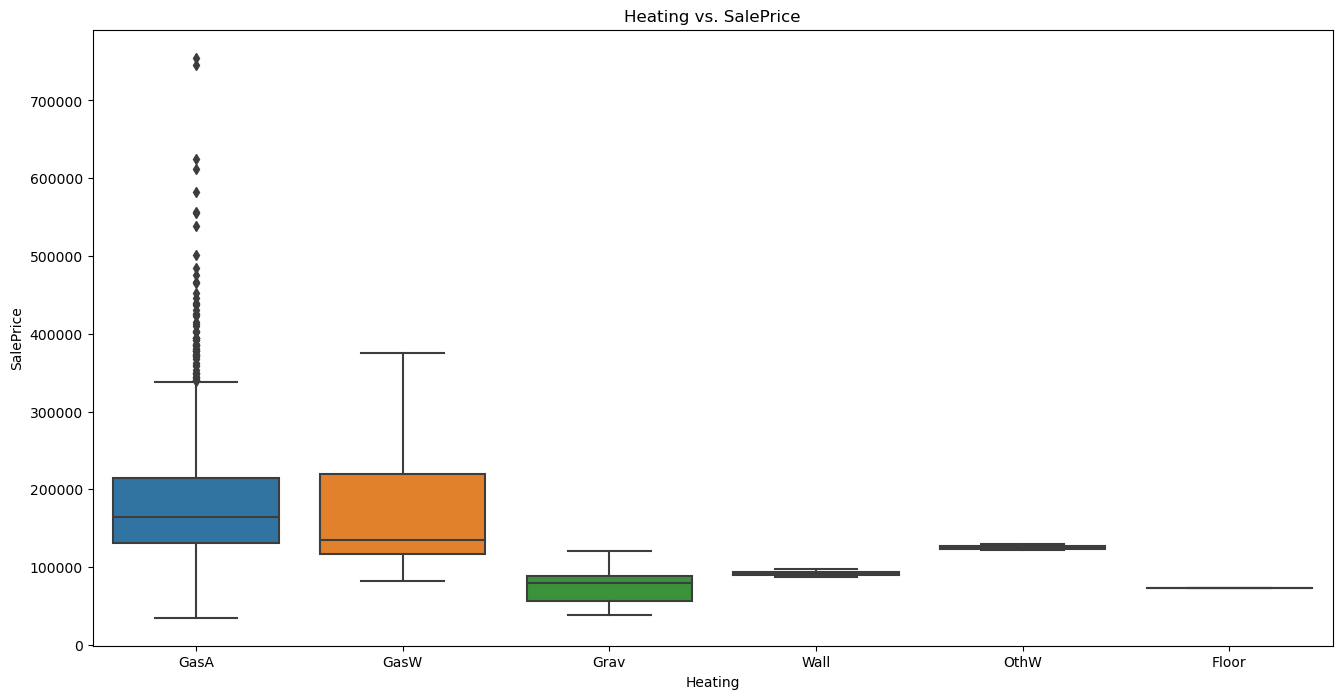

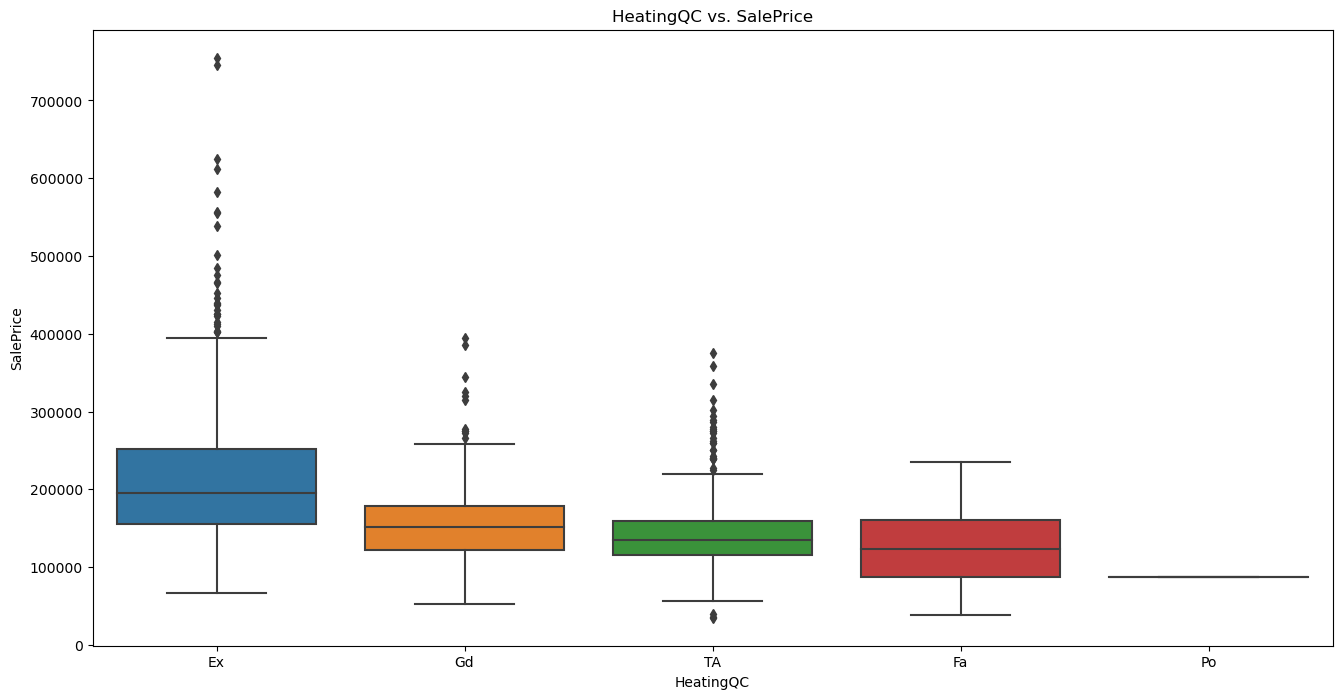

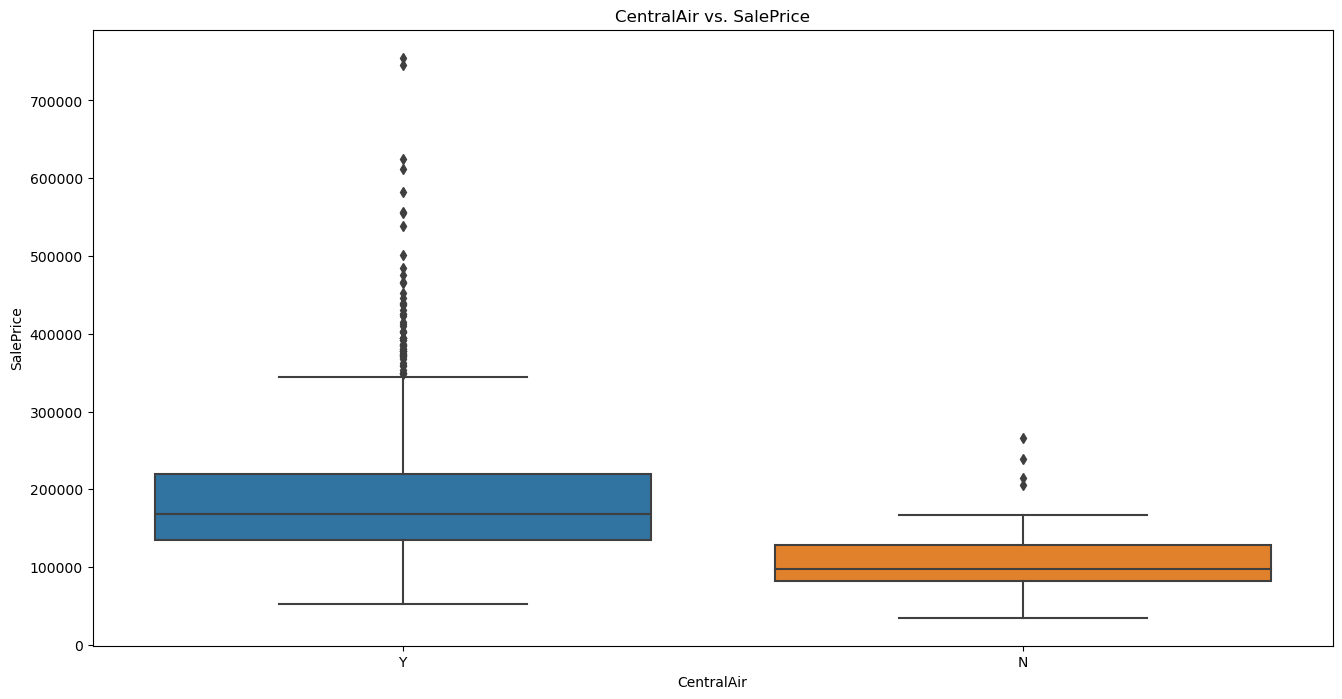

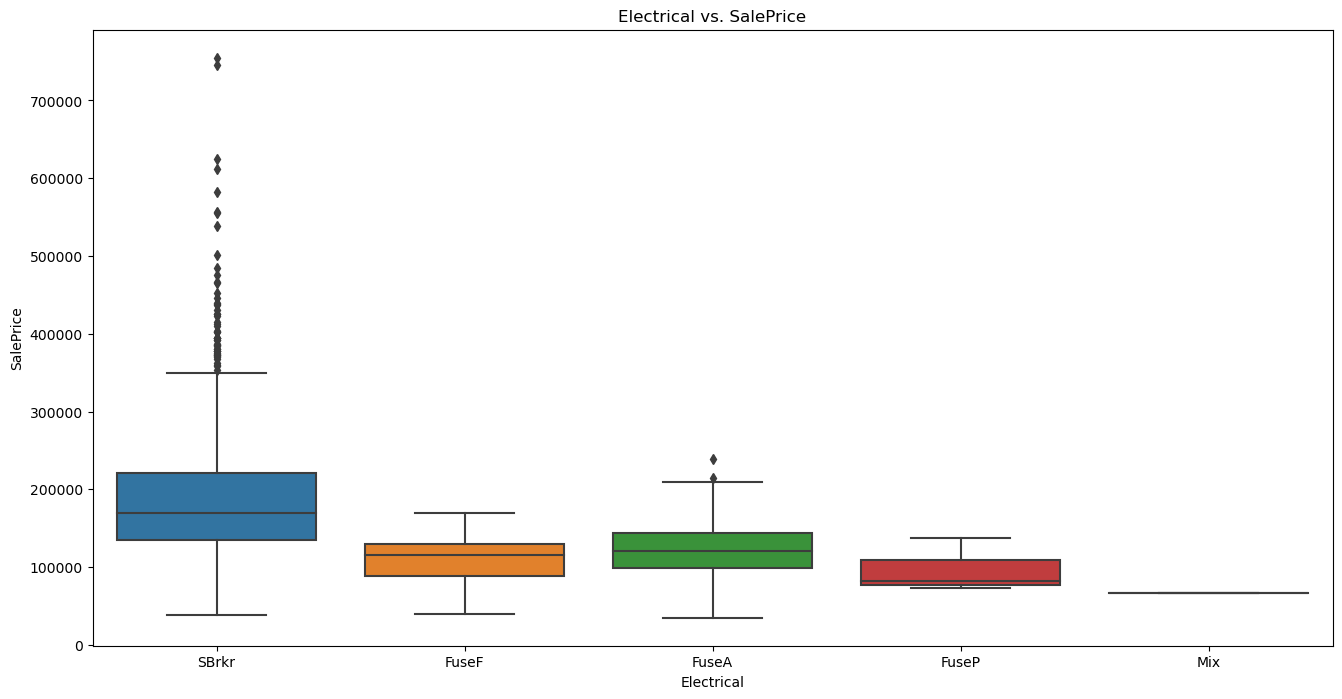

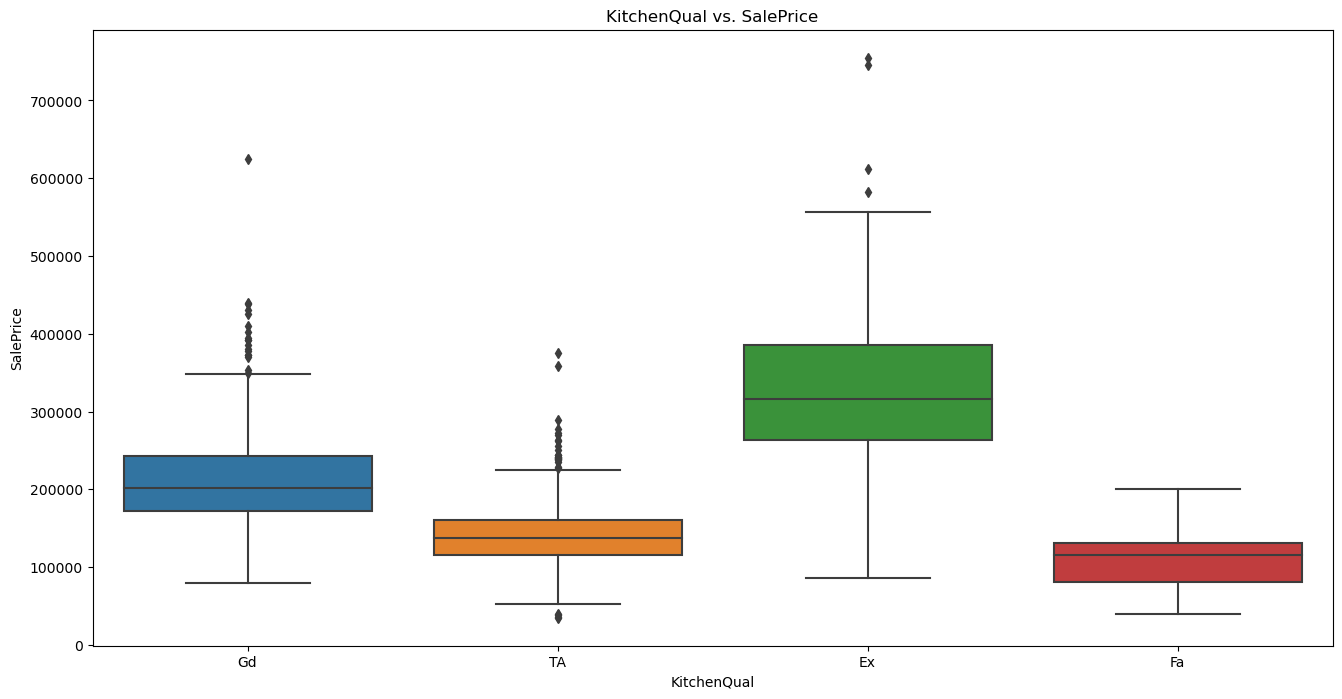

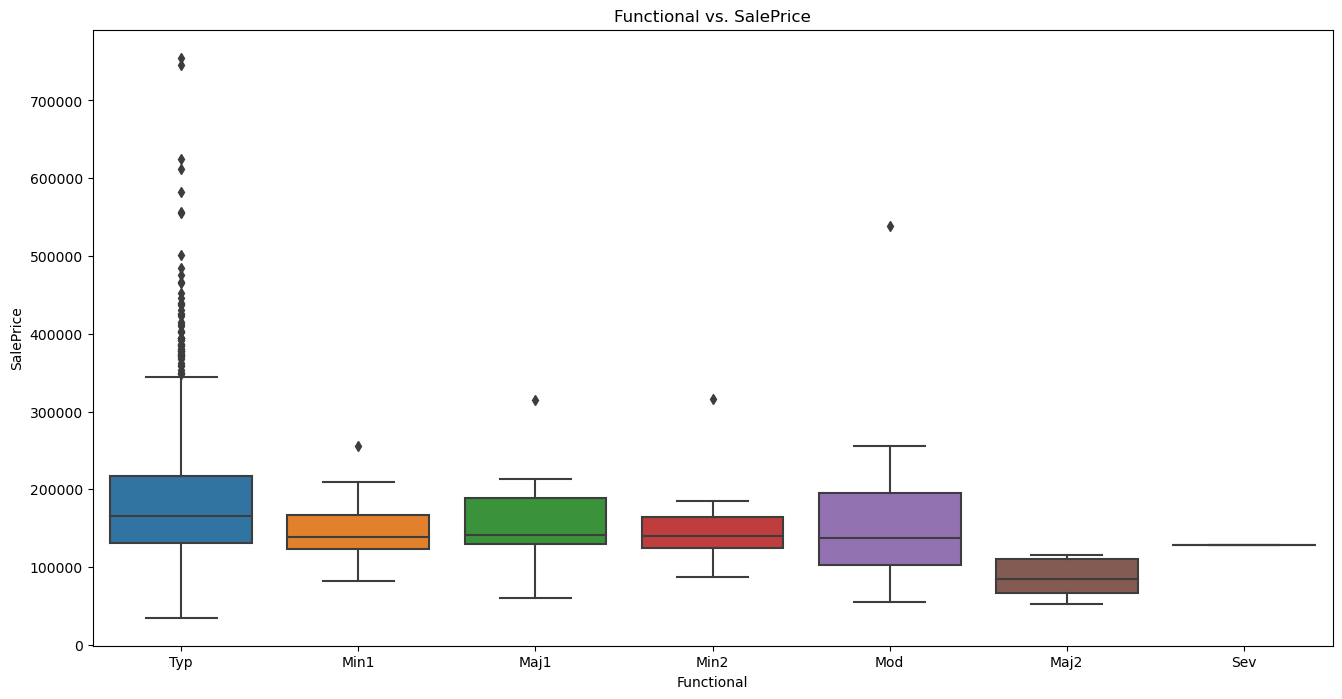

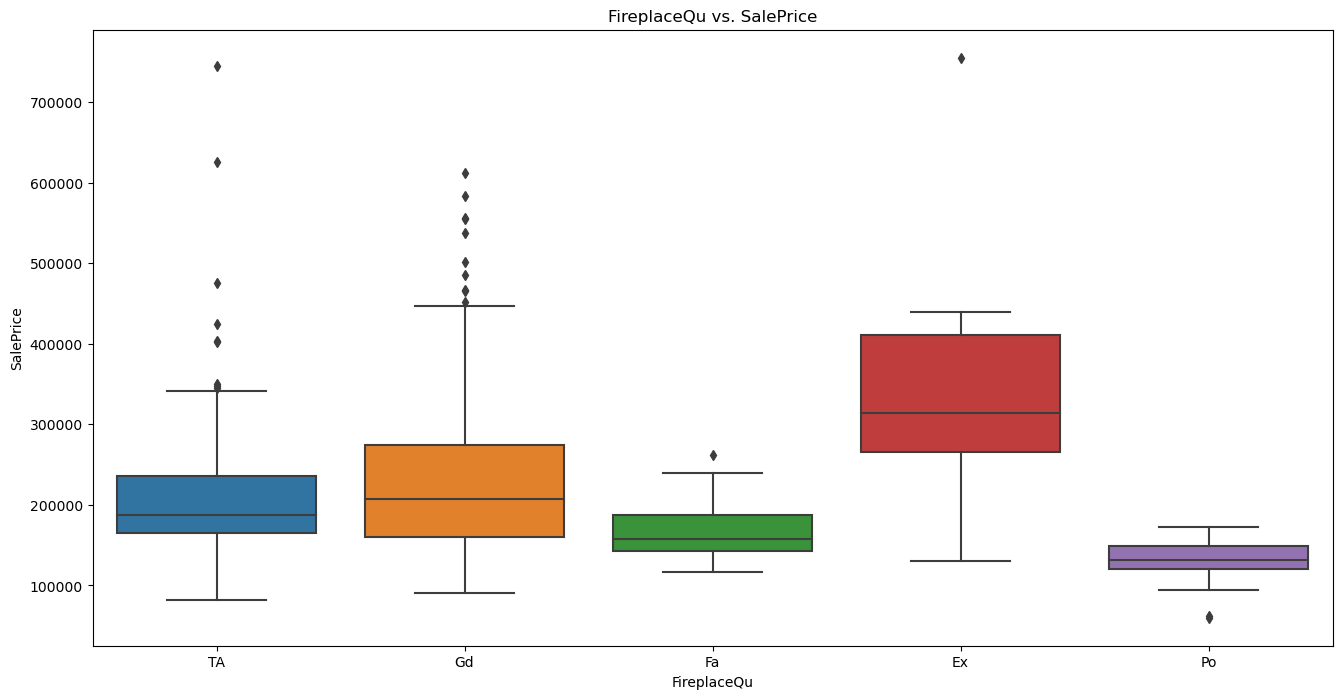

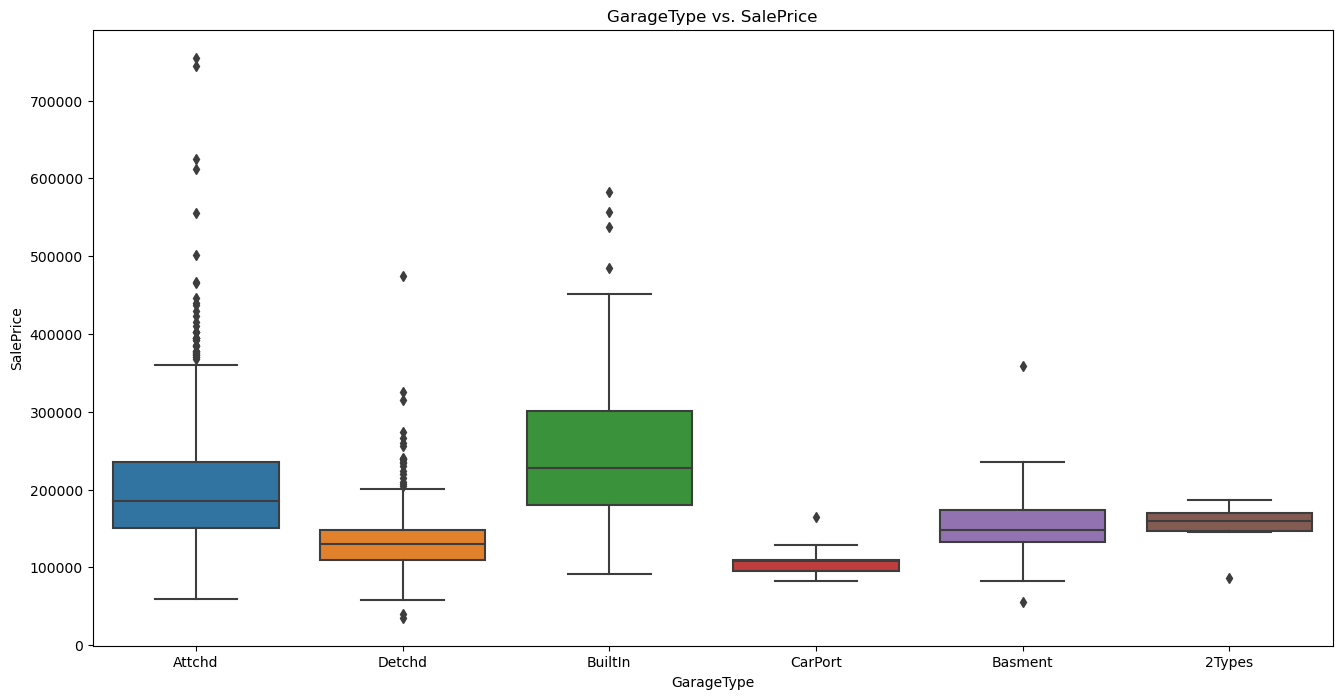

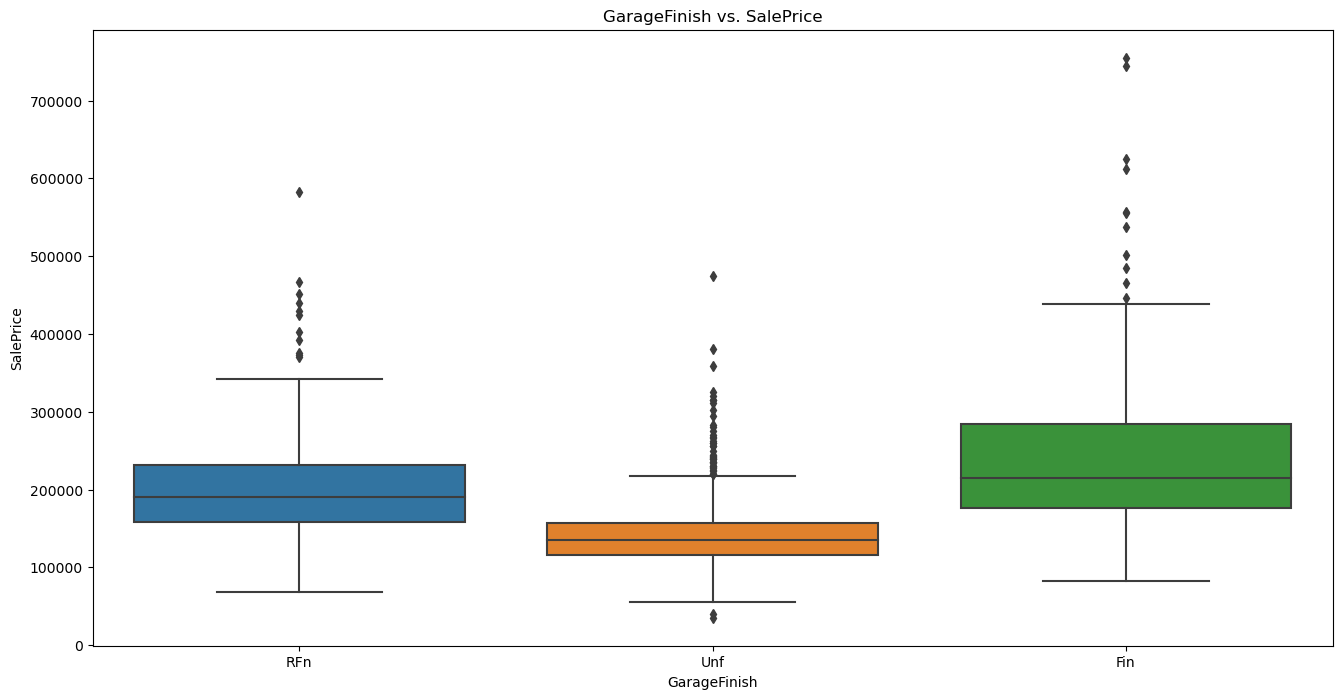

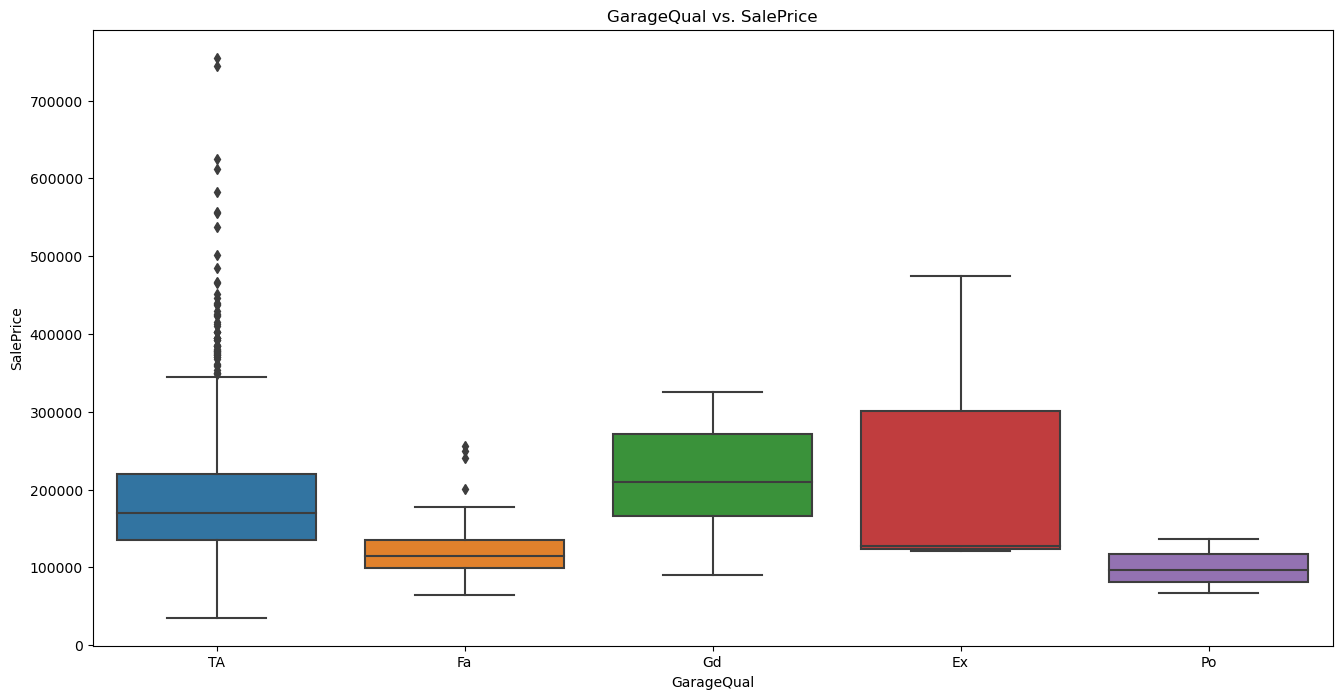

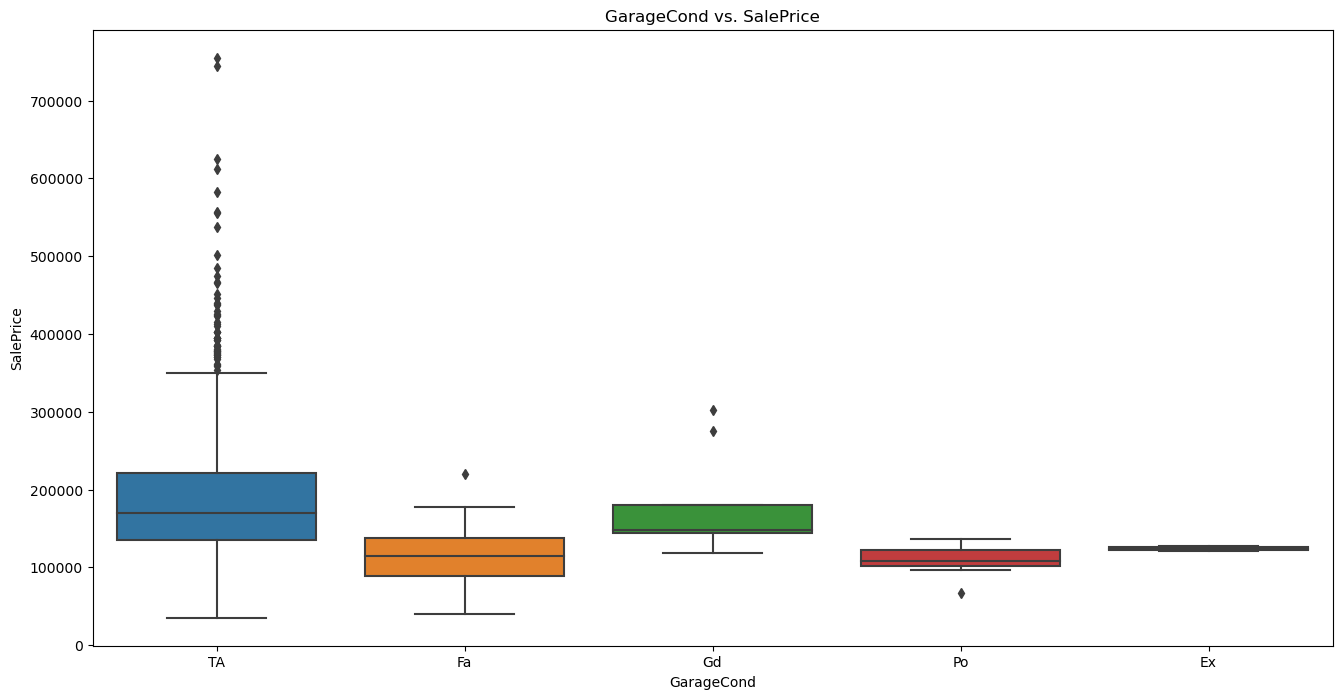

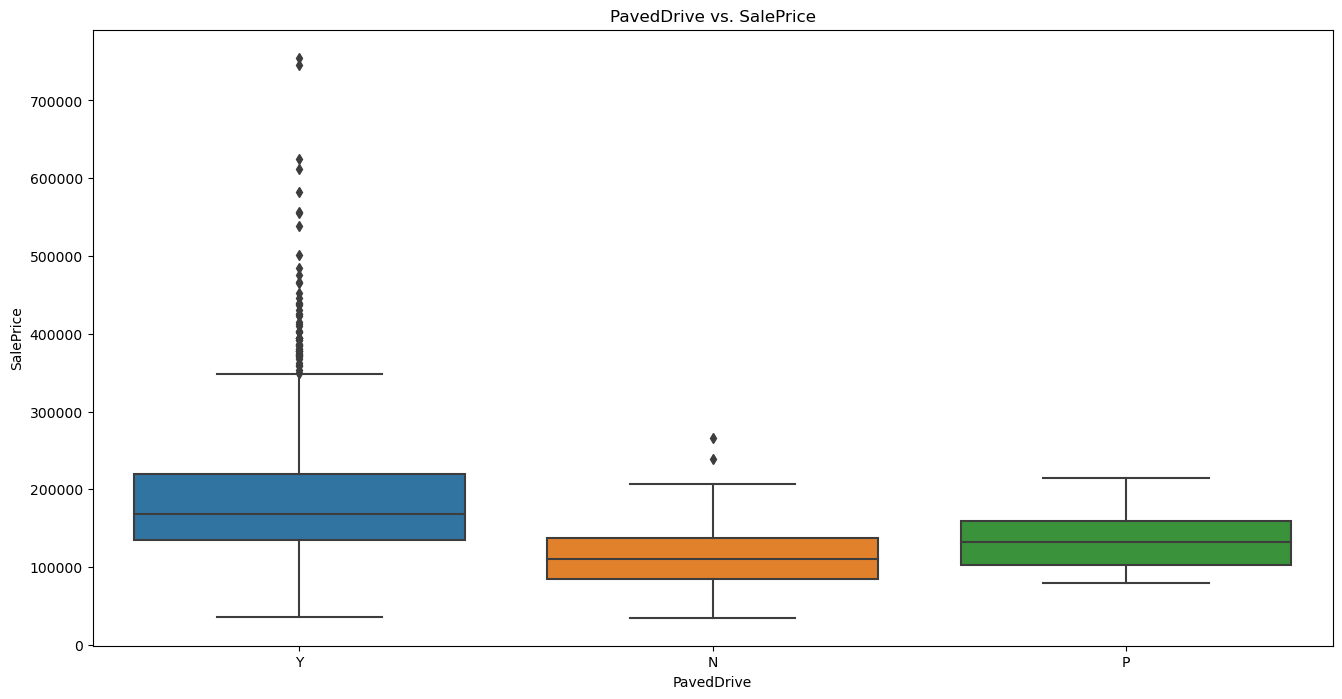

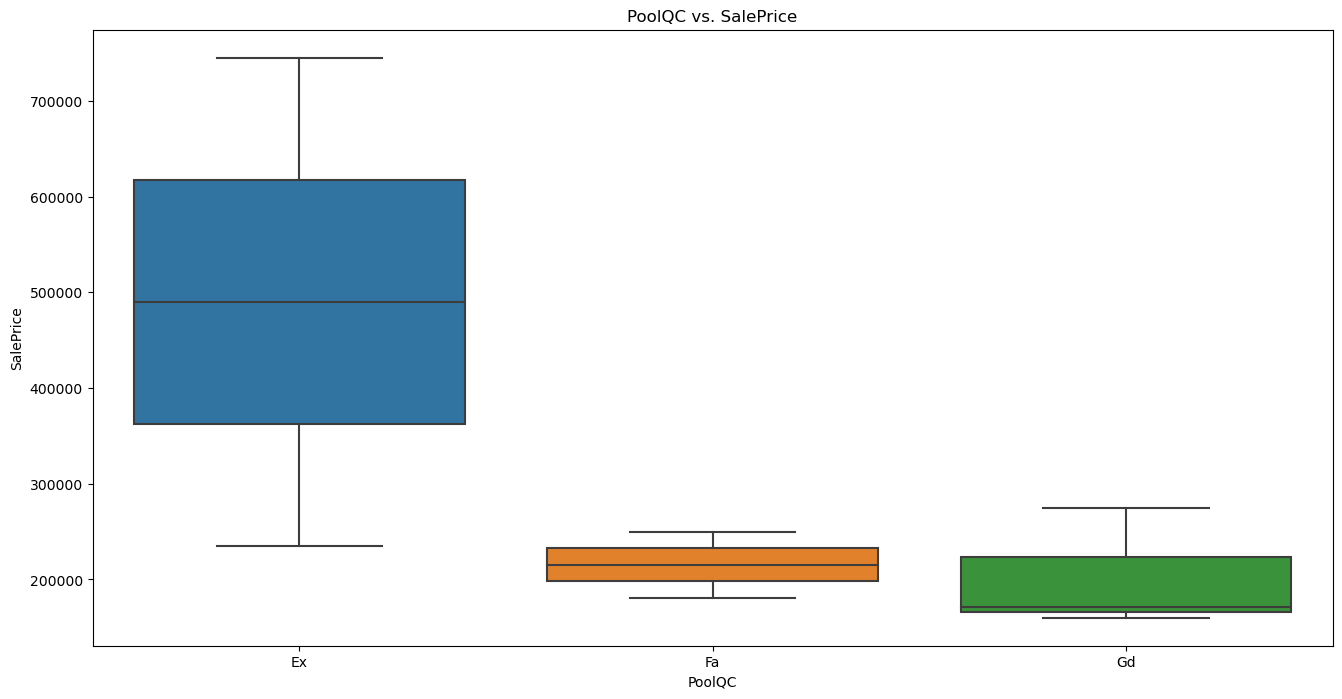

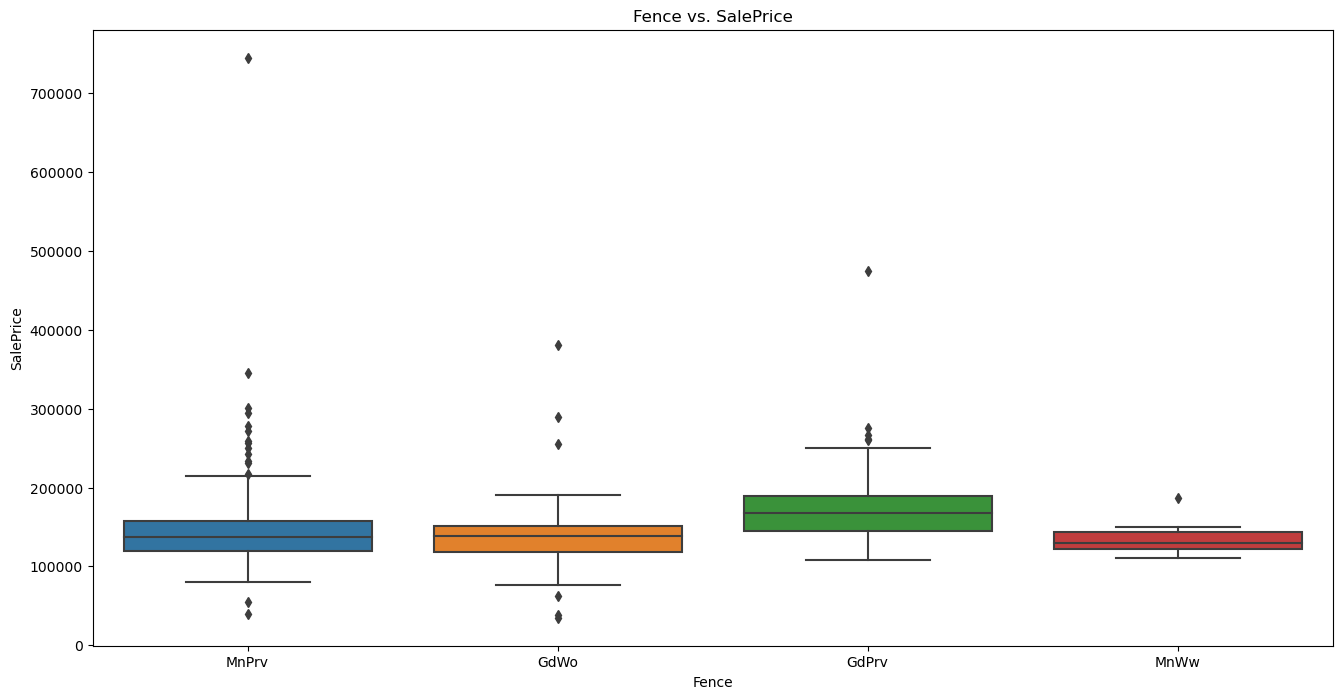

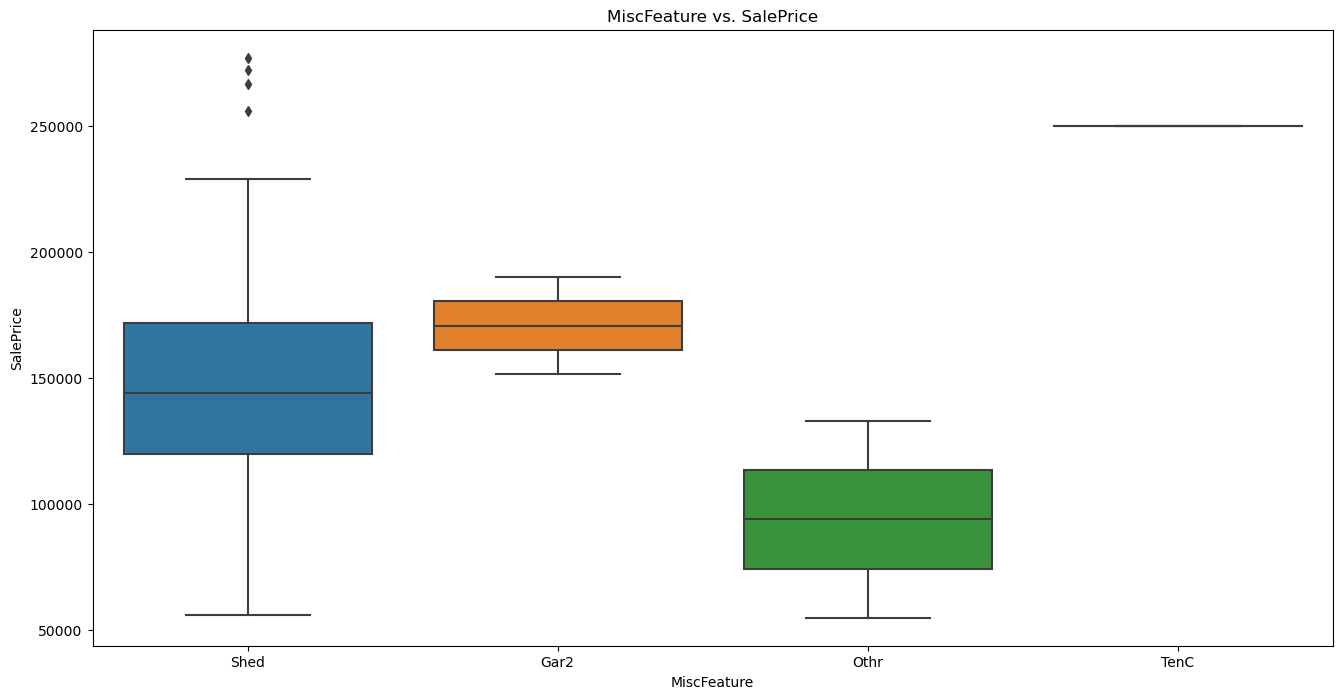

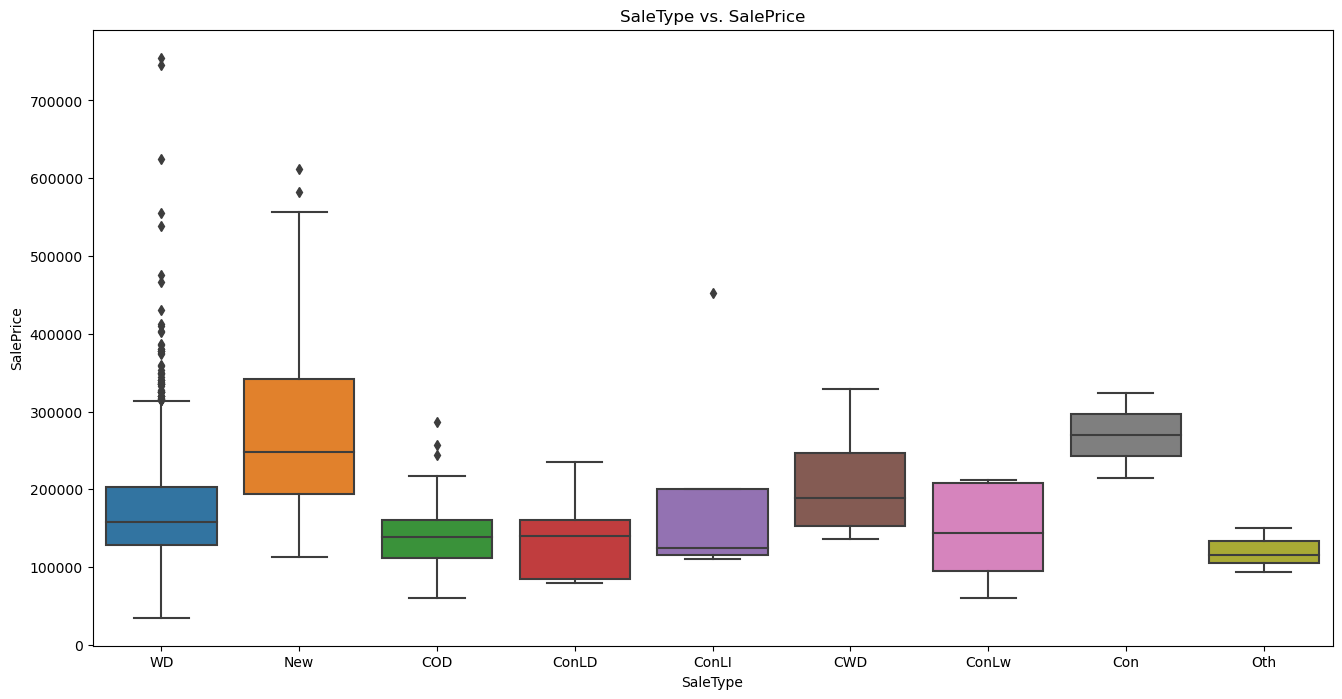

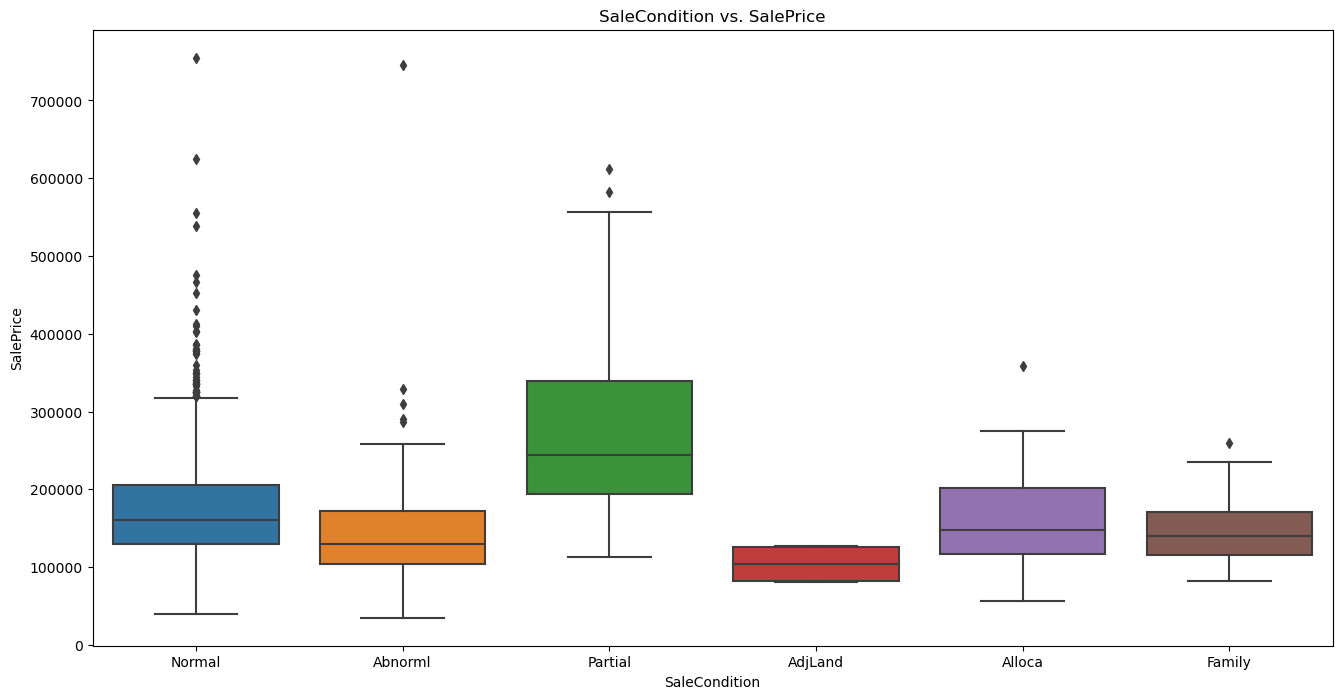

In [7]:
# Visualize relationship between each categorical variable and the target variable
for column in categorical_features.columns:
   plt.figure(figsize=(16, 8))
   sns.boxplot(data=train_df, x=column, y=target_variable)
   plt.title(f'{column} vs. {target_variable}')
   plt.show()


In [8]:
DATA Cleaning

SyntaxError: invalid syntax (2524965828.py, line 1)

# > **Data Cleaning**

In [ ]:
# Identify missing values in the train dataset
import seaborn as sns
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

missing_value = test_df.isnull().sum().sort_values(ascending=False)
missing_percen = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_dat= pd.concat([missing_value, missing_percen], axis=1, keys=['Total', 'Percent'])
print(missing_dat.head(20))


# Drop columns with more than 80% missing values
cols_to_drop = list(missing_data[missing_data['Percent'] > 0.8].index)
train_df = train_df.drop(cols_to_drop, axis=1)

# Visualize missing values in the train dataset after dropping columns
sns.set(style='whitegrid')
plt.figure(figsize=(16, 8))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

> > Remove High correlation Features

In [ ]:
# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Visualize the correlation matrix as a heatmap
sns.set(style="white")
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify pairs of highly correlated independent variables
corr_threshold = 0.8
corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Remove one feature from each highly correlated pair
for pair in corr_pairs:
    if pair[0] in numerical_features.columns and pair[1] in numerical_features.columns:
        if abs(corr_matrix.loc[pair[0], 'SalePrice']) > abs(corr_matrix.loc[pair[1], 'SalePrice']):
            numerical_features.drop(pair[1], axis=1, inplace=True)
        else:
            numerical_features.drop(pair[0], axis=1, inplace=True)
            
# Check the remaining numerical features
print(numerical_features.columns)



**Inpute missing Values with Mean**

In [ ]:
from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

numerical_features= numerical_features.drop('SalePrice', axis=1)
print(numerical_features.columns)

# fit the imputer to the numerical features with missing values
imputer.fit(numerical_features)

# transform the numerical features by imputing the missing values with the mean value
numerical_features_imputed = imputer.transform(numerical_features)

# convert the imputed features back to a pandas dataframe
numerical_features_imputed_df = pd.DataFrame(numerical_features_imputed, columns=numerical_features.columns)


> **Input Categorical Features with Mode**

In [ ]:

from sklearn.preprocessing import LabelEncoder

# fill missing values with mode

mode = categorical_features.mode().iloc[0]
categorical_features = categorical_features.fillna(mode)


# create an instance of the LabelEncoder class
encoder = LabelEncoder()

# apply label encoding to each categorical column
categorical_features_encoded = categorical_features.apply(encoder.fit_transform)




Conbine numerical and categorical and remove outliers from GrLivArea since its highly corelated with Salepraice and can affect the price

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# drop 'SalePrice' from numerical features
#numerical_features_no_sp = numerical_features_imputed_df.drop('SalePrice', axis=1)


# concatenate numerical and categorical features
X =  pd.concat([categorical_features_encoded, numerical_features_imputed_df], axis=1)
print(X.columns.tolist())
# filter X by GrLivArea
X = X[X['GrLivArea'] < 5000]

# get the indices of the remaining rows in X
indices = X.index

# assign target variable y for the remaining rows
y = train_df.loc[indices, 'SalePrice']
print(y.shape)

# instantiate scaler and fit-transform X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_scaled.shape)




# create instances of regression models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# fit models to the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# evaluate models on the testing data
print("Linear Regression R^2 Score:", lr.score(X_test, y_test))
print("Decision Tree R^2 Score:", dt.score(X_test, y_test))
print("Random Forest R^2 Score:", rf.score(X_test, y_test))


Hyperparamet tuning of base learnners

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# create grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)
# fit grid search to data
grid_search.fit(X_train,y_train)
# print best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score



param_grid = {
    'learning_rate': [0.1, 0.05, 0.02],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(gbr, param_grid, cv=5)
grid_search.fit(X_train,y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 30, 50]
}

knr = KNeighborsRegressor()

grid_search = GridSearchCV(knr, param_grid, cv=5)
grid_search.fit(X_train,y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


In [ ]:
# define hyperparameter grid

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}
# create decision tree regressor
dt = DecisionTreeRegressor(random_state=42)

# create grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)
# fit grid search to data
grid_search.fit(X_train,y_train)

# print best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



# Preprocess Test data Set****

In [ ]:
def test_preprocess(df, num_imputer,cat_mode,encoder, scaler):
    # select features used for training
    print(df.columns)
    features =['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
    X = df[features].copy()
    numerical_features = X.select_dtypes(include=[np.number])
    #numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    numerical_features_imputed = num_imputer.transform(numerical_features)
    
    
  

    # impute missing values in categorical features and encode them
    categorical_features = X.select_dtypes(include='object')
     #cat_mode = categorical_features.mode().iloc[0]
    categorical_features = categorical_features.fillna(cat_mode)
     #encoder = LabelEncoder()

    # apply label encoding to each categorical column
    categorical_features_encoded = categorical_features.apply(encoder.fit_transform)
    # categorical_features_encoded = categorical_features.apply(encoder.transform)
      #X[categorical_features] = cat_imputer.transform(X[categorical_features])
     #X[categorical_features] = encoder.transform(X[categorical_features])

    # combine numerical and categorical features
    all_features = pd.concat([pd.DataFrame(numerical_features_imputed, columns=numerical_features.columns), categorical_features_encoded], axis=1)
    X_all = all_features[features]

    # normalize features using scaler
    X_scaled = scaler.transform(X_all)

    # make predictions using the trained model
     #y_pred = rf_best_model.predict(X_scaled)

    # compute accuracy on the test data
    # y_true = df['SalePrice']
    # accuracy = r2_score(y_true, y_pred)

    return X_scaled
print((test_df.columns))
X_test_scaled =  test_preprocess(test_df,imputer,mode,encoder, scaler)



# **Ensemble Learning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Define the base models
model_rf = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model_gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200)
model_knn = KNeighborsRegressor(leaf_size=10, n_neighbors=10, weights='distance')
model_dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)

# Create a list of the base models
base_models = [model_rf, model_gb, model_knn, model_dt]

# Define the meta model
model_meta = LinearRegression()

# Split the data into training and validation sets
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create arrays to hold the predictions of the base models on the validation and test sets
val_preds = np.zeros((X_scaled.shape[0], len(base_models)))
test_preds = np.zeros((X_test_scaled.shape[0], len(base_models)))


# Train the base models and make predictions on the validation and test sets
for i, model in enumerate(base_models):
    for train_index, val_index in kf.split(X_scaled, y):
        X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        model.fit(X_train_fold, y_train_fold)
        val_preds[val_index, i] = model.predict(X_val_fold)
    model.fit(X_scaled, y)
    test_preds[:, i] = model.predict(X_test_scaled)

# Fit the meta model on the predictions of the base models on the validation set and the corresponding target values
model_meta.fit(val_preds, y)

# Create a list to hold the predictions of the base models on the test set
ensemble_preds = []

# Make predictions on the test set using the base models and the meta model
for i, model in enumerate(base_models):
    preds = model.predict(X_test_scaled)
    ensemble_preds.append(preds)
ensemble_preds.append(model_meta.predict(test_preds))
final_preds = np.mean(ensemble_preds, axis=0)
print(final_preds)
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': final_preds})
submission_df.to_csv('submission.csv', index=False)
